# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

# Dataset Overview

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [6]:
print(f'This dataset contains of {df.shape[0]} rows and {df.shape} columns')

This dataset contains of 466285 rows and (466285, 75) columns


In [20]:
# show info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

feature data_type  null_num    null_pct  unique_num  \
0                    Unnamed: 0     int64         0    0.000000      466285   
1                            id     int64         0    0.000000      466285   
2                     member_id     int64         0    0.000000      466285   
3                     loan_amnt     int64         0    0.000000        1352   
4                   funded_amnt     int64         0    0.000000        1354   
5               funded_amnt_inv   float64         0    0.000000        9854   
6                          term    object         0    0.000000           2   
7                      int_rate   float64         0    0.000000         506   
8                   installment   float64         0    0.000000       55622   
9                         grade    object         0    0.000000           7   
10                    sub_grade    object         0    0.000000          35   
11                    emp_title    object     27588    5.916553      205475   
12                   emp_length    object     21008    4.505399          11   
13               home_ownership    object         0    0.000000           6   
14                   annual_inc   float64         4    0.000858       31901   
15          verification_status    object         0    0.000000           3   
16                      issue_d    object         0    0.000000          91   
17                  loan_status    object         0    0.000000           9   
18                   pymnt_plan    object         0    0.000000           2   
19                          url    object         0    0.000000      466285   
20                         desc    object    340302   72.981546      124436   
21                      purpose    object         0    0.000000          14   
22                        title    object        20    0.004289       63099   
23                     zip_code    object         0    0.000000         888   
24                   addr_state    object         0    0.000000          50   
25                          dti   float64         0    0.000000        3997   
26                  delinq_2yrs   float64        29    0.006219          24   
27             earliest_cr_line    object        29    0.006219         664   
28               inq_last_6mths   float64        29    0.006219          28   
29       mths_since_last_delinq   float64    250351   53.690554         145   
30       mths_since_last_record   float64    403647   86.566585         123   
31                     open_acc   float64        29    0.006219          62   
32                      pub_rec   float64        29    0.006219          26   
33                    revol_bal     int64         0    0.000000       58142   
34                   revol_util   float64       340    0.072917        1269   
35                    total_acc   float64        29    0.006219         112   
36          initial_list_status    object         0    0.000000           2   
37                    out_prncp   float64         0    0.000000      135665   
38                out_prncp_inv   float64         0    0.000000      141189   
39                  total_pymnt   float64         0    0.000000      351609   
40              total_pymnt_inv   float64         0    0.000000      347659   
41              total_rec_prncp   float64         0    0.000000      172713   
42                total_rec_int   float64         0    0.000000      270249   
43           total_rec_late_fee   float64         0    0.000000        5808   
44                   recoveries   float64         0    0.000000       22773   
45      collection_recovery_fee   float64         0    0.000000       20275   
46                 last_pymnt_d    object       376    0.080637          98   
47              last_pymnt_amnt   float64         0    0.000000      198194   
48                 next_pymnt_d    object    227214   48.728567         100   
49           last_credit_pull_d    object        42    0.009007         10

1. There are 2 features that has only 1 value (we will **drop** it all), those are :
* `policy_code`
* `application_type`

2. **Convert** to Datetime Features:
* `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d`, `earliest_cr_line`
* `term` (to integer values)

3. We will **convert** this `emp_length` to integer

4. We will do **feature engineering** on target feature `loan_status`

5. We will **drop** categorical feature that unused in modeling, those are:
* `url`, 
* `desc`, 
* `emp_title` (this feature have too many categorical unique values)
* `Unnamed: 0` because it's index, and we already have it
* `title` because it has too many unique values and not really importance feature
* `id` and `member_id`
* `sub_grade` bcs we already have `grade` feature
* `zip_code` and `addr_state`
* `issue_d` bcs we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date,we'll drop this feature

## General Overview

In [4]:
# check missing values
df.isnull().sum()/len(df)*100

Unnamed: 0                       0.000000
id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        5.916553
emp_length                       4.505399
home_ownership                   0.000000
annual_inc                       0.000858
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            72.981546
purpose                          0.000000
title                            0.004289
zip_code                         0

There are some feature with <= 15% missing values, probably we will do imputation if possible. And if it's not possible, we will drop the missing rows or the whole feature depend on the condition. Those features are:
* `emp_title`
* `emp_length`
* `tot_coll_amt`
* `tot_cur_bal`
* `acc_now_delinq`
* `total_rev_hi_lim`

And there are huge missing values on some feature (> 20% missing values), high probably we will drop those features. Those are:
* `mths_since_last_delinq`
* `mths_since_last_record`
* `next_pymnt_d`
* `mths_since_last_major_derog` 

And those are that have 100% missing values :
* `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`,`total_cu_tl`,`inq_last_12m`

In [7]:
# check duplicate
df.duplicated().sum()

0

We have no duplicated values

## General Preprocessing

### Handling Missing Values

in this section, we will only drop features that have 100% missing values and keep the rest. And we will do missing values handling in the next section while we understanding data

In [3]:
# define feature that we will drop (this list is a result from the analysis above)
drop_list = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
             'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
             'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi','total_cu_tl',
             'inq_last_12m', 'Unnamed: 0', 'policy_code', 'application_type', 'url', 'desc',
             'emp_title', 'title', 'member_id', 'id', 'sub_grade', 'zip_code', 'addr_state', 'issue_d']

# drop features
df = df.drop(drop_list, axis=1)

# print length of drop_list and check data shape
print(f'Number of features dropped : {len(drop_list)}')
print(f'For now, this dataset contains of {df.shape[0]} rows and {df.shape[1]} features')

Number of features dropped : 30
For now, this dataset contains of 466285 rows and 45 features


### Feature Engineering

#### Target Feature : `loan_status`

In [49]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [4]:
# make a good_loan list
good_loan = ['Current', 'Fully Paid', 'In Grace Period']

# categorizing whether its a good loan or bad loan
df['loan_status'] = np.where(df['loan_status'].isin(good_loan), 1, 0)
df['loan_status'].value_counts()/len(df)*100

1    88.381784
0    11.618216
Name: loan_status, dtype: float64

#### Date Time Features : `last_pymnt_d`

Assume we're now on 2016, 1 st June

In [ ]:
# check value_counts
# df['last_pymnt_d'].value_counts()

In [5]:
# format data type
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df['last_pymnt_d'].describe()

count    465909.000000
mean         13.294369
std          12.809898
min           5.000000
25%           5.000000
50%           6.000000
75%          17.000000
max         102.000000
Name: last_pymnt_d, dtype: float64

#### Date Time Features : `next_pymnt_d`

In [ ]:
# df['next_pymnt_d'].value_counts()

In [6]:
# format data type
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['next_pymnt_d']) / np.timedelta64(1, 'M')))
df['next_pymnt_d'].describe()

count    239071.000000
mean          4.738136
std           6.082298
min           3.000000
25%           4.000000
50%           4.000000
75%           4.000000
max         102.000000
Name: next_pymnt_d, dtype: float64

#### Date Time Features : `last_credit_pull_d`

In [ ]:
# df['last_credit_pull_d'].value_counts()

In [7]:
# format data type
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df['last_credit_pull_d'].describe()

count    466243.000000
mean          9.045588
std           9.636423
min           5.000000
25%           5.000000
50%           5.000000
75%           7.000000
max         109.000000
Name: last_credit_pull_d, dtype: float64

#### Date Time Features : `earliest_cr_line`

In [ ]:
# df['earliest_cr_line'].value_counts()

In [8]:
# drop missing values
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line'].isnull().sum()

0

In [9]:
new = df['earliest_cr_line'].str.split('-', n=1, expand=True)
df['earliest_cr_line_month'] = new[0]
df['earliest_cr_line_year'] = new[1]

In [10]:
new_list = []

for word in df['earliest_cr_line_year']:
    if word == '00':
        new_list.append('20'+word)
    elif word == '01':
        new_list.append('20'+word)
    elif word == '02':
        new_list.append('20'+word)
    elif word == '03':
        new_list.append('20'+word)
    elif word == '04':
        new_list.append('20'+word)
    elif word == '05':
        new_list.append('20'+word)
    elif word == '06':
        new_list.append('20'+word)
    elif word == '07':
        new_list.append('20'+word)
    elif word == '08':
        new_list.append('20'+word)
    elif word == '09':
        new_list.append('20'+word)
    elif word == '10':
        new_list.append('20'+word)
    elif word == '11':
        new_list.append('20'+word)
    else:
        new_list.append('19'+word)
        
df['year_year'] = new_list
df['year_year'].head()

0    1985
1    1999
2    2001
3    1996
4    1996
Name: year_year, dtype: object

In [11]:
# assign to original features
df['earliest_cr_line'] = df['earliest_cr_line_month'] + ' ' + df['year_year']

In [12]:
# drop temporary features
df.drop(['earliest_cr_line_month', 'earliest_cr_line_year', 'year_year'], inplace=True, axis=1)

In [13]:
# format data type
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b %Y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['earliest_cr_line'].describe()

count    466256.000000
mean        224.491078
std          86.928944
min          55.000000
25%         166.000000
50%         208.000000
75%         267.000000
max         869.000000
Name: earliest_cr_line, dtype: float64

#### Date Time Features : `term` to integer

In [65]:
df['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [14]:
df['term'] = df['term'].apply(lambda term: int(term[:3])) # filter for first 2 character
df['term'].value_counts()

36    337924
60    128332
Name: term, dtype: int64

#### Categorical Feature : `emp_length`

<AxesSubplot:xlabel='emp_length', ylabel='count'>

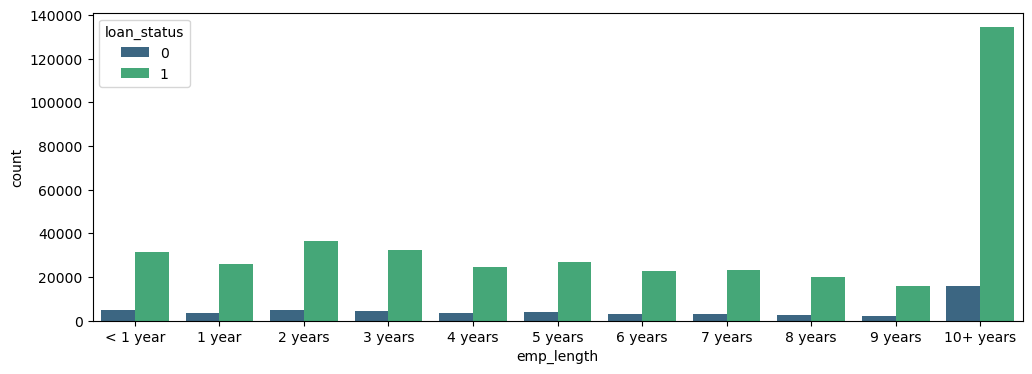

In [22]:
# plot emp_length
emp_length_order = [ '< 1 year','1 year','2 years','3 years','4 years',
                     '5 years','6 years','7 years','8 years','9 years','10+ years']

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order,
              hue='loan_status', palette='viridis')

In [24]:
emp_co = df[df['loan_status']==0].groupby('emp_length').count()['loan_status'] # charge off
emp_fp = df[df['loan_status']==1].groupby('emp_length').count()['loan_status'] # fully paid
emp_len = emp_fp/emp_co
emp_len

emp_length
1 year       7.137088
10+ years    8.596188
2 years      7.422638
3 years      7.510233
4 years      7.491818
5 years      7.243772
6 years      7.119092
7 years      7.592058
8 years      7.646718
9 years      7.413452
< 1 year     6.597359
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

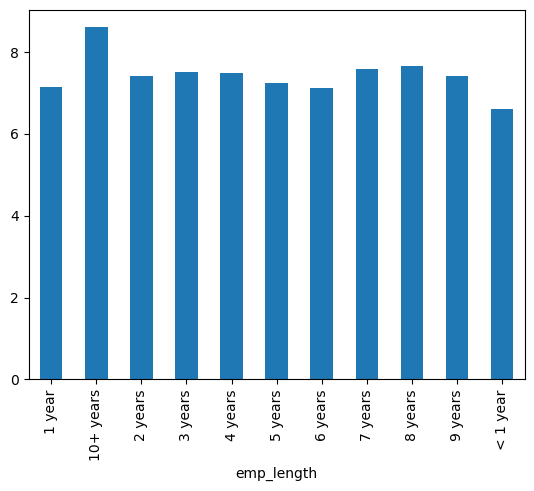

In [25]:
emp_len.plot(kind='bar')

bacause it has very similar ratio each employment year, we will drop `emp_length`

In [15]:
df.drop('emp_length', axis=1, inplace=True)

# Exploratory Data Analysis

In [27]:
# copy data
eda = df.copy()

# define categorical and numerical features
num = df.select_dtypes(include='number').columns
cat = df.select_dtypes(include='object').columns

# print number of feature each type
print(f'number of categorical features : {len(cat)}')
print(f'number of numeric features : {len(num)}')

number of categorical features : 6
number of numeric features : 38


In [194]:
# print shape
print(f'now this dataset contains of {eda.shape[0]} rows and {eda.shape[1]} features')

now this dataset contains of 466256 rows and 44 features


## Univariate Analysis

### Descriptive Statistic

In [195]:
# descriptive statistic for numeric features
eda[num].describe().T

count           mean            std      min  \
loan_amnt                    466256.0   14317.925292    8286.339281   500.00   
funded_amnt                  466256.0   14292.451733    8274.197912   500.00   
funded_amnt_inv              466256.0   14223.162366    8297.216946     0.00   
term                         466256.0      42.605744      10.719247    36.00   
int_rate                     466256.0      13.829513       4.357561     5.42   
installment                  466256.0     432.080469     243.480184    15.67   
annual_inc                   466256.0   73277.492591   54963.005323  1896.00   
loan_status                  466256.0       0.116127       0.320378     0.00   
dti                          466256.0      17.219347       7.850929     0.00   
delinq_2yrs                  466256.0       0.284678       0.797365     0.00   
earliest_cr_line             466256.0     224.491078      86.928944    55.00   
inq_last_6mths               466256.0       0.804745       1.091598     0.00   
mths_since_last_delinq       215934.0      34.104430      21.778487     0.00   
mths_since_last_record        62638.0      74.306012      30.357653     0.00   
open_acc                     466256.0      11.187069       4.987526     0.00   
pub_rec                      466256.0       0.160564       0.510863     0.00   
revol_bal                    466256.0   16231.212967   20676.491928     0.00   
revol_util                   465945.0      56.176947      23.732628     0.00   
total_acc                    466256.0      25.064430      11.600141     1.00   
out_prncp                    466256.0    4410.336638    6355.181225     0.00   
out_prncp_inv                466256.0    4408.726453    6353.300440     0.00   
total_pymnt                  466256.0   11541.137432    8265.661898     0.00   
total_pymnt_inv              466256.0   11470.547736    8253.986974     0.00   
total_rec_prncp              466256.0    8866.341344    7031.761398     0.00   
total_rec_int                466256.0    2588.809240    2483.829425     0.00   
total_rec_late_fee           466256.0       0.649769       5.262683     0.00   
recoveries                   466256.0      85.337081     552.186700     0.00   
collection_recovery_fee      466256.0       8.957759      85.456480     0.00   
last_pymnt_d                 465880.0      13.290283      12.799495     5.00   
last_pymnt_amnt              466256.0    3124.095683    5554.861293     0.00   
next_pymnt_d                 239042.0       4.729265       6.027814     3.00   
last_credit_pull_d           466215.0       9.041740       9.619314     5.00   
collections_12_mths_ex_med   466140.0       0.009085       0.108648     0.00   
mths_since_last_major_derog   98974.0      42.852547      21.662591     0.00   
acc_now_delinq               466256.0       0.004002       0.068637     0.00   
tot_coll_amt                 396009.0     191.913517   14630.214605     0.00   
tot_cur_bal                  396009.0  138801.713385  152114.663494     0.00   
total_rev_hi_lim             396009.0   30379.087771   37247.129571     0.00   

                                   25%        50%          75%           max  
loan_amnt                     8000.000  12000.000   20000.0000  3.500000e+04  
funded_amnt                   8000.000  12000.000   20000.0000  3.500000e+04  
funded_amnt_inv               8000.000  12000.000   19950.0000  3.500000e+04  
term                            36.000     36.000      60.0000  6.000000e+01  
int_rate                        10.990     13.660      16.4900  2.606000e+01  
installment                    256.760    379.915     566.6200  1.409990e+03  
annual_inc                   45000.000  63000.000   88951.5000  7.500000e+06  
loan_status                      0.000      0.000       0.0000  1.000000e+00  
dti                             11.360     16.870      22.7800  3.999000e+01  
delinq_2yrs                      0.000      0.000       0.0000  2.900000e+01  
earliest_cr_line               166.000    

In [196]:
# descriptive statistic for categorical features
df.describe(exclude=[np.number]).T

count unique                 top    freq
grade                466256      7                   B  136919
home_ownership       466256      6            MORTGAGE  235868
verification_status  466256      3            Verified  168055
pymnt_plan           466256      2                   n  466247
purpose              466256     14  debt_consolidation  274194
initial_list_status  466256      2                   f  302976

### Numeric Feature Analysis

In [197]:
len(num)

38

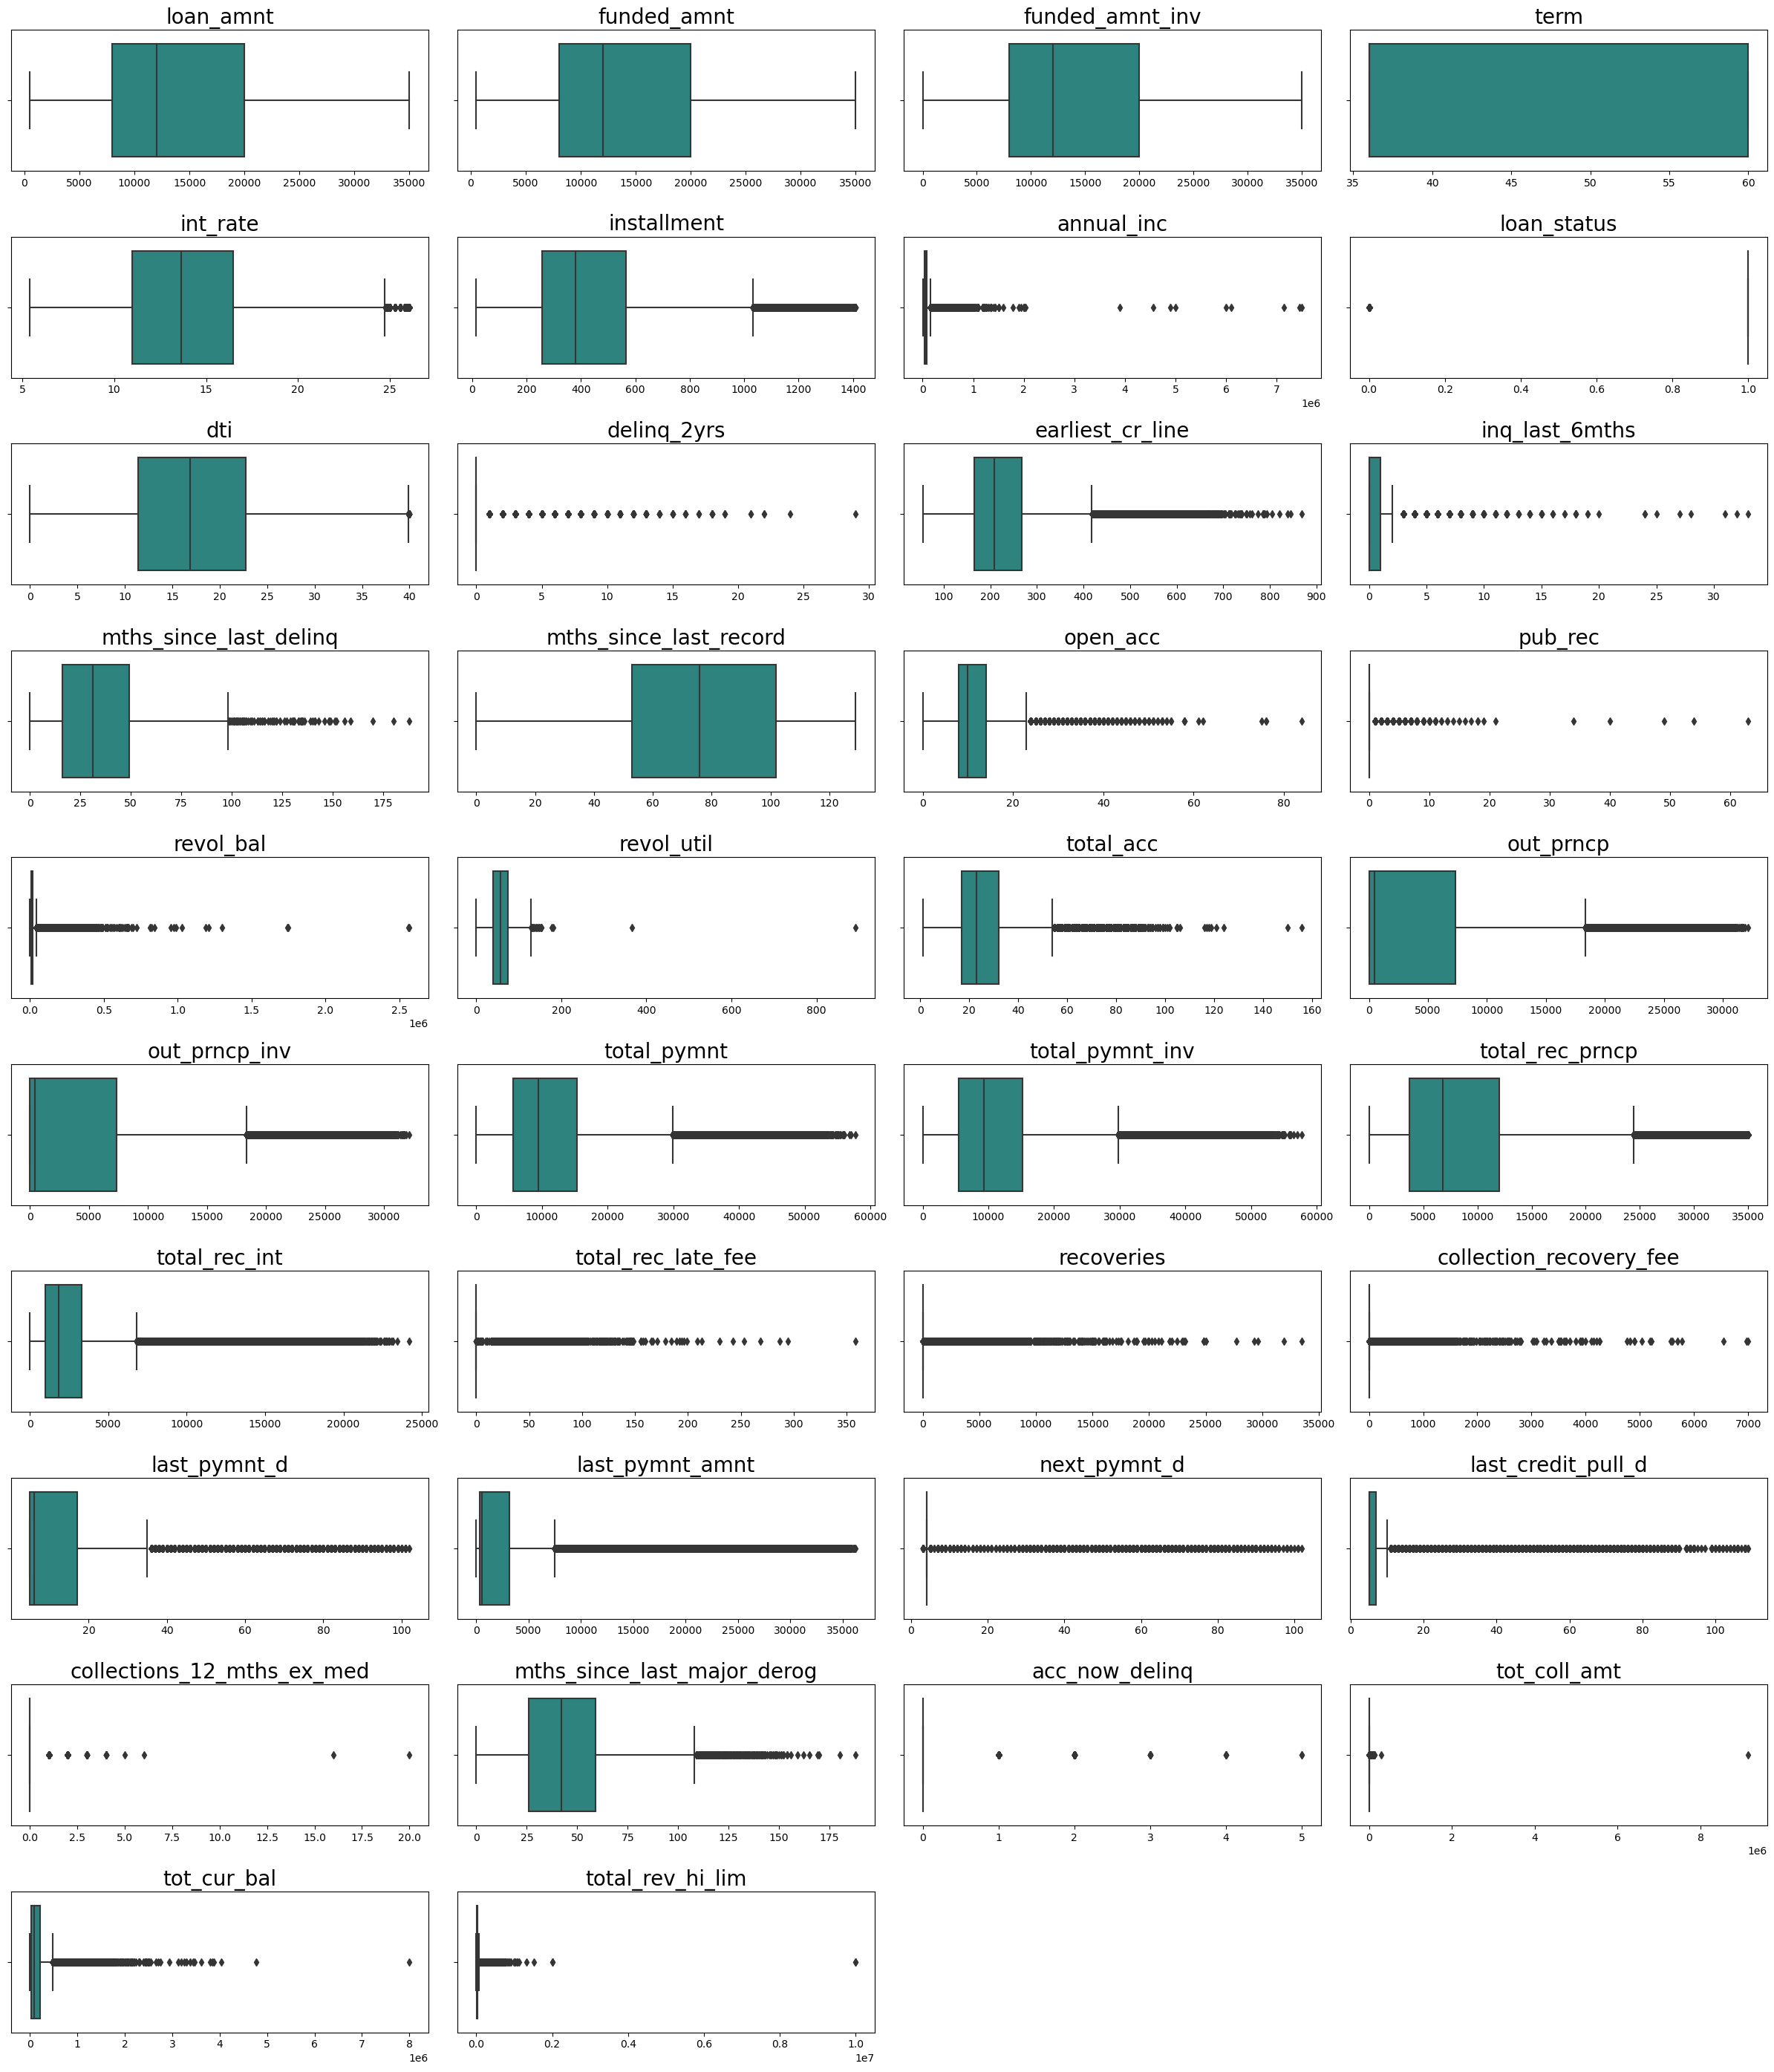

In [28]:
# numeric features analysis
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

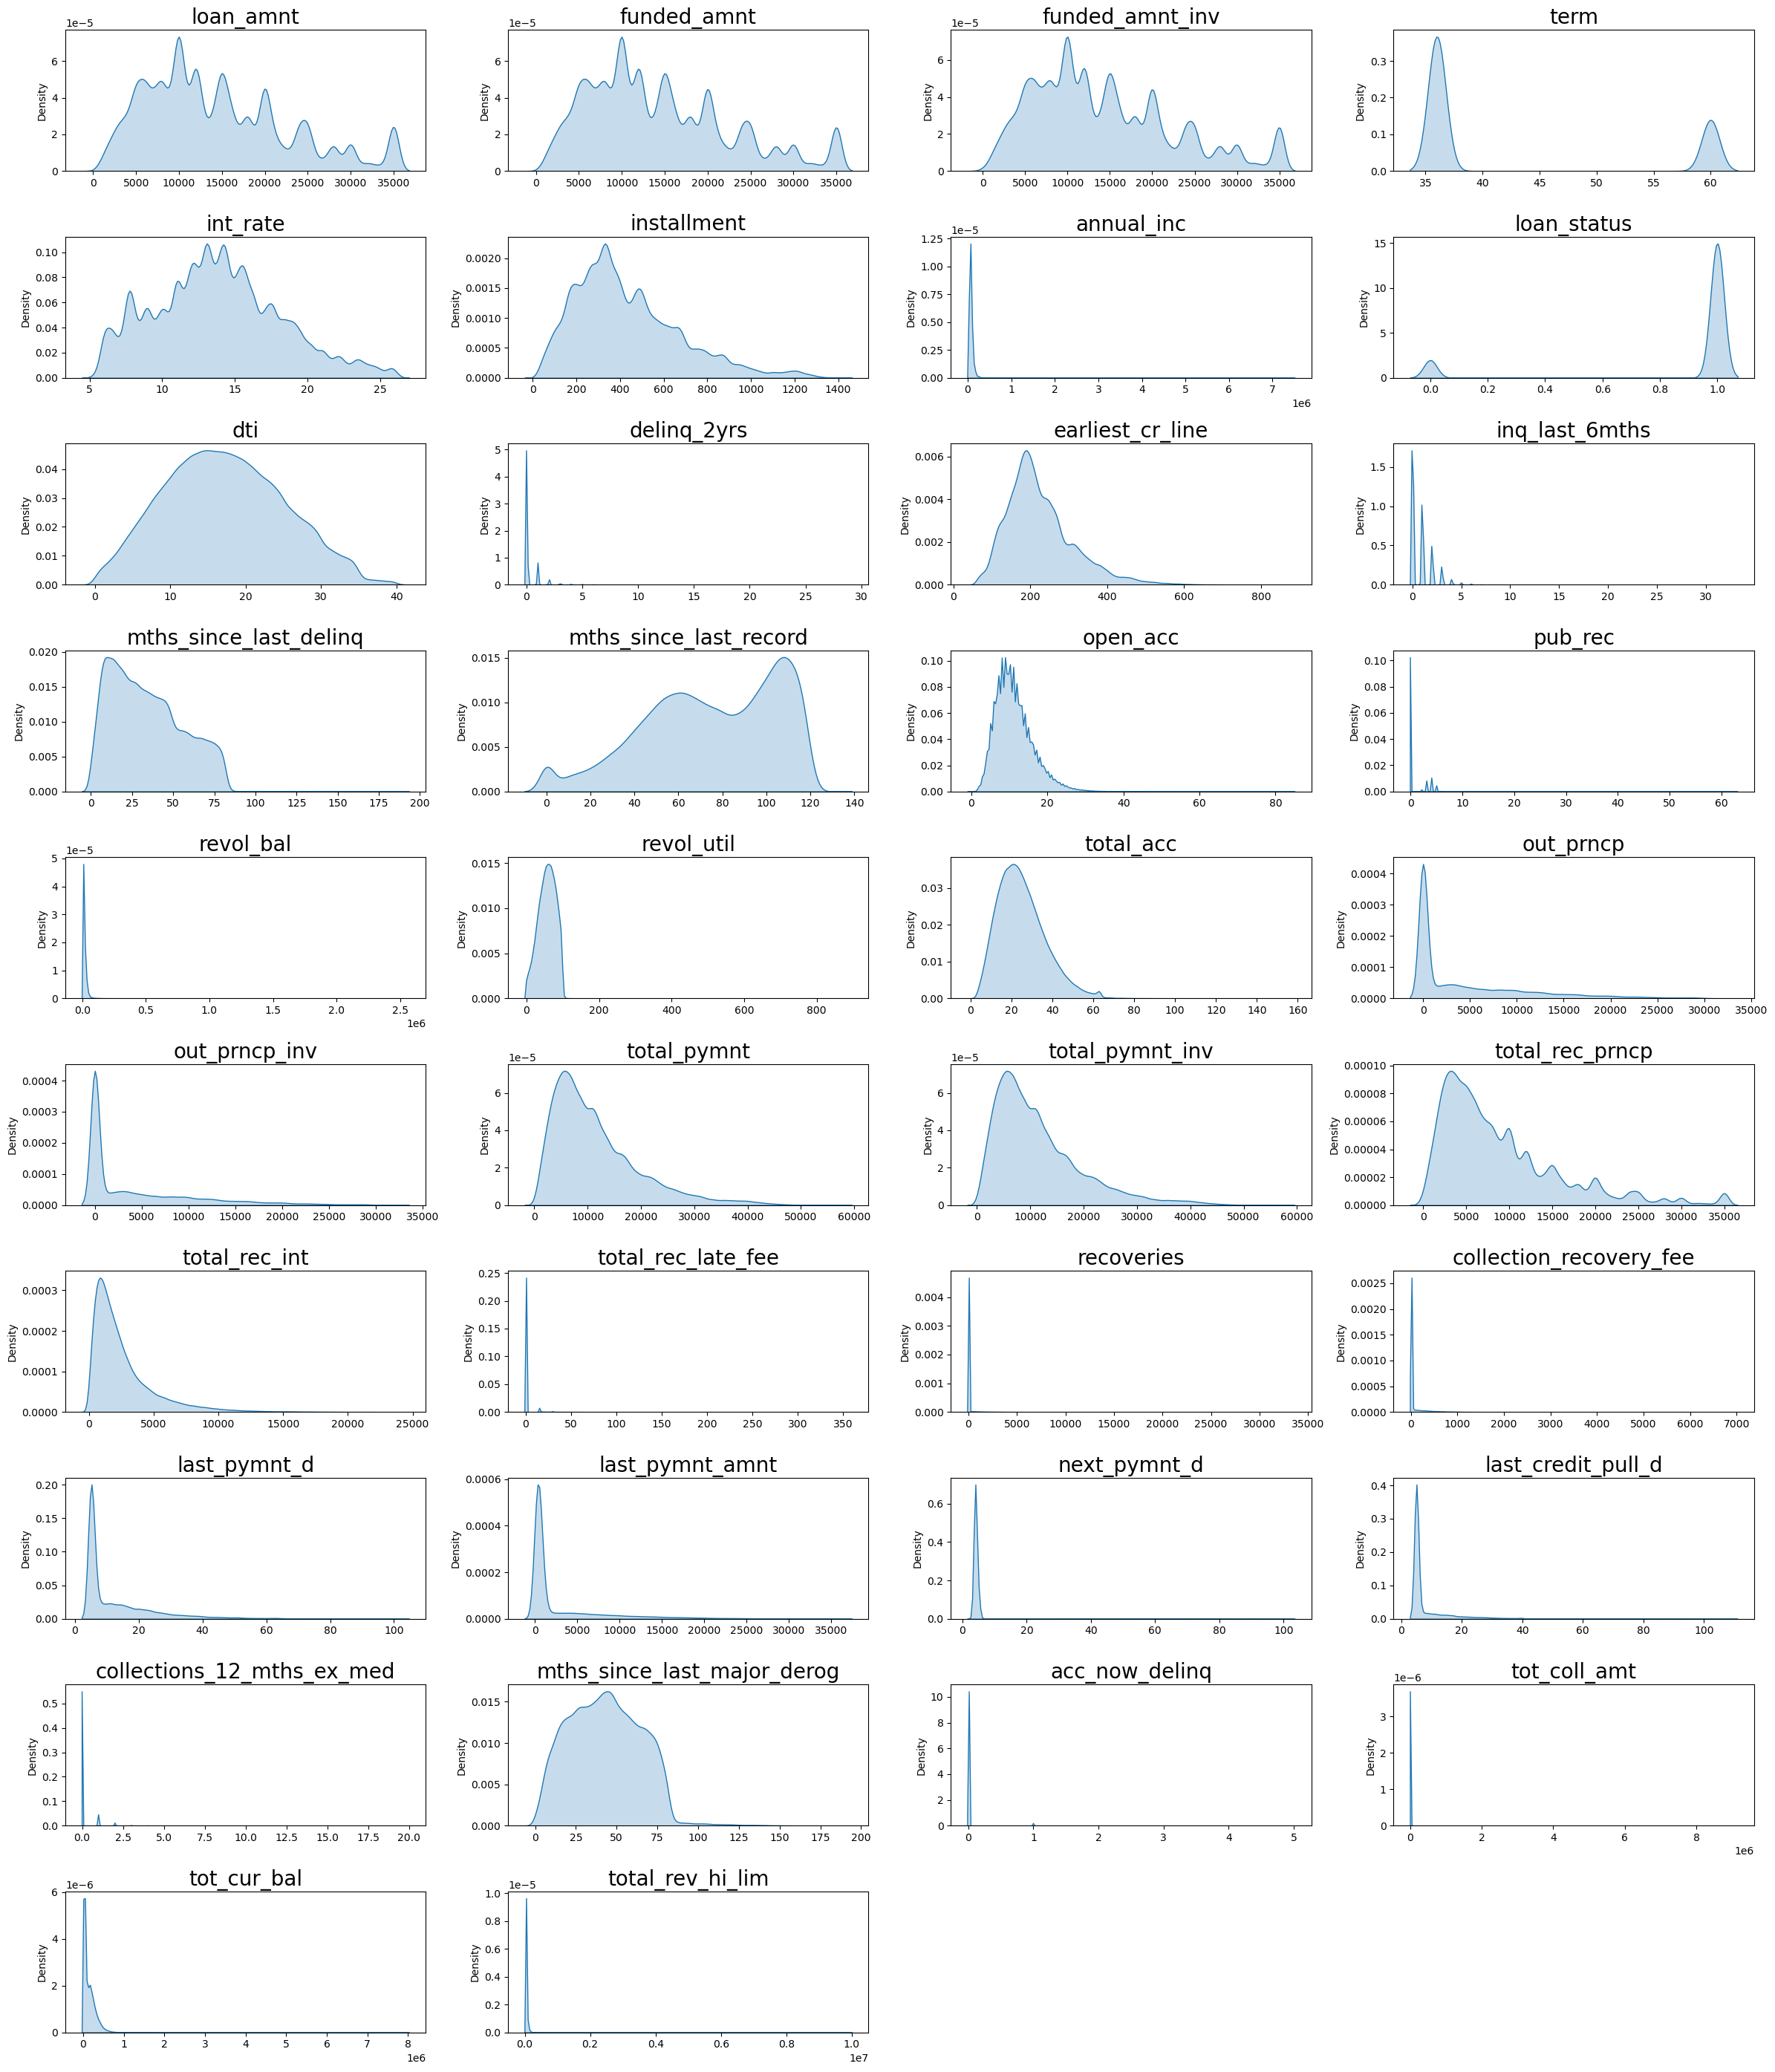

In [29]:
# numeric features analysis
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

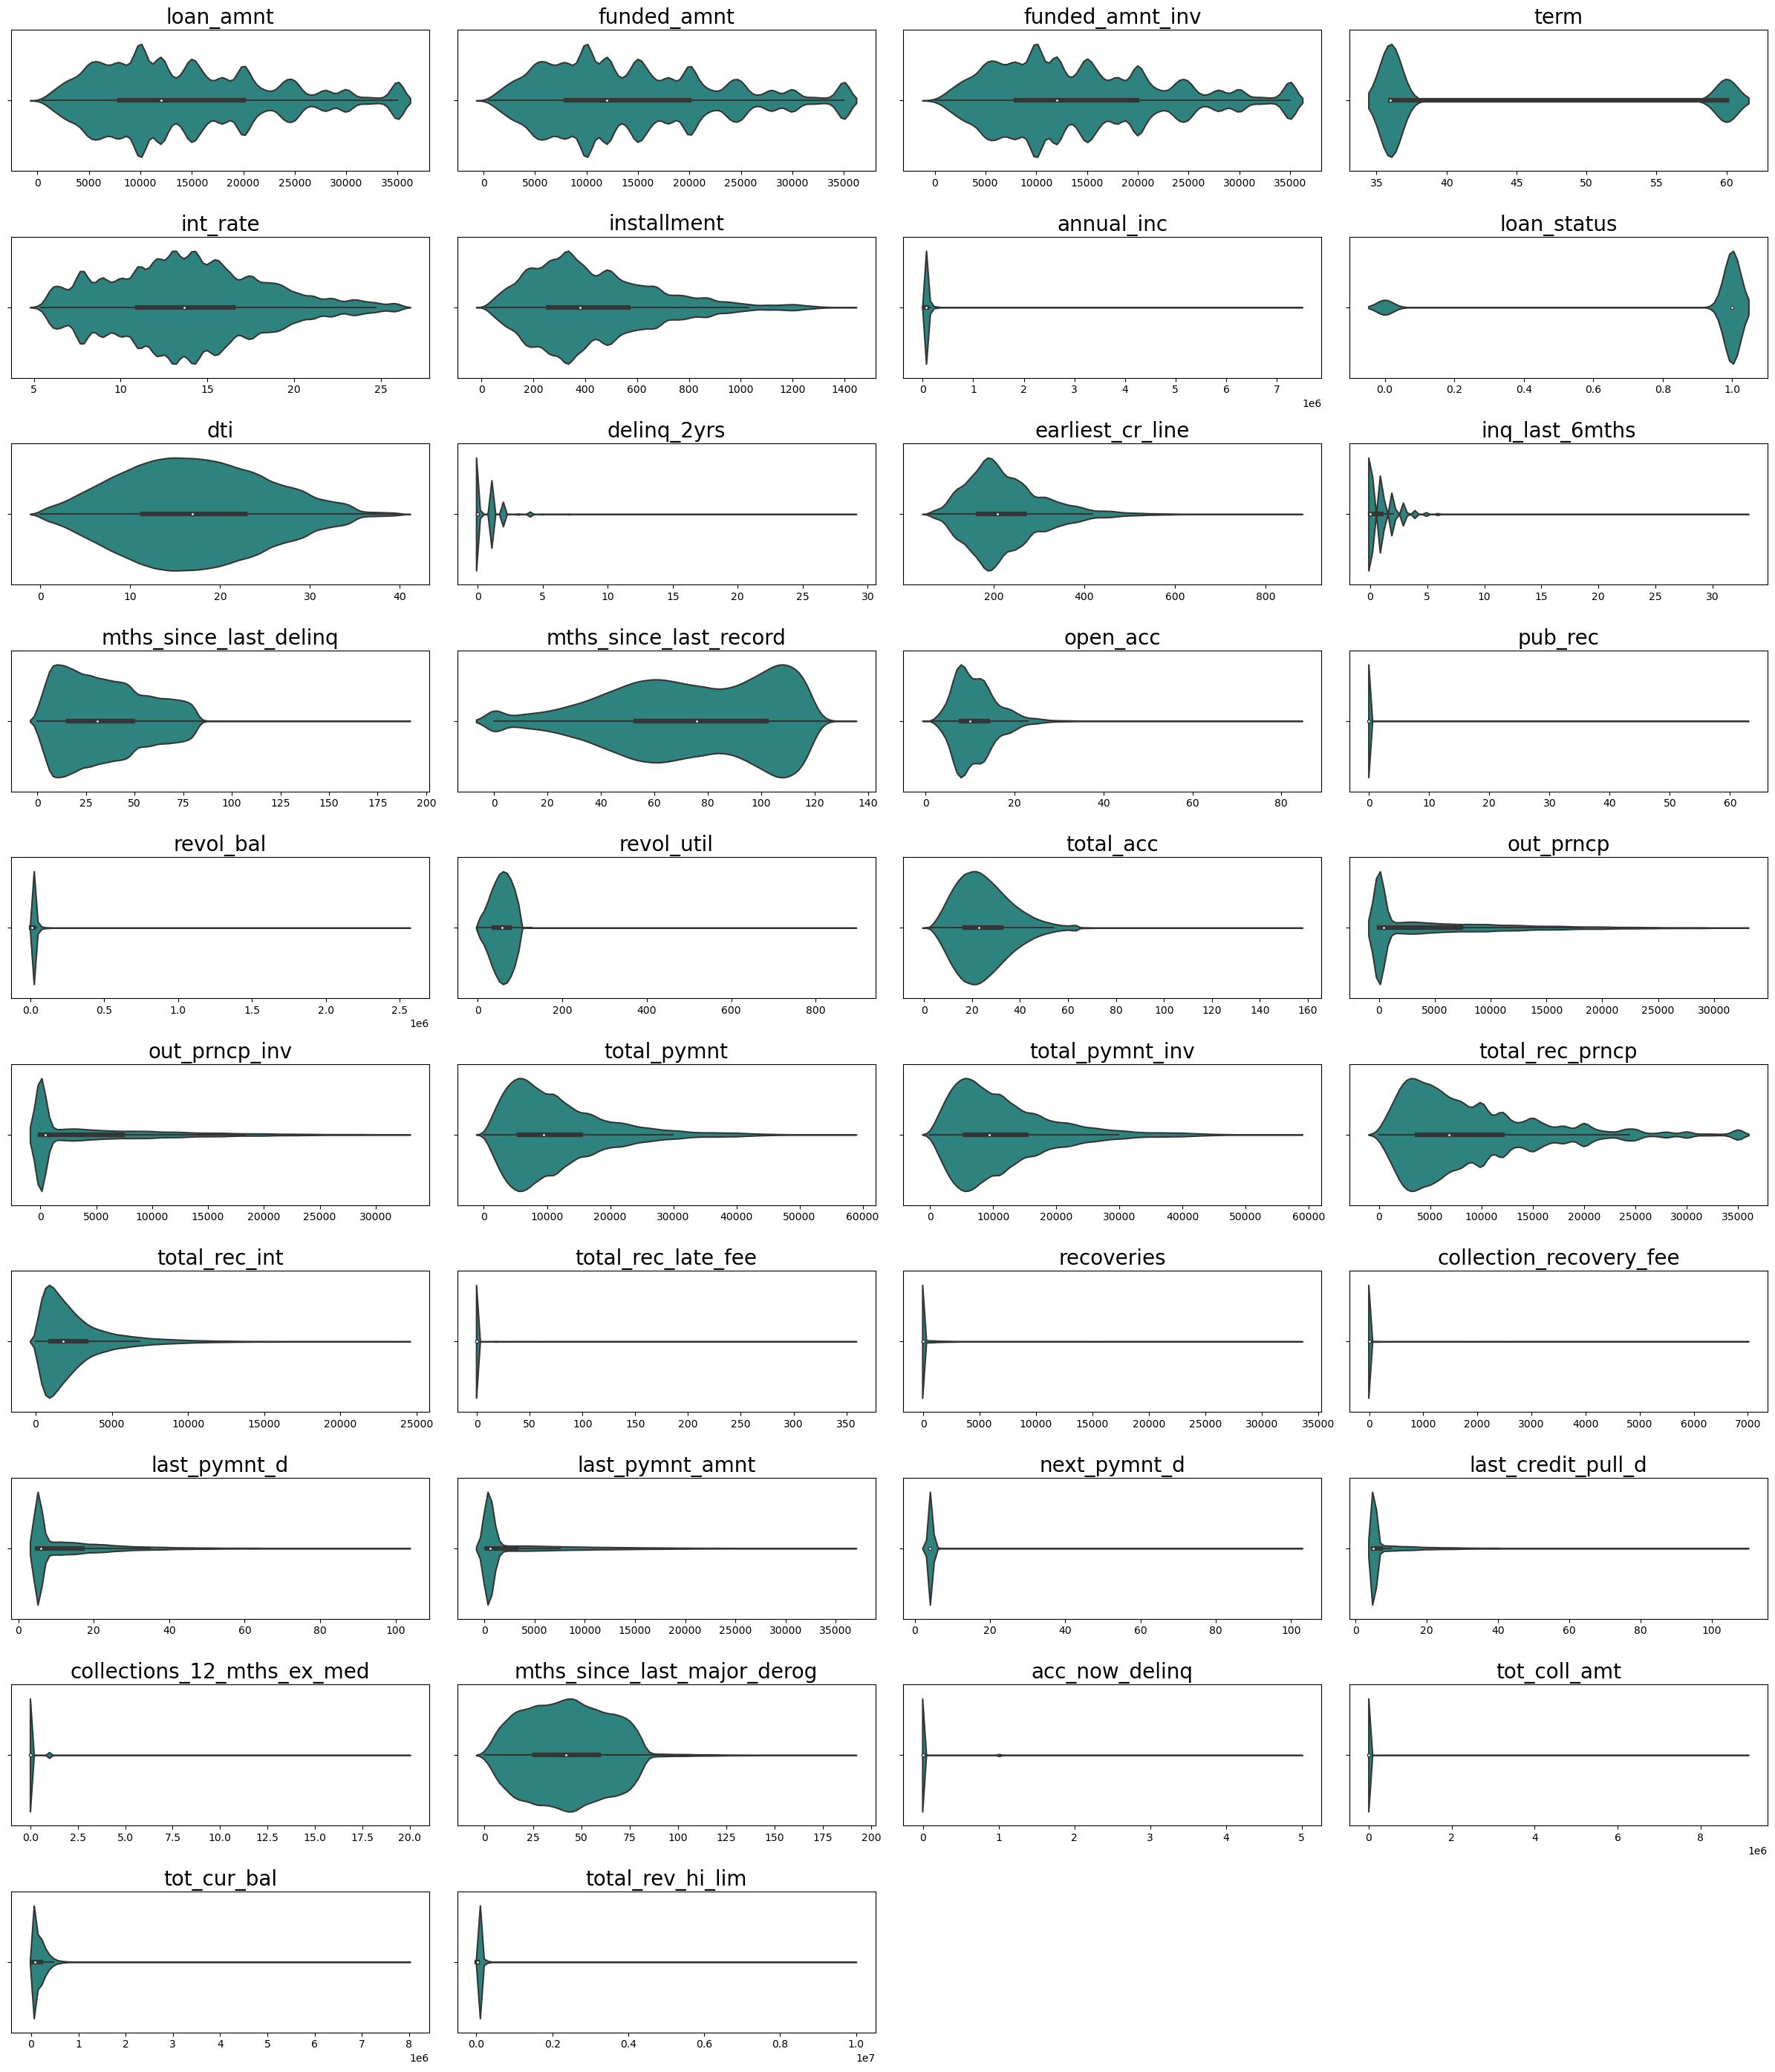

In [30]:
# numeric features analysis
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Feature Analysis

In [204]:
len(cat)

6

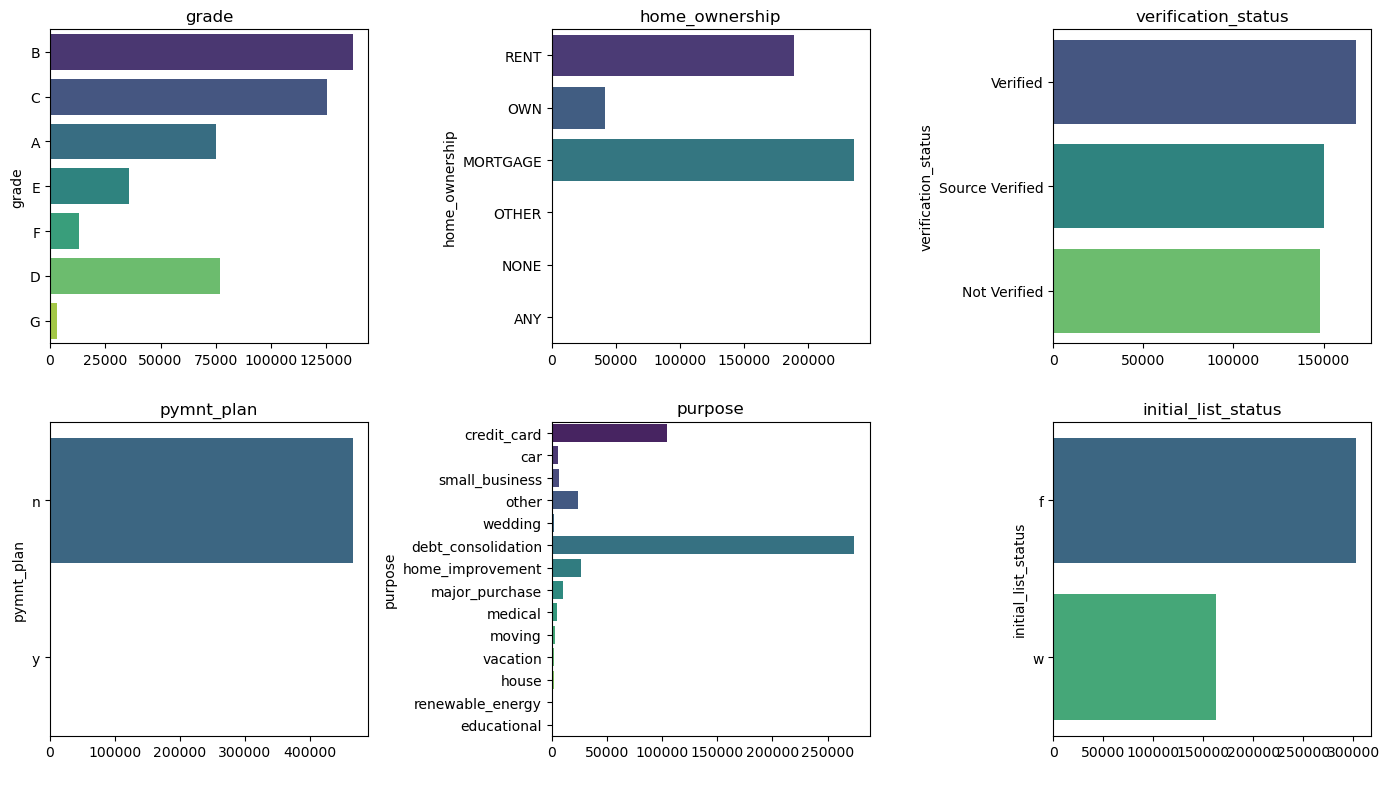

In [31]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

### Numerical Feature Analysis

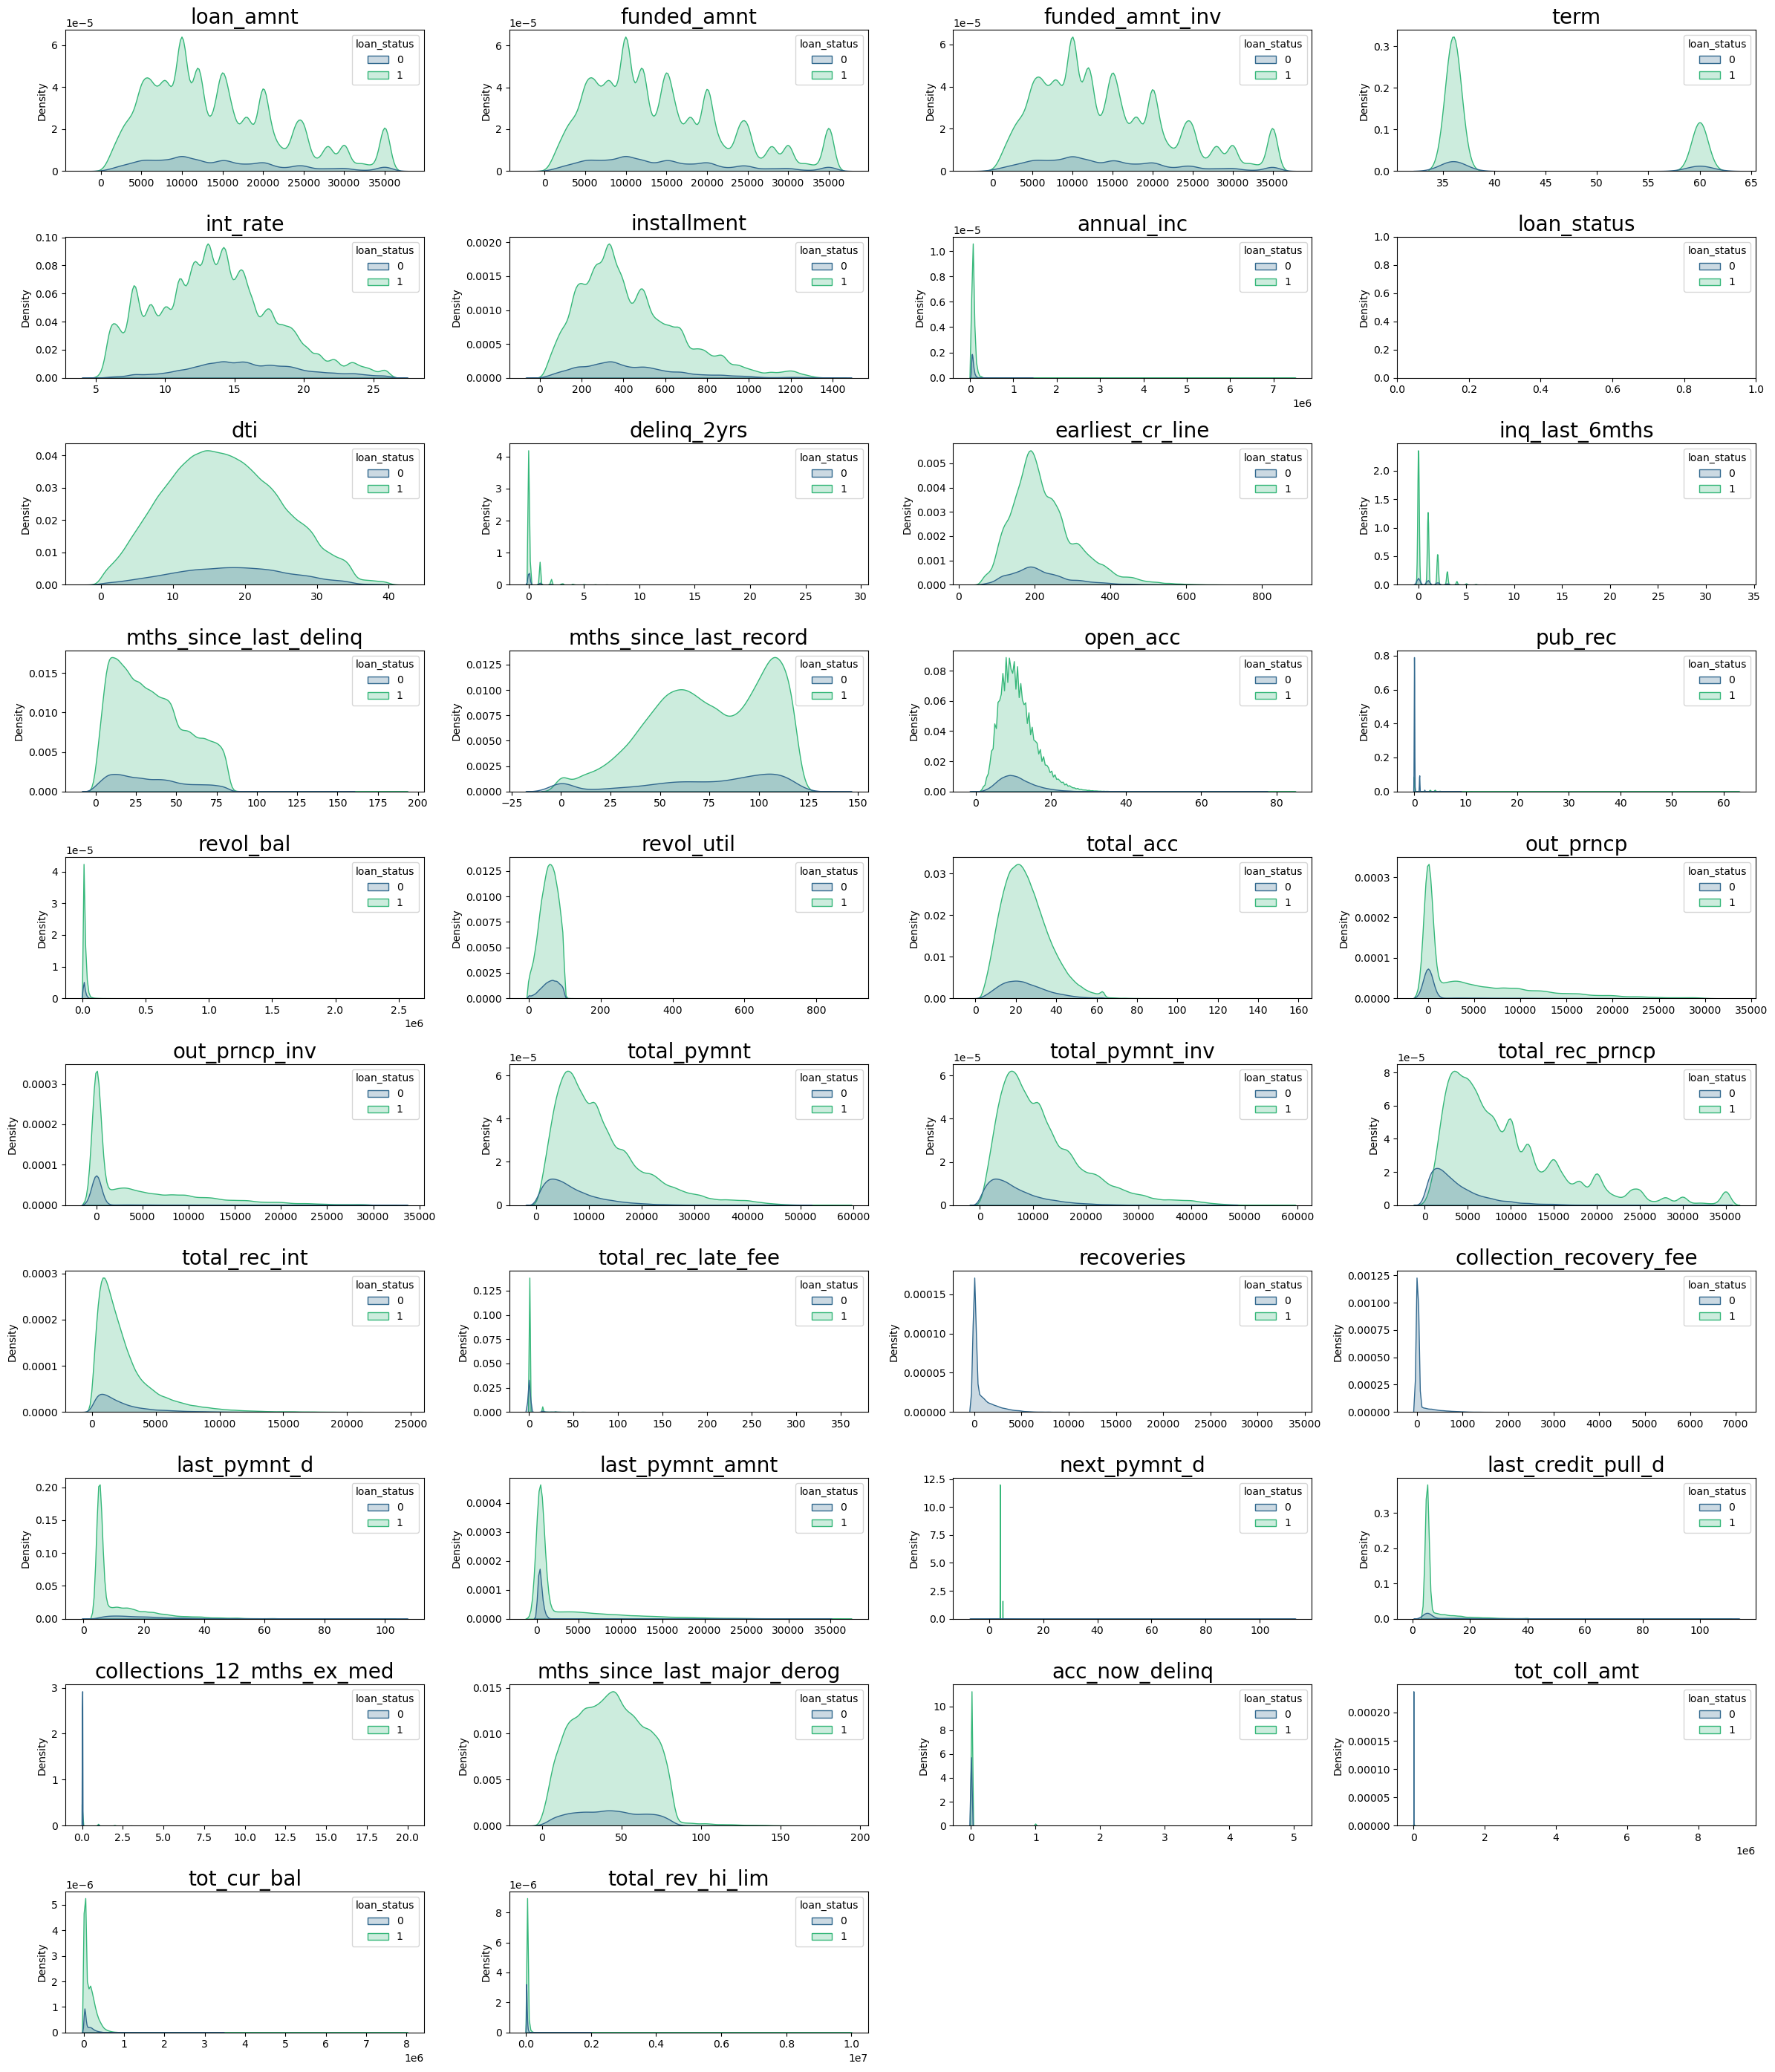

In [32]:
# numeric features analysis
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['loan_status'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Feature Analysis

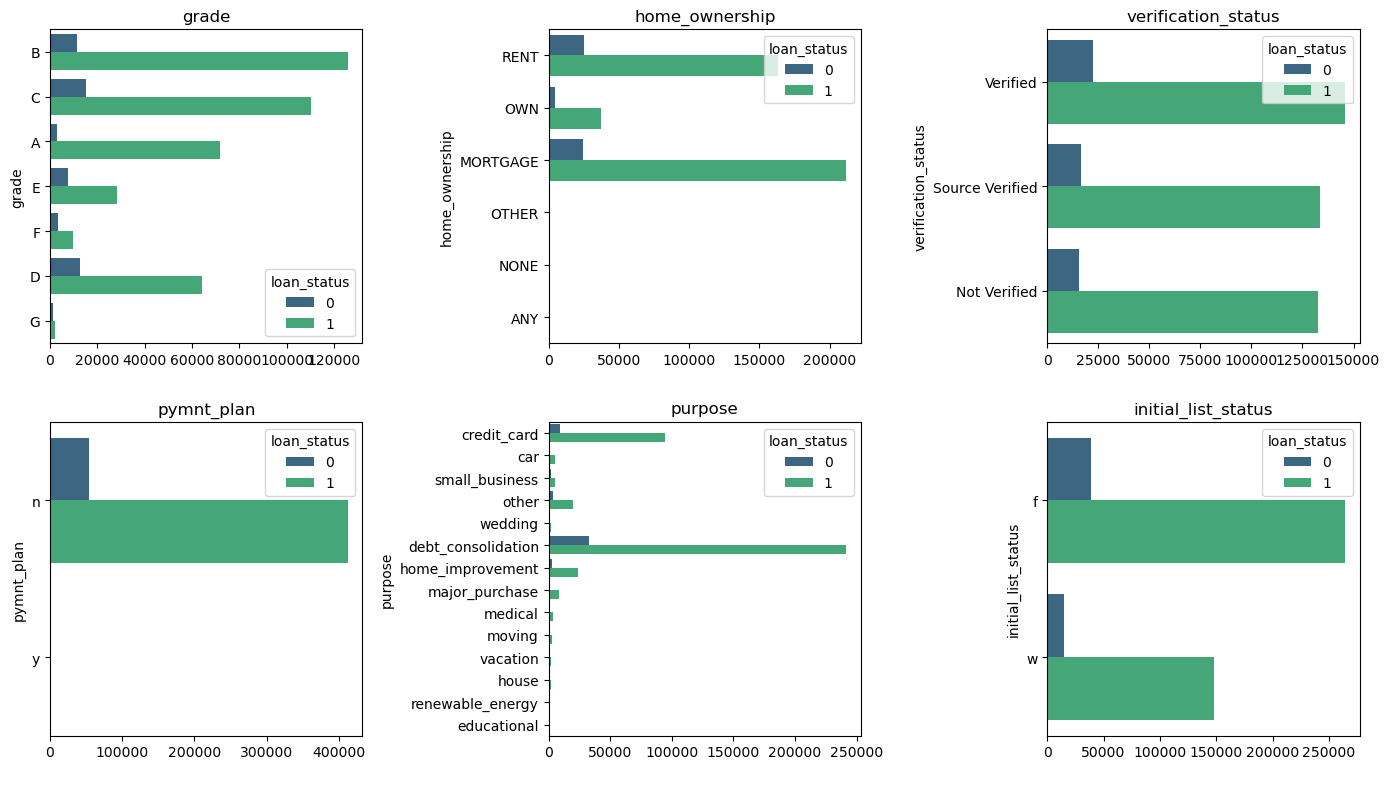

In [33]:
# numeric features analysis
plt.figure(figsize=(14,8))
for i in range(0,len(cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis', hue=eda['loan_status'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

* seems `pymnt_plan` only dominated by single value `n`, we will drop it

### Correlation Heatmap

<AxesSubplot:>

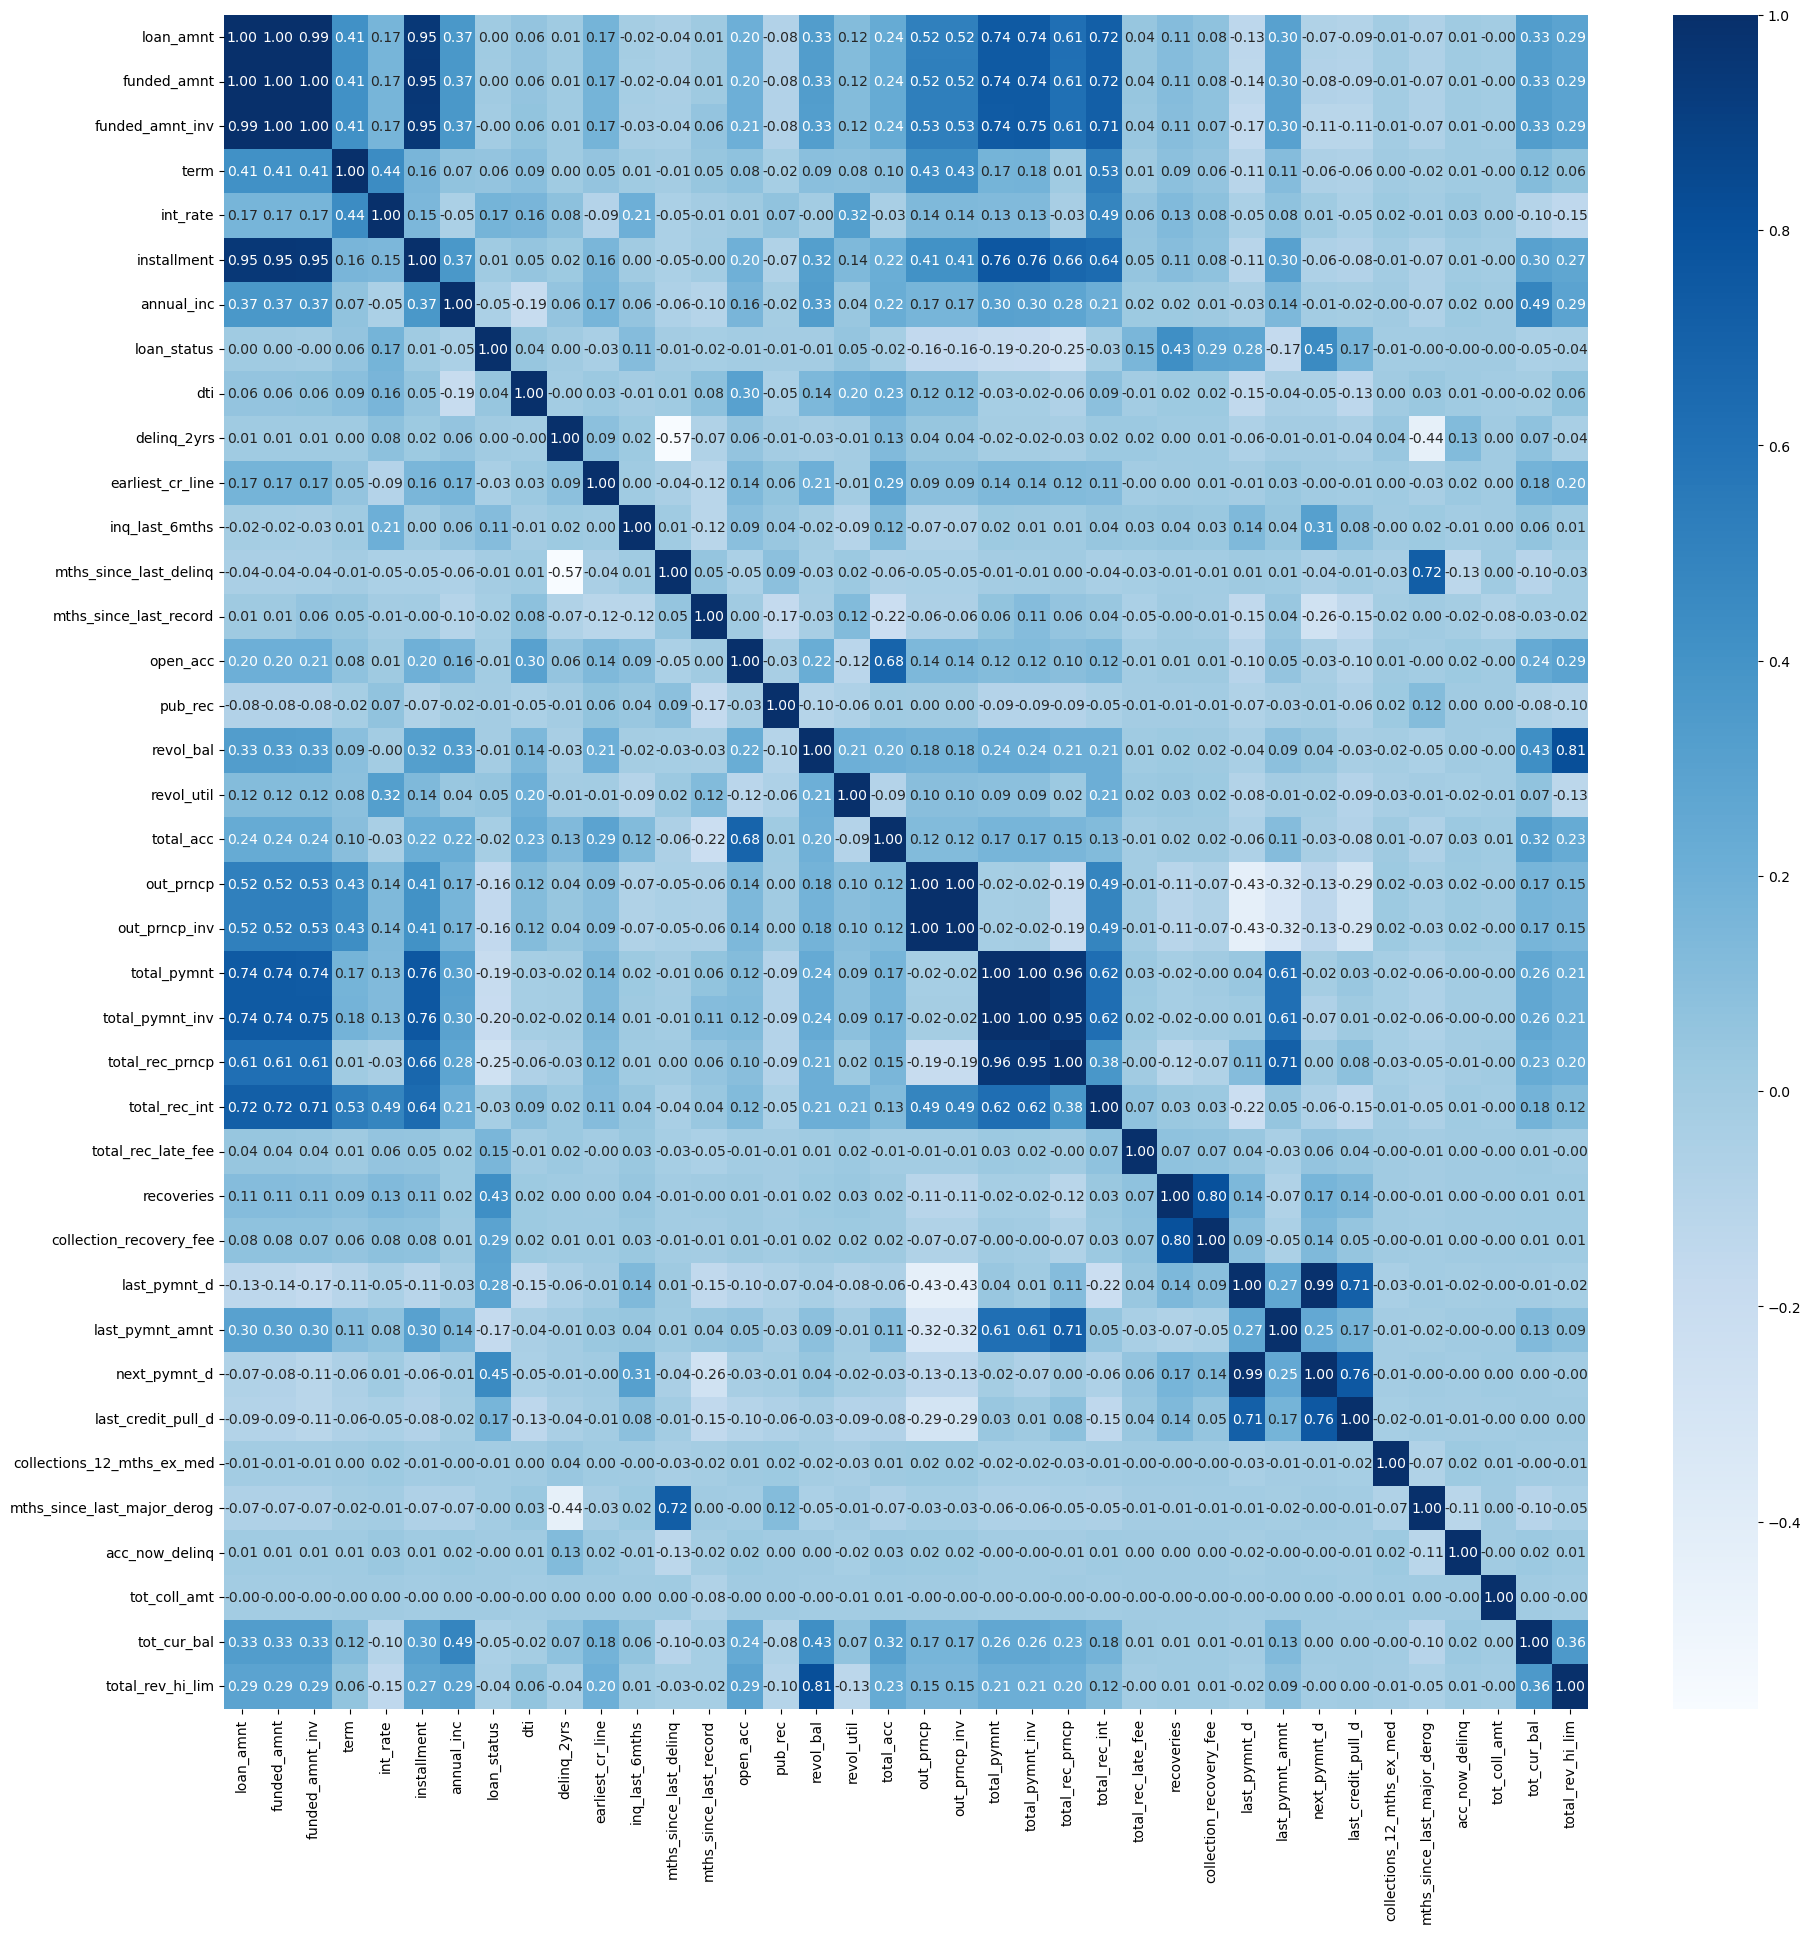

In [217]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

There are some high correlated independent features, we need to remove one of correlated features to prevent multicolinearity, we will use 70% correlation value as a treshold

# Data Preprocessing

## Droping Highly Correlated Features

In [16]:
# create a square matrix with dimensions equal to the number of features.
cor_matrix = df.corr().abs()

# we are selecting the upper traingular (doesn't matter choose upper/lower, its the same result)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# create drop list for highly correlated features, we set treshold = 0.7
drop_list = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

# show drop_list
drop_list

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_major_derog',
 'total_rev_hi_lim']

In [35]:
# drop
df = df.drop(drop_list, axis=1)

# print shape
print(f'for now, our dataset contains of {df.shape[0]} rows and {df.shape[1]} features')

for now, our dataset contains of 466256 rows and 30 features


In [36]:
df.corr()['loan_status'].sort_values()

recoveries                   -0.426364
last_pymnt_d                 -0.277309
int_rate                     -0.172505
total_rec_late_fee           -0.154183
inq_last_6mths               -0.110395
term                         -0.058503
revol_util                   -0.047998
dti                          -0.043246
loan_amnt                    -0.004412
delinq_2yrs                  -0.002226
acc_now_delinq                0.000458
tot_coll_amt                  0.001178
collections_12_mths_ex_med    0.005137
open_acc                      0.008042
mths_since_last_delinq        0.009535
pub_rec                       0.009864
revol_bal                     0.010913
total_acc                     0.024588
mths_since_last_record        0.024931
earliest_cr_line              0.033243
annual_inc                    0.048966
tot_cur_bal                   0.050865
out_prncp                     0.157165
loan_status                   1.000000
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Features Correlation to Target Feature')

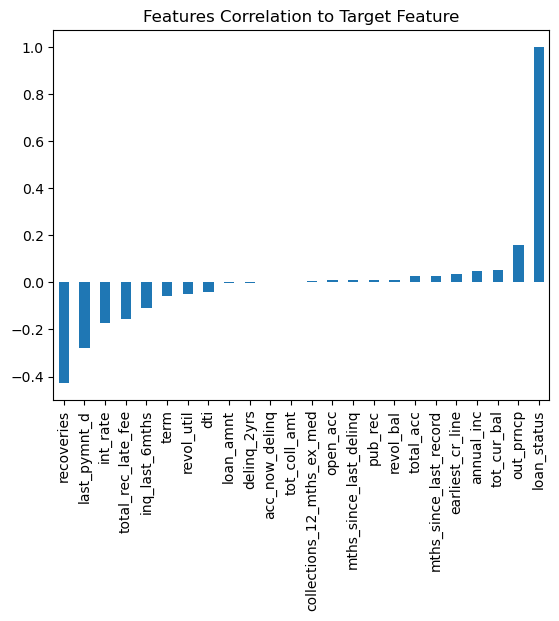

In [37]:
df.corr()['loan_status'].sort_values().plot(kind='bar')
plt.title('Features Correlation to Target Feature')

## Drop Feature that are Dominated by One Value

In [38]:
# drop feature
df = df.drop('pymnt_plan', axis=1)

# print shape
print(f'for now, our dataset contains of {df.shape[0]} rows and {df.shape[1]} features')

for now, our dataset contains of 466256 rows and 29 features


## Handling Missing Values

In [224]:
df.isnull().sum()/len(df)*100

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
grade                          0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
loan_status                    0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq        53.687674
mths_since_last_record        86.565749
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
revol_util                     0.066702
total_acc                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
last_pymnt_d                   0.080642


We will drop high missing values features :
* `mths_since_last_delinq` and `mths_since_last_record`

we will impute these feature :
* `last_pymnt_d` with median
* `tot_cur_bal` with 0
* `tot_coll_amt` with 0
* `revol_util` with 0
* `collections_12_mths_ex_med` with 0

In [39]:
# drop features
df = df.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)

# fill missing values
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(6).astype('int') # median = 6, convert to integer
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0)
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['revol_util'] = df['revol_util'].fillna(0)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [40]:
# check missing values
df.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
dtype: int64

# Feature Selection Using Weight of Evidence & Information Value

In [19]:
#df.to_csv('data_bersih_sebelum_woe.csv')
#df=pd.read_csv('data_bersih_sebelum_woe.csv', index_col=0)

In [20]:
df.head()

loan_amnt  term  int_rate grade home_ownership  annual_inc  \
0       5000    36     10.65     B           RENT     24000.0   
1       2500    60     15.27     C           RENT     30000.0   
2       2400    36     15.96     C           RENT     12252.0   
3      10000    36     13.49     C           RENT     49200.0   
4       3000    60     12.69     B           RENT     80000.0   

  verification_status  loan_status         purpose    dti  delinq_2yrs  \
0            Verified            1     credit_card  27.65          0.0   
1     Source Verified            0             car   1.00          0.0   
2        Not Verified            1  small_business   8.72          0.0   
3     Source Verified            1           other  20.00          0.0   
4     Source Verified            1           other  17.94          0.0   

   earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0             377.0             1.0       3.0      0.0      13648        83.7   
1             206.0             5.0       3.0      0.0       1687         9.4   
2             175.0             2.0       2.0      0.0       2956        98.5   
3             244.0             1.0      10.0      0.0       5598        21.0   
4             245.0             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        9.0                   f        0.0                0.00        0.00   
1        4.0                   f        0.0                0.00      117.08   
2       10.0                   f        0.0                0.00        0.00   
3       37.0                   f        0.0               16.97        0.00   
4       38.0                   f      766.9                0.00        0.00   

   last_pymnt_d  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0            17                         0.0             0.0           0.0   
1            38                         0.0             0.0           0.0   
2            24                         0.0             0.0           0.0   
3            17                         0.0             0.0           0.0   
4             5                         0.0             0.0           0.0   

   tot_cur_bal  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [21]:
print(f'this dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

this dataset contains of 466256 rows and 27 columns


(-0.5, 866.5, 181.5, -0.5)

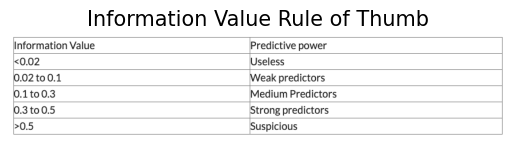

In [193]:
from matplotlib import image

img = image.imread('IV.png')
plt.title('Information Value Rule of Thumb', fontsize=15)
plt.imshow(img)
plt.axis('off')

we will use this rule of thumb to determine which features that will be used on modeling

## Categorical Features

### WoE : `grade`

In [47]:
# make probability analysis
grade = df.groupby('grade').agg(num_observation=('loan_status','count'),
                                good_loan_prob=('loan_status','mean')).reset_index()
grade

grade  num_observation  good_loan_prob
0     A            74856        0.959469
1     B           136919        0.917710
2     C           125287        0.878535
3     D            76887        0.835798
4     E            35756        0.789798
5     F            13229        0.741401
6     G             3322        0.679711

In [49]:
# find grade proportion
grade['grade_proportion'] = grade['num_observation']/grade['num_observation'].sum()

# find number of good loan
grade['num_good_loan'] = grade['grade_proportion'] * grade['num_observation']

# find number of bad loan
grade['num_bad_loan'] = (1-grade['grade_proportion']) * grade['num_observation']

# find good loan proportion
grade['good_loan_prop'] = grade['num_good_loan'] / grade['num_good_loan'].sum()

# find bad loan proportion
grade['bad_loan_prop'] = grade['num_bad_loan'] / grade['num_bad_loan'].sum()

# find Weight of Evidence
grade['weight_of_evidence'] = np.log(grade['good_loan_prop'] / grade['bad_loan_prop'])

# sort values by weight of evidence
grade = grade.sort_values('weight_of_evidence').reset_index(drop=True)
grade

grade  num_observation  good_loan_prob  grade_proportion  num_good_loan  \
0     G             3322        0.679711          0.007125      23.668723   
1     F            13229        0.741401          0.028373     375.344105   
2     E            35756        0.789798          0.076687    2742.037713   
3     A            74856        0.959469          0.160547   12017.905906   
4     D            76887        0.835798          0.164903   12678.894790   
5     C           125287        0.878535          0.268709   33665.695174   
6     B           136919        0.917710          0.293656   40207.123471   

   num_bad_loan  good_loan_prop  bad_loan_prop  weight_of_evidence  
0   3298.331277        0.000233       0.009048           -3.660499  
1  12853.655895        0.003690       0.035259           -2.257022  
2  33013.962287        0.026959       0.090562           -1.211711  
3  62838.094094        0.118158       0.172374           -0.377645  
4  64208.105210        0.124656       0.176132           -0.345672  
5  91621.304826        0.330995       0.251330            0.275334  
6  96711.876529        0.395309       0.265295            0.398827

In [50]:
# find difference each good loan proportion
grade['good_loan_prop_diff'] = grade['good_loan_prop'].diff().abs()

# find difference each weight of evidence
grade['diff_woe'] = grade['weight_of_evidence'].diff().abs()
grade

grade  num_observation  good_loan_prob  grade_proportion  num_good_loan  \
0     G             3322        0.679711          0.007125      23.668723   
1     F            13229        0.741401          0.028373     375.344105   
2     E            35756        0.789798          0.076687    2742.037713   
3     A            74856        0.959469          0.160547   12017.905906   
4     D            76887        0.835798          0.164903   12678.894790   
5     C           125287        0.878535          0.268709   33665.695174   
6     B           136919        0.917710          0.293656   40207.123471   

   num_bad_loan  good_loan_prop  bad_loan_prop  weight_of_evidence  \
0   3298.331277        0.000233       0.009048           -3.660499   
1  12853.655895        0.003690       0.035259           -2.257022   
2  33013.962287        0.026959       0.090562           -1.211711   
3  62838.094094        0.118158       0.172374           -0.377645   
4  64208.105210        0.124656       0.176132           -0.345672   
5  91621.304826        0.330995       0.251330            0.275334   
6  96711.876529        0.395309       0.265295            0.398827   

   good_loan_prop_diff  diff_woe  
0                  NaN       NaN  
1             0.003458  1.403477  
2             0.023269  1.045311  
3             0.091199  0.834065  
4             0.006499  0.031973  
5             0.206338  0.621006  
6             0.064314  0.123492

In [52]:
# find information value
grade['information_value'] = (grade['good_loan_prop']-grade['bad_loan_prop']) * grade['weight_of_evidence']
grade['information_value'] = grade['information_value'].sum()

# show
grade

grade  num_observation  good_loan_prob  grade_proportion  num_good_loan  \
0     G             3322        0.679711          0.007125      23.668723   
1     F            13229        0.741401          0.028373     375.344105   
2     E            35756        0.789798          0.076687    2742.037713   
3     A            74856        0.959469          0.160547   12017.905906   
4     D            76887        0.835798          0.164903   12678.894790   
5     C           125287        0.878535          0.268709   33665.695174   
6     B           136919        0.917710          0.293656   40207.123471   

   num_bad_loan  good_loan_prop  bad_loan_prop  weight_of_evidence  \
0   3298.331277        0.000233       0.009048           -3.660499   
1  12853.655895        0.003690       0.035259           -2.257022   
2  33013.962287        0.026959       0.090562           -1.211711   
3  62838.094094        0.118158       0.172374           -0.377645   
4  64208.105210        0.124656       0.176132           -0.345672   
5  91621.304826        0.330995       0.251330            0.275334   
6  96711.876529        0.395309       0.265295            0.398827   

   good_loan_prop_diff  diff_woe  information_value  
0                  NaN       NaN           0.292644  
1             0.003458  1.403477           0.292644  
2             0.023269  1.045311           0.292644  
3             0.091199  0.834065           0.292644  
4             0.006499  0.031973           0.292644  
5             0.206338  0.621006           0.292644  
6             0.064314  0.123492           0.292644

Text(0.5, 1.0, 'Weight of Evidence by grade')

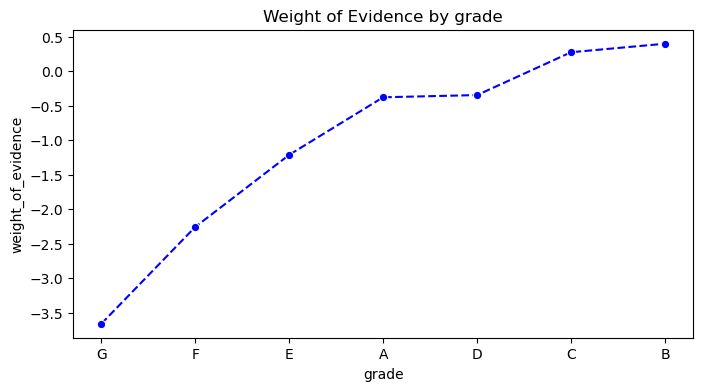

In [69]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='grade', y='weight_of_evidence', data=grade,
             marker='o', linestyle='--', color='blue')
plt.title(str('Weight of Evidence by ' + grade.columns[0]))

In [9]:
# Automate the Code

def woe(df, feature_name):
    # make probability analysis
    feature_name = df.groupby(feature_name).agg(num_observation=('loan_status','count'),
                                                good_loan_prob=('loan_status','mean')).reset_index()
    
    # find grade proportion
    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()
    
    # find number of good loan
    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']

    # find number of bad loan
    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']

    # find good loan proportion
    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()

    # find bad loan proportion
    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()

    # find Weight of Evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    
    # find difference each good loan proportion
    feature_name['good_loan_prop_diff'] = feature_name['good_loan_prop'].diff().abs()

    # find difference each weight of evidence
    feature_name['diff_woe'] = feature_name['weight_of_evidence'].diff().abs()
    
    # find information value
    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()
    
    return feature_name

In [10]:
# build plot function
def plot_woe(df, xlabel_rotation=0):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=df.columns[0], y='weight_of_evidence', data=df, marker='o', linestyle='--', color='blue')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = xlabel_rotation)

In [87]:
# try find weight of evidence and information value
woe(df,'grade')

grade  num_observation  good_loan_prob  grade_proportion  num_good_loan  \
0     G             3322        0.679711          0.007125      23.668723   
1     F            13229        0.741401          0.028373     375.344105   
2     E            35756        0.789798          0.076687    2742.037713   
3     A            74856        0.959469          0.160547   12017.905906   
4     D            76887        0.835798          0.164903   12678.894790   
5     C           125287        0.878535          0.268709   33665.695174   
6     B           136919        0.917710          0.293656   40207.123471   

   num_bad_loan  good_loan_prop  bad_loan_prop  weight_of_evidence  \
0   3298.331277        0.000233       0.009048           -3.660499   
1  12853.655895        0.003690       0.035259           -2.257022   
2  33013.962287        0.026959       0.090562           -1.211711   
3  62838.094094        0.118158       0.172374           -0.377645   
4  64208.105210        0.124656       0.176132           -0.345672   
5  91621.304826        0.330995       0.251330            0.275334   
6  96711.876529        0.395309       0.265295            0.398827   

   good_loan_prop_diff  diff_woe  information_value  
0                  NaN       NaN           0.292644  
1             0.003458  1.403477           0.292644  
2             0.023269  1.045311           0.292644  
3             0.091199  0.834065           0.292644  
4             0.006499  0.031973           0.292644  
5             0.206338  0.621006           0.292644  
6             0.064314  0.123492           0.292644

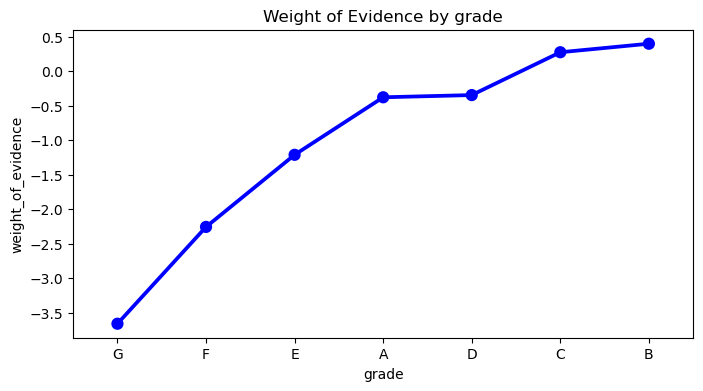

In [414]:
# plot
plot_woe(woe(df,'grade'))

seems `grade:A` and `grade:D` have similar weight of evidence, but for now, we'll keep it as it is

### WoE : `home_ownership`

In [90]:
df['home_ownership'].value_counts()

MORTGAGE    235868
RENT        188456
OWN          41703
OTHER          182
NONE            46
ANY              1
Name: home_ownership, dtype: int64

because `home_ownership` has some values that have little frequency, we will combine `ANY`, `NONE`, and `OTHER` into 1 value --> `OTHER`

In [94]:
df['home_ownership'] = np.where(df['home_ownership']=='ANY','OTHER',
                       np.where(df['home_ownership']=='NONE','OTHER',df['home_ownership']))

In [95]:
df['home_ownership'].value_counts()

MORTGAGE    235868
RENT        188456
OWN          41703
OTHER          229
Name: home_ownership, dtype: int64

In [96]:
woe(df, 'home_ownership')

home_ownership  num_observation  good_loan_prob  grade_proportion  \
0          OTHER              229        0.681223          0.000491   
1            OWN            41703        0.885380          0.089442   
2           RENT           188456        0.866579          0.404190   
3       MORTGAGE           235868        0.897621          0.505877   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.112473     228.887527    5.645582e-07       0.000857   
1    3730.011429   37972.988571    1.872287e-02       0.142203   
2   76172.025531  112283.974469    3.823470e-01       0.420486   
3  119320.101884  116547.898116    5.989296e-01       0.436454   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -7.325323                  NaN       NaN           0.311676  
1           -2.027510             0.018722  5.297813           0.311676  
2           -0.095083             0.363624  1.932427           0.311676  
3            0.316461             0.216583  0.411544           0.311676

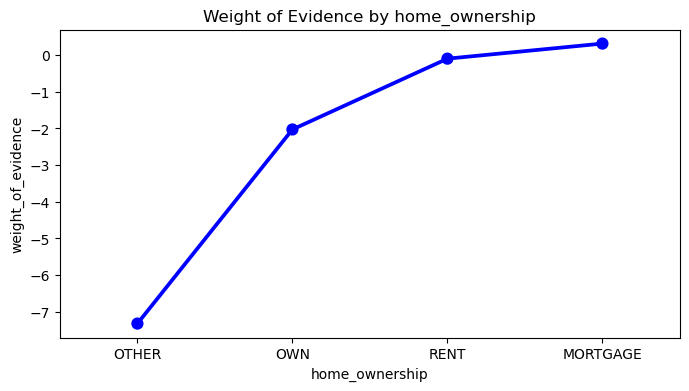

In [235]:
plot_woe(woe(df, 'home_ownership'))

every values in `home_ownership` differ by looking at their weight of evidence

### WoE : `verification_status`

In [98]:
woe(df, 'verification_status')

verification_status  num_observation  good_loan_prob  grade_proportion  \
0        Not Verified           148208        0.895437          0.317868   
1     Source Verified           149993        0.891342          0.321697   
2            Verified           168055        0.867008          0.360435   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0   47110.624344  101097.375656        0.302116       0.325784   
1   48252.247797  101740.752203        0.309437       0.327857   
2   60572.910644  107482.089356        0.388448       0.346359   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -0.075425                  NaN       NaN           0.007677  
1           -0.057825             0.007321  0.017600           0.007677  
2            0.114684             0.079011  0.172509           0.007677

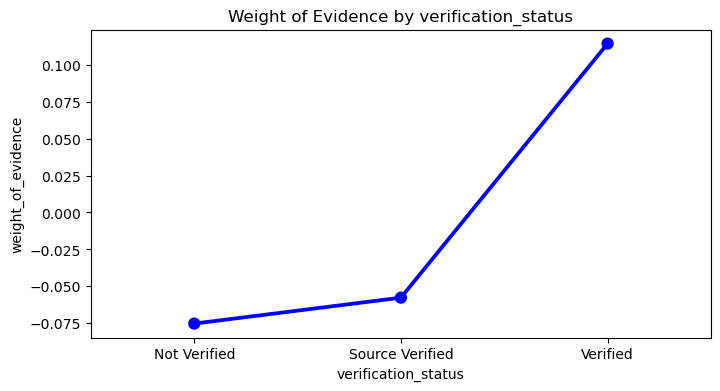

In [236]:
plot_woe(woe(df, 'verification_status'))

* every values in `verification_status` differ by looking at their weight of evidence 
* BUT it has very low information value `0.007677`, and we will drop this feature (later)

### WoE : `purpose`

In [102]:
woe(df,'purpose')

purpose  num_observation  good_loan_prob  grade_proportion  \
0     renewable_energy              351        0.840456          0.000753   
1          educational              422        0.637441          0.000905   
2                house             2269        0.843543          0.004866   
3              wedding             2343        0.860009          0.005025   
4             vacation             2487        0.872135          0.005334   
5               moving             2994        0.834335          0.006421   
6              medical             4602        0.856584          0.009870   
7                  car             5397        0.900130          0.011575   
8       small_business             7013        0.766862          0.015041   
9       major_purchase             9828        0.891941          0.021079   
10               other            23662        0.847266          0.050749   
11    home_improvement            26537        0.893922          0.056915   
12         credit_card           104157        0.909070          0.223390   
13  debt_consolidation           274194        0.880949          0.588076   

    num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0        0.264235     350.735765        0.000001       0.001259   
1        0.381945     421.618055        0.000002       0.001514   
2       11.041919    2257.958081        0.000059       0.008106   
3       11.773895    2331.226105        0.000063       0.008369   
4       13.265607    2473.734393        0.000071       0.008881   
5       19.225567    2974.774433        0.000102       0.010679   
6       45.422266    4556.577734        0.000242       0.016358   
7       62.471280    5334.528720        0.000333       0.019151   
8      105.483187    6907.516813        0.000562       0.024798   
9      207.159981    9620.840019        0.001104       0.034539   
10    1200.821532   22461.178468        0.006397       0.080635   
11    1510.355618   25026.644382        0.008047       0.089845   
12   23267.648350   80889.351650        0.123960       0.290390   
13  161246.932235  112947.067765        0.859057       0.405477   

    weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0            -6.796197                  NaN       NaN           1.409338  
1            -6.611825         6.271103e-07  0.184371           1.409338  
2            -4.925763         5.679194e-05  1.686062           1.409338  
3            -4.893511         3.899663e-06  0.032252           1.409338  
4            -4.833555         7.947229e-06  0.059955           1.409338  
5            -4.646928         3.175220e-05  0.186627           1.409338  
6            -4.213571         1.395652e-04  0.433358           1.409338  
7            -4.052495         9.083010e-05  0.161076           1.409338  
8            -3.787060         2.291497e-04  0.265435           1.409338  
9            -3.443441         5.416919e-04  0.343618           1.409338  
10           -2.534028         5.293818e-03  0.909413           1.409338  
11           -2.412842         1.649070e-03  0.121187           1.409338  
12           -0.851264         1.159139e-01  1.561578           1.409338  
13            0.750772         7.350966e-01  1.602036           1.409338

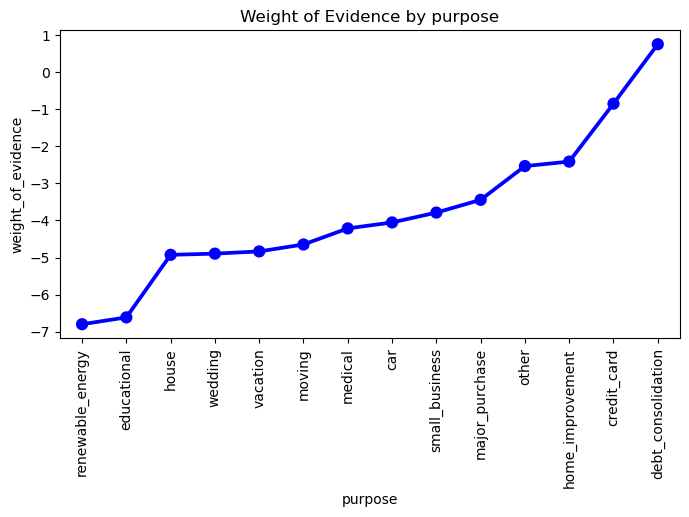

In [237]:
plot_woe(woe(df,'purpose'), 90)

there are some similar values on this feature, and we will join as:
* we will join value `purpose:renewable_energy__educational`
* we will join value `purpose:house__wedding__vacation__moving`
* we will join value `purpose:medical__car__small_business__major_purpose`
* we will join value `purpose:other__home_improvement`

BUT as a consideration, because it has 1.4 Information value, it's considered as suspicius. we will consider this feature will be dropped or not later

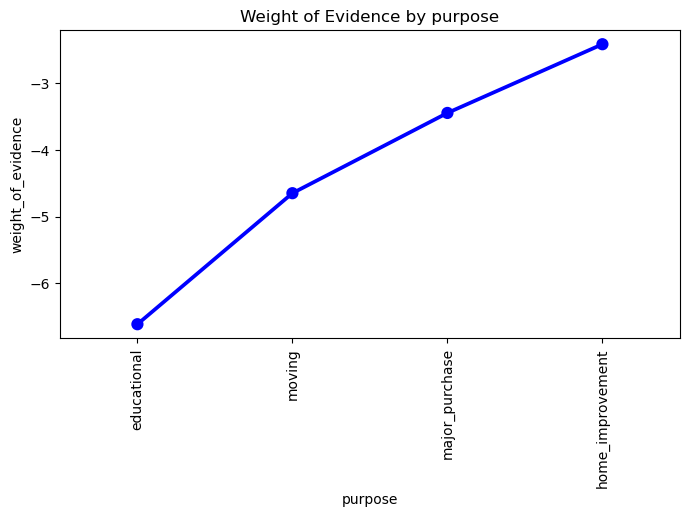

In [238]:
# plot again after combining some values
plot_woe(woe(df,'purpose').iloc[[1,5,9,11],:], 90)

### WoE : `initial_list_status`

In [113]:
woe(df,'initial_list_status')

initial_list_status  num_observation  good_loan_prob  grade_proportion  \
0                   w           163280        0.907741          0.350194   
1                   f           302976        0.871010          0.649806   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0   57179.657527  106100.342473        0.225068            0.5   
1  196875.657527  106100.342473        0.774932            0.5   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -0.798207                  NaN       NaN           0.339919  
1            0.438168             0.549865  1.236374           0.339919

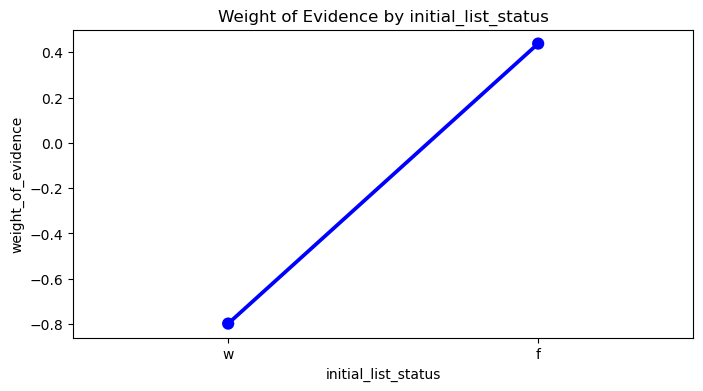

In [239]:
plot_woe(woe(df,'initial_list_status'))

## Numeric Features

In [23]:
# make a function to show data distribution and info
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(df[feature],color='orange')
    print('number of unique values :',df[feature].nunique())
    print('Distribution :')
    print(df[feature].describe().T)

In [26]:
# build new plot function
def plot_num_woe(df,rot=0):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=df.columns[0], y='weight_of_evidence',data=df, color='orange')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = rot)
    plt.xlabel(' ')

In [5]:
# make a copy data
data_process = df.copy()

### WoE : `loan_amnt`

number of unique values : 1352
Distribution :
count    466256.000000
mean      14317.925292
std        8286.339281
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


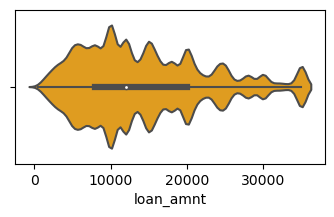

In [170]:
dist('loan_amnt')

we will implement fine-classing using pandas cut method, we split feature into 10 categories

In [172]:
# fine classing = 10 class
data_process['loan_amnt_fc'] = pd.cut(df['loan_amnt'], 10)

In [173]:
woe(data_process,'loan_amnt_fc')

loan_amnt_fc  num_observation  good_loan_prob  grade_proportion  \
0  (28100.0, 31550.0]            13389        0.871088          0.028716   
1  (31550.0, 35000.0]            21517        0.878840          0.046148   
2  (21200.0, 24650.0]            25467        0.882789          0.054620   
3  (24650.0, 28100.0]            26705        0.882232          0.057275   
4     (465.5, 3950.0]            27884        0.877815          0.059804   
5  (17750.0, 21200.0]            58167        0.884264          0.124753   
6  (14300.0, 17750.0]            60751        0.882685          0.130295   
7  (10850.0, 14300.0]            65080        0.889505          0.139580   
8    (3950.0, 7400.0]            75691        0.886737          0.162338   
9   (7400.0, 10850.0]            91605        0.883718          0.196469   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0     384.478314  13004.521686        0.006354       0.032051   
1     992.976582  20524.023418        0.016411       0.050583   
2    1391.012853  24075.987147        0.022989       0.059337   
3    1529.539620  25175.460380        0.025279       0.062047   
4    1667.576301  26216.423699        0.027560       0.064612   
5    7256.528364  50910.471636        0.119929       0.125473   
6    7915.574279  52835.425721        0.130822       0.130217   
7    9083.864658  55996.135342        0.150130       0.138007   
8   12287.514758  63403.485242        0.203077       0.156263   
9   17997.572203  73607.427797        0.297448       0.181411   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -1.618182                  NaN       NaN           0.250015  
1           -1.125662             0.010057  0.492521           0.250015  
2           -0.948200             0.006578  0.177461           0.250015  
3           -0.897920             0.002289  0.050280           0.250015  
4           -0.852032             0.002281  0.045888           0.250015  
5           -0.045185             0.092369  0.806848           0.250015  
6            0.004633             0.010892  0.049817           0.250015  
7            0.084200             0.019308  0.079567           0.250015  
8            0.262047             0.052947  0.177848           0.250015  
9            0.494473             0.094371  0.232426           0.250015

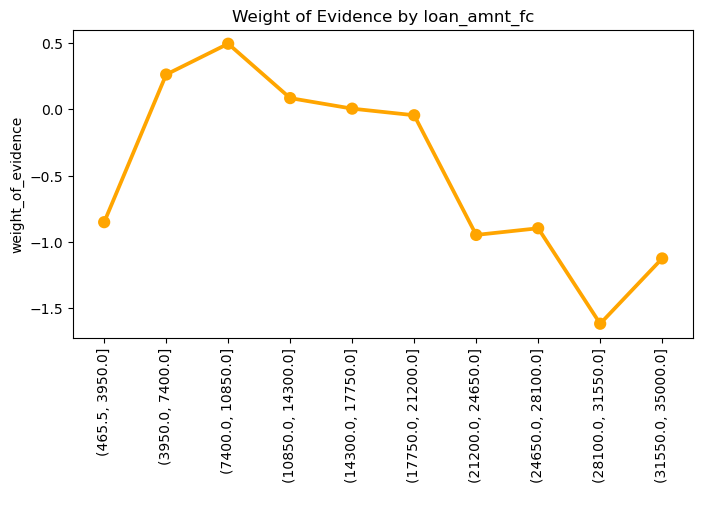

In [240]:
plot_num_woe(woe(data_process,'loan_amnt_fc'),90)

we will bin these values:
* `(10850.0, 14300.0]__ (14300.0, 17750.0]__ (17750.0, 21200.0]`
* `(21200.0, 24650.0]__ (24650.0, 28100.0]`

### WoE : `term`

In [175]:
data_process['term'].value_counts()

36    337924
60    128332
Name: term, dtype: int64

In [176]:
# we will implement label encoding for this feature as 36=0, 60=1
data_process['term'] = np.where(data_process['term'] == 36,0,1)
data_process['term'].value_counts()

0    337924
1    128332
Name: term, dtype: int64

we will run label encoding `term` feature to the original data later

In [177]:
woe(data_process,'term')

term  num_observation  good_loan_prob  grade_proportion  num_good_loan  \
0     1           128332        0.853458          0.275239   35322.016712   
1     0           337924        0.895423          0.724761  244914.016712   

   num_bad_loan  good_loan_prop  bad_loan_prop  weight_of_evidence  \
0  93009.983288        0.126044            0.5           -1.377979   
1  93009.983288        0.873956            0.5            0.558422   

   good_loan_prop_diff  diff_woe  information_value  
0                  NaN       NaN           0.724129  
1             0.747912  1.936401           0.724129

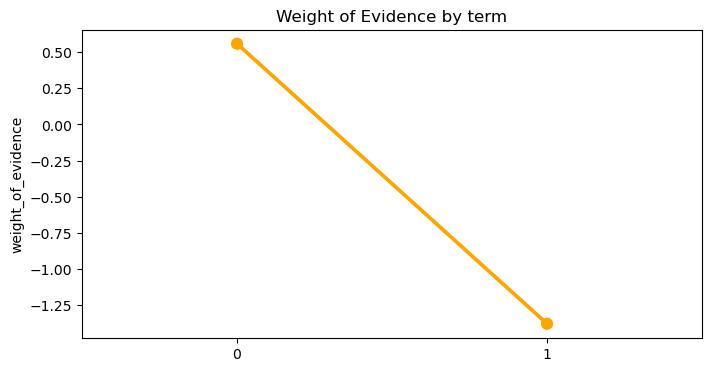

In [241]:
plot_num_woe(woe(data_process,'term'))

it has high information value, we will drop `term`

### WoE : `int_rate`

number of unique values : 506
Distribution :
count    466256.000000
mean         13.829513
std           4.357561
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


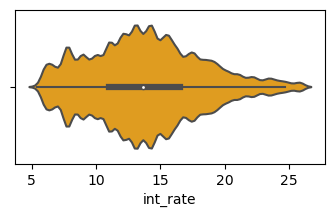

In [184]:
dist('int_rate')

we will run fine-classing `int_rate` values into 25 categorical values

In [290]:
# fine classing = 10 class
data_process['int_rate_fc'] = pd.cut(df['int_rate'], 10)

In [291]:
woe(data_process,'int_rate_fc')

int_rate_fc  num_observation  good_loan_prob  grade_proportion  \
0   (23.996, 26.06]             8846        0.758761          0.018972   
1  (21.932, 23.996]            14343        0.763787          0.030762   
2  (19.868, 21.932]            19782        0.797341          0.042427   
3    (5.399, 7.484]            27564        0.974060          0.059118   
4  (17.804, 19.868]            38003        0.815436          0.081507   
5    (7.484, 9.548]            56398        0.953190          0.120959   
6   (9.548, 11.612]            58816        0.922470          0.126145   
7   (15.74, 17.804]            60358        0.839259          0.129452   
8   (13.676, 15.74]            87614        0.875488          0.187910   
9  (11.612, 13.676]            94532        0.904011          0.202747   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0     167.829939   8678.170061        0.002628       0.021566   
1     441.220379  13901.779621        0.006909       0.034547   
2     839.297562  18942.702438        0.013143       0.047075   
3    1629.521327  25934.478673        0.025517       0.064450   
4    3097.500105  34905.499895        0.048505       0.086744   
5    6821.862676  49576.137324        0.106826       0.123202   
6    7419.361587  51396.638413        0.116182       0.127726   
7    7813.493368  52544.506632        0.122354       0.130579   
8   16463.515742  71150.484258        0.257808       0.176817   
9   19166.078343  75365.921657        0.300128       0.187293   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -2.104865                  NaN       NaN           0.273651  
1           -1.609478             0.004281  0.495387           0.273651  
2           -1.275859             0.006234  0.333619           0.273651  
3           -0.926538             0.012374  0.349322           0.273651  
4           -0.581300             0.022988  0.345238           0.273651  
5           -0.142628             0.058321  0.438672           0.273651  
6           -0.094730             0.009356  0.047897           0.273651  
7           -0.065059             0.006172  0.029671           0.273651  
8            0.377099             0.135454  0.442158           0.273651  
9            0.471536             0.042320  0.094437           0.273651

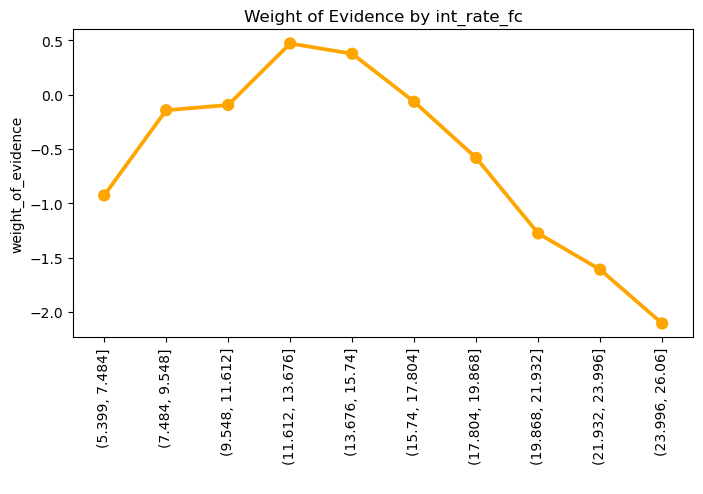

In [292]:
plot_num_woe(woe(data_process,'int_rate_fc'),90)

we will bin these values :
* `(7.484, 9.548]__ (9.548, 11.612]`
* `(11.612, 13.676]__ (13.676, 15.74]`

### WoE : `annual_inc`

In [247]:
df['annual_inc'] = df['annual_inc'].astype('int')

number of unique values : 30381
Distribution :
count    4.662560e+05
mean     7.327749e+04
std      5.496301e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895150e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


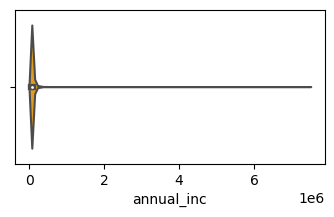

In [248]:
dist('annual_inc')

In [506]:
# fine classing = 4 class
data_process['annual_inc_fc'] = pd.cut(df['int_rate'], 4)

In [507]:
woe(data_process,'annual_inc_fc')

annual_inc_fc  num_observation  good_loan_prob  grade_proportion  \
0   (20.9, 26.06]            32268        0.767479          0.069207   
1   (15.74, 20.9]           109064        0.828138          0.233914   
2  (5.399, 10.58]           109199        0.953269          0.234204   
3  (10.58, 15.74]           215725        0.894333          0.462675   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0    2233.159089   30034.840911        0.014583       0.095919   
1   25511.641879   83552.358121        0.166601       0.266833   
2   25574.837859   83624.162141        0.167014       0.267063   
3   99810.566781  115914.433219        0.651802       0.370185   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -1.883624                  NaN       NaN           0.406703  
1           -0.471022             0.152018  1.412602           0.406703  
2           -0.469407             0.000413  0.001615           0.406703  
3            0.565738             0.484788  1.035145           0.406703

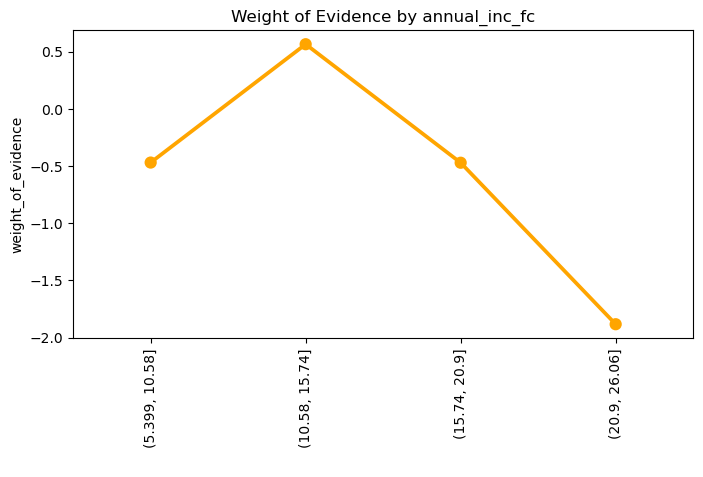

In [508]:
plot_num_woe(woe(data_process,'annual_inc_fc'),90)

we will bin `(9.548, 13.676]__ (13.676, 17.804]`

### WoE : `dti`

number of unique values : 3997
Distribution :
count    466256.000000
mean         17.219347
std           7.850929
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


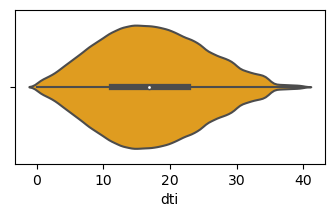

In [269]:
dist('dti')

In [274]:
# fine classing = 10 class
data_process['dti_fc'] = pd.cut(df['dti'], 10)

In [275]:
woe(data_process,'dti_fc')

dti_fc  num_observation  good_loan_prob  grade_proportion  \
0   (35.991, 39.99]             2753        0.875772          0.005904   
1  (31.992, 35.991]            13654        0.862604          0.029284   
2    (-0.04, 3.999]            16721        0.891992          0.035862   
3  (27.993, 31.992]            30288        0.861826          0.064960   
4    (3.999, 7.998]            42958        0.905629          0.092134   
5  (23.994, 27.993]            50073        0.865037          0.107394   
6   (7.998, 11.997]            69295        0.901061          0.148620   
7  (19.995, 23.994]            71058        0.869726          0.152401   
8  (15.996, 19.995]            84087        0.881456          0.180345   
9  (11.997, 15.996]            85369        0.894072          0.183095   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0      16.255038   2736.744962        0.000253       0.006808   
1     399.848401  13254.151599        0.006224       0.032969   
2     599.653068  16121.346932        0.009334       0.040101   
3    1967.509145  28320.490855        0.030627       0.070447   
4    3957.889580  39000.110420        0.061609       0.097012   
5    5377.529359  44695.470641        0.083707       0.111179   
6   10298.627846  58996.372154        0.160310       0.146752   
7   10829.328446  60228.671554        0.168571       0.149817   
8   15164.681139  68922.318861        0.236056       0.171443   
9   15630.610997  69738.389003        0.243309       0.173473   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -3.292291                  NaN       NaN           0.215758  
1           -1.667150             0.005971  1.625141           0.215758  
2           -1.457717             0.003110  0.209432           0.215758  
3           -0.832986             0.021292  0.624731           0.215758  
4           -0.454023             0.030983  0.378964           0.215758  
5           -0.283812             0.022098  0.170210           0.215758  
6            0.088366             0.076603  0.372178           0.215758  
7            0.117940             0.008261  0.029575           0.215758  
8            0.319820             0.067485  0.201880           0.215758  
9            0.338311             0.007253  0.018491           0.215758

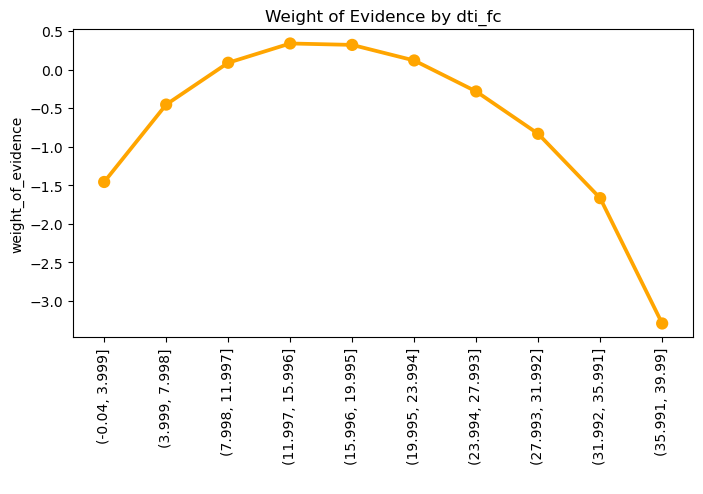

In [276]:
plot_num_woe(woe(data_process,'dti_fc'),90)

we will bin these value:
* `(7.998, 11.997]__ (11.997, 15.996]__ (15.996, 19.995]__ (19.995, 23.994]`

### WoE : `delinq_2yrs`

number of unique values : 24
Distribution :
count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


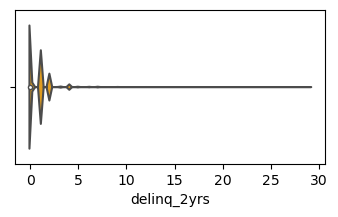

In [278]:
dist('delinq_2yrs')

In [48]:
# we will encode this feature, if values = 0 return 0, if its greater than 0 return 1, if > 5, return 2
data_process['delinq_2yrs_fc'] = np.where(data_process['delinq_2yrs'] > 3, 3,
                                 np.where(data_process['delinq_2yrs'] == 2, 2,
                                 np.where(data_process['delinq_2yrs'] == 1,1,0)))

data_process['delinq_2yrs_fc'].value_counts()

0    388638
1     56224
2     16310
3      5084
Name: delinq_2yrs_fc, dtype: int64

In [72]:
# show
woe(data_process,'delinq_2yrs_fc')

delinq_2yrs_fc  num_observation  good_loan_prob  grade_proportion  \
0               5              207        0.830918          0.000444   
1               4             1263        0.880443          0.002709   
2               3             9298        0.881157          0.019942   
3               2            16310        0.880135          0.034981   
4               1            56224        0.885654          0.120586   
5               0           382954        0.883876          0.821338   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.091900    206.908100    2.853385e-07       0.001435   
1       3.421230   1259.578770    1.062249e-05       0.008736   
2     185.419177   9112.580823    5.757034e-04       0.063202   
3     570.536572  15739.463428    1.771445e-03       0.109164   
4    6779.833774  49444.166226    2.105054e-02       0.342929   
5  314534.860926  68419.139074    9.765914e-01       0.474534   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -8.523034                  NaN       NaN           2.068203  
1           -6.712239             0.000010  1.810795           2.068203  
2           -4.698499             0.000565  2.013740           2.068203  
3           -4.121056             0.001196  0.577443           2.068203  
4           -2.790598             0.019279  1.330458           2.068203  
5            0.721736             0.955541  3.512334           2.068203

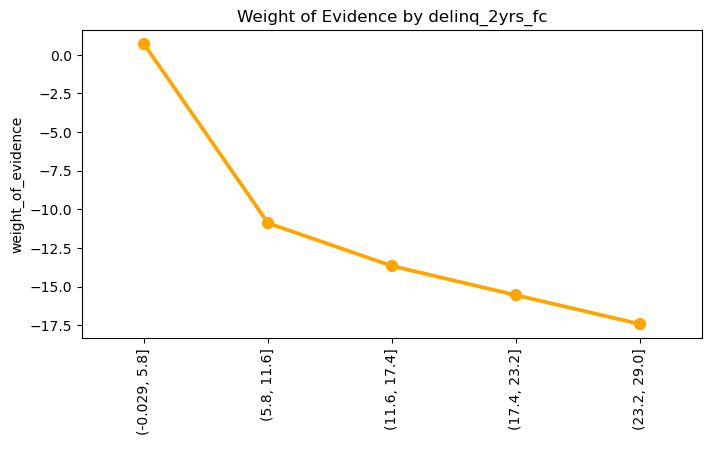

In [283]:
plot_num_woe(woe(data_process,'delinq_2yrs_fc'),90)

we will drop `delinq_2yrs_fc` because it has high information value greater than 0.5, it's considered as suspicious

### WoE : `earliest_cr_line`

number of unique values : 664
Distribution :
count    466256.000000
mean        224.491078
std          86.928944
min          55.000000
25%         166.000000
50%         208.000000
75%         267.000000
max         869.000000
Name: earliest_cr_line, dtype: float64


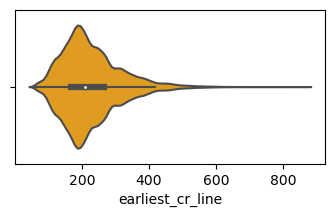

In [294]:
dist('earliest_cr_line')

In [311]:
# fine classing = 5 class
data_process['earliest_cr_line_fc'] = pd.cut(df['earliest_cr_line'], 5)

# show
woe(data_process,'earliest_cr_line_fc')

earliest_cr_line_fc  num_observation  good_loan_prob  grade_proportion  \
0      (706.2, 869.0]               35        0.857143          0.000075   
1      (543.4, 706.2]             2003        0.874189          0.004296   
2      (380.6, 543.4]            25427        0.905612          0.054534   
3      (217.8, 380.6]           181092        0.892949          0.388396   
4     (54.186, 217.8]           257699        0.875428          0.552699   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.002627      34.997373    1.226796e-08       0.000139   
1       8.604734    1994.395266    4.017890e-05       0.007911   
2    1386.646668   24040.353332    6.474800e-03       0.095362   
3   70335.421880  110756.578120    3.284238e-01       0.439344   
4  142429.855275  115269.144725    6.650612e-01       0.457244   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -9.333985                  NaN       NaN           0.392098  
1           -5.282702             0.000040  4.051283           0.392098  
2           -2.689763             0.006435  2.592938           0.392098  
3           -0.290977             0.321949  2.398786           0.392098  
4            0.374662             0.336637  0.665639           0.392098

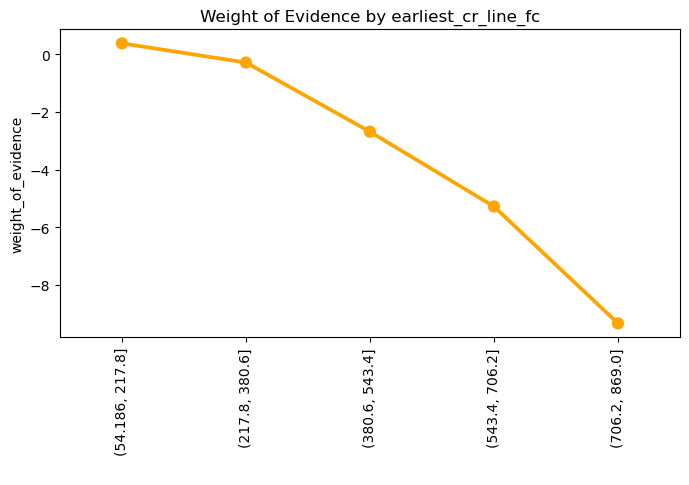

In [312]:
plot_num_woe(woe(data_process,'earliest_cr_line_fc'),90)

### WoE : `inq_last_6mths`

number of unique values : 28
Distribution :
count    466256.000000
mean          0.804745
std           1.091598
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


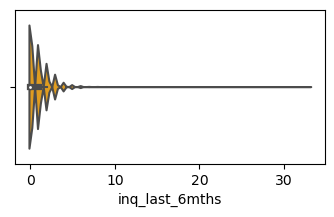

In [301]:
dist('inq_last_6mths')

In [31]:
data_process['inq_last_6mths_fc'] = np.where(data_process['inq_last_6mths'] == 0,0,
                                    np.where((data_process['inq_last_6mths'] > 0)&(data_process['inq_last_6mths'] <=3),1,
                                    np.where((data_process['inq_last_6mths']>3)&(data_process['inq_last_6mths']<=6),2,
                                    np.where((data_process['inq_last_6mths']>6)&(data_process['inq_last_6mths']<=9),3,4))))

data_process['inq_last_6mths_fc'].value_counts()

0    241498
1    213099
2     11197
3       367
4        95
Name: inq_last_6mths_fc, dtype: int64

In [32]:
# show
woe(data_process,'inq_last_6mths_fc')

inq_last_6mths_fc  num_observation  good_loan_prob  grade_proportion  \
0                  4               95        0.000000          0.000204   
1                  3              367        0.147139          0.000787   
2                  2            11197        0.737162          0.024015   
3                  1           213099        0.869033          0.457043   
4                  0           241498        0.905237          0.517952   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.019356      94.980644    8.689751e-08       0.000390   
1       0.288873     366.711127    1.296857e-06       0.001506   
2     268.892645   10928.107355    1.207156e-03       0.044878   
3   97395.387515  115703.612485    4.372431e-01       0.475155   
4  125084.254152  116413.745848    5.615484e-01       0.478071   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -8.409308                  NaN       NaN           0.188385  
1           -7.057239             0.000001  1.352069           0.188385  
2           -3.615680             0.001206  3.441560           0.188385  
3           -0.083152             0.436036  3.532528           0.188385  
4            0.160938             0.124305  0.244090           0.188385

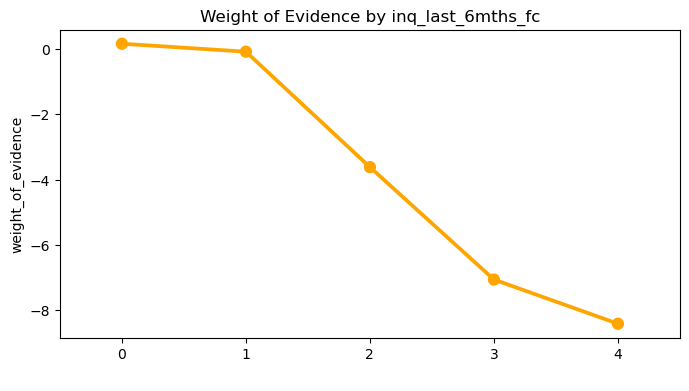

In [33]:
plot_num_woe(woe(data_process,'inq_last_6mths_fc'))

### WoE : `open_acc`

number of unique values : 62
Distribution :
count    466256.000000
mean         11.187069
std           4.987526
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


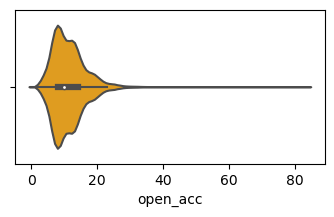

In [308]:
dist('open_acc')

In [342]:
# fine classing = 5 class
data_process['open_acc_fc'] = pd.cut(df['open_acc'], 10)

# show
woe(data_process,'open_acc_fc')

open_acc_fc  num_observation  good_loan_prob  grade_proportion  \
0   (67.2, 75.6]                1        1.000000          0.000002   
1   (58.8, 67.2]                2        1.000000          0.000004   
2   (75.6, 84.0]                3        0.333333          0.000006   
3   (50.4, 58.8]               20        1.000000          0.000043   
4   (42.0, 50.4]               81        0.901235          0.000174   
5   (33.6, 42.0]              817        0.884945          0.001752   
6   (25.2, 33.6]             5131        0.890275          0.011005   
7   (16.8, 25.2]            56491        0.886601          0.121159   
8  (-0.084, 8.4]           151903        0.881701          0.325793   
9    (8.4, 16.8]           251807        0.884427          0.540062   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000002       0.999998    1.114833e-11       0.000004   
1       0.000009       1.999991    4.459333e-11       0.000007   
2       0.000019       2.999981    1.003350e-10       0.000011   
3       0.000858      19.999142    4.459333e-09       0.000073   
4       0.014072      80.985928    7.314420e-08       0.000296   
5       1.431593     815.568407    7.441389e-06       0.002978   
6      56.465034    5074.534966    2.935039e-04       0.018529   
7    6844.379656   49646.620344    3.557692e-02       0.181276   
8   49488.953298  102414.046702    2.572424e-01       0.373947   
9  135991.312174  115815.687826    7.068796e-01       0.422880   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0          -12.699308                  NaN       NaN           0.523626  
1          -12.006158         3.344499e-11  0.693149           0.523626  
2          -11.600691         5.574166e-11  0.405467           0.523626  
3           -9.703535         4.358998e-09  1.897156           0.523626  
4           -8.304687         6.868487e-08  1.398848           0.523626  
5           -5.991917         7.368244e-06  2.312770           0.523626  
6           -4.145188         2.860625e-04  1.846729           0.523626  
7           -1.628322         3.528342e-02  2.516866           0.523626  
8           -0.374094         2.216655e-01  1.254228           0.523626  
9            0.513771         4.496372e-01  0.887865           0.523626

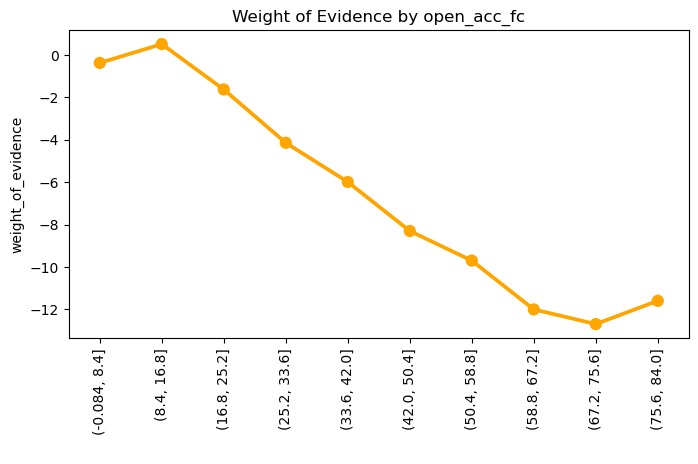

In [343]:
plot_num_woe(woe(data_process,'open_acc_fc'),90)

### WoE : `pub_rec`

number of unique values : 26
Distribution :
count    466256.000000
mean          0.160564
std           0.510863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64


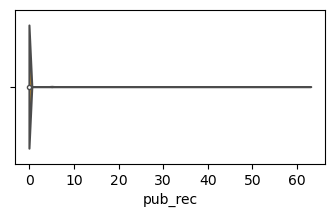

In [317]:
dist('pub_rec')

In [12]:
# fine classing = 5 class
data_process['pub_rec_fc'] = pd.cut(df['pub_rec'], 5)

# show
woe(data_process,'pub_rec_fc')

pub_rec_fc  num_observation  good_loan_prob  grade_proportion  \
0    (25.2, 37.8]                1        1.000000          0.000002   
1    (37.8, 50.4]                2        1.000000          0.000004   
2    (50.4, 63.0]                2        1.000000          0.000004   
3    (12.6, 25.2]               10        1.000000          0.000021   
4  (-0.063, 12.6]           466241        0.883869          0.999968   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000002      0.999998    4.600225e-12       0.033334   
1       0.000009      1.999991    1.840090e-11       0.066668   
2       0.000009      1.999991    1.840090e-11       0.066668   
3       0.000214      9.999786    4.600225e-10       0.333334   
4  466226.000483     14.999517    1.000000e+00       0.499996   

   weight_of_evidence  good_loan_prop_diff   diff_woe  information_value  
0          -22.703740                  NaN        NaN          10.838586  
1          -22.010591         1.380068e-11   0.693149          10.838586  
2          -22.010591         0.000000e+00   0.000000          10.838586  
3          -20.401136         4.416216e-10   1.609455          10.838586  
4            0.693155         1.000000e+00  21.094291          10.838586

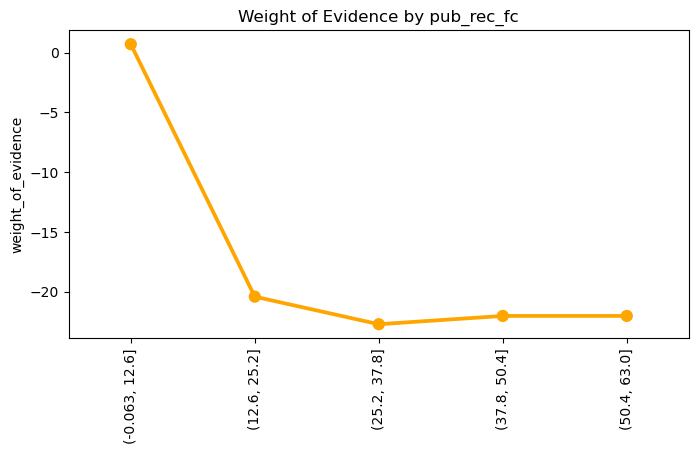

In [323]:
plot_num_woe(woe(data_process,'pub_rec_fc'),90)

we will drop `pub_rec_fc`, it's sus to have such a high information value

### WoE : `revol_bal`

number of unique values : 58142
Distribution :
count    4.662560e+05
mean     1.623121e+04
std      2.067649e+04
min      0.000000e+00
25%      6.414000e+03
50%      1.176500e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64


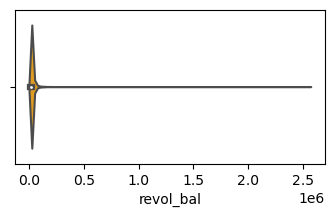

In [324]:
dist('revol_bal')

In [23]:
data_process['revol_bal_fc'] = np.where((data_process['revol_bal']>=0)&(data_process['revol_bal']<=5000),0,
                               np.where((data_process['revol_bal']>5000)&(data_process['revol_bal']<=10000),1,
                               np.where((data_process['revol_bal']>10000)&(data_process['revol_bal']<=15000),2,3)))
                               
                            
data_process['revol_bal_fc'].value_counts()

3    179353
1    115537
2     88805
0     82561
Name: revol_bal_fc, dtype: int64

In [24]:
# show
woe(data_process,'revol_bal_fc')

revol_bal_fc  num_observation  good_loan_prob  grade_proportion  \
0             0            82561        0.875547          0.177072   
1             2            88805        0.882011          0.190464   
2             1           115537        0.880480          0.247797   
3             3           179353        0.890813          0.384666   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0   14619.262210   67941.737790        0.113192       0.201547   
1   16914.158799   71890.841201        0.130961       0.213262   
2   28629.762124   86907.237876        0.221671       0.257807   
3   68991.066300  110361.933700        0.534176       0.327385   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -0.576933                  NaN       NaN           0.197806  
1           -0.487620             0.017769  0.089313           0.197806  
2           -0.151017             0.090710  0.336603           0.197806  
3            0.489589             0.312505  0.640606           0.197806

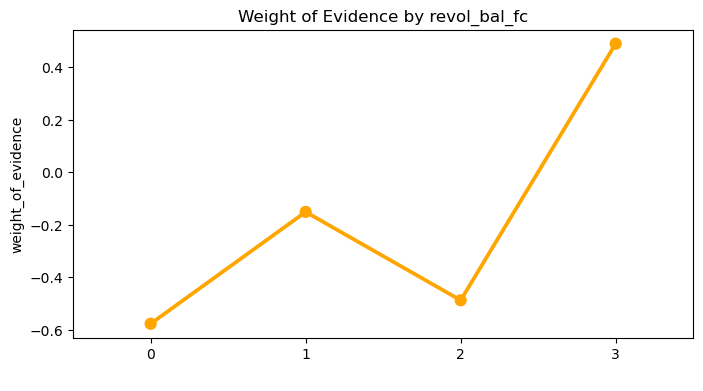

In [28]:
plot_num_woe(woe(data_process,'revol_bal_fc'))

### WoE : `revol_util`

number of unique values : 1269
Distribution :
count    466256.000000
mean         56.139477
std          23.769004
min           0.000000
25%          39.200000
50%          57.500000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


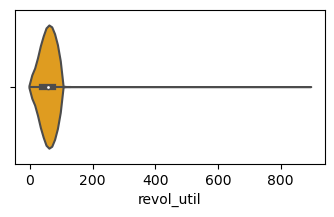

In [327]:
dist('revol_util')

In [35]:
data_process['revol_util_fc'] = np.where((data_process['revol_util']>=0)&(data_process['revol_util']<=20),0,
                                np.where((data_process['revol_util']>20)&(data_process['revol_util']<=40),1,
                                np.where((data_process['revol_util']>40)&(data_process['revol_util']<=60),2,
                                np.where((data_process['revol_util']>60)&(data_process['revol_util']<=80),3,4))))

data_process['revol_util_fc'].value_counts()

3    131592
2    129397
4     84062
1     83492
0     37713
Name: revol_util_fc, dtype: int64

In [36]:
# show
woe(data_process,'revol_util_fc')

revol_util_fc  num_observation  good_loan_prob  grade_proportion  \
0              0            37713        0.906504          0.080885   
1              1            83492        0.901679          0.179069   
2              4            84062        0.859449          0.180292   
3              2           129397        0.889541          0.277524   
4              3           131592        0.876117          0.282231   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0    3050.406577  34662.593423        0.028721       0.096272   
1   14950.829724  68541.170276        0.140771       0.190366   
2   15155.665223  68906.334777        0.142699       0.191380   
3   35910.709158  93486.290842        0.338120       0.259649   
4   37139.370783  94452.629217        0.349689       0.262333   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -1.209536                  NaN       NaN           0.156793  
1           -0.301817             0.112049  0.907718           0.156793  
2           -0.293523             0.001929  0.008294           0.156793  
3            0.264071             0.195421  0.557594           0.156793  
4            0.287430             0.011569  0.023358           0.156793

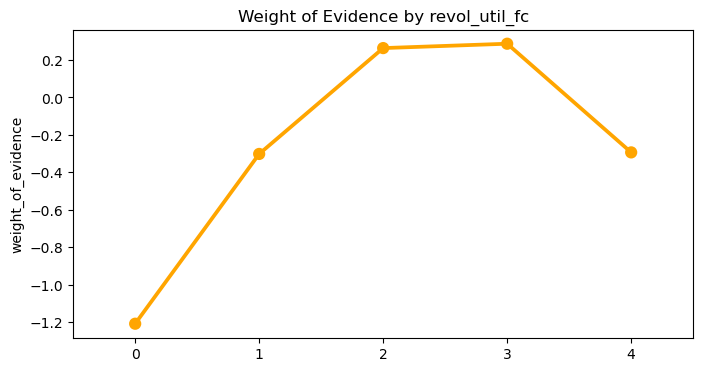

In [37]:
plot_num_woe(woe(data_process,'revol_util_fc'))

### WoE : `total_acc`

number of unique values : 112
Distribution :
count    466256.000000
mean         25.064430
std          11.600141
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


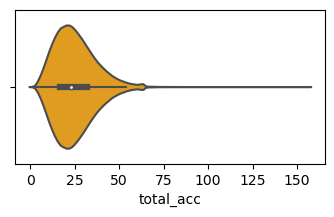

In [329]:
dist('total_acc')

In [350]:
# fine classing = 6 class
data_process['total_acc_fc'] = pd.cut(df['total_acc'], 6)

# show
woe(data_process,'total_acc_fc')

total_acc_fc  num_observation  good_loan_prob  grade_proportion  \
0    (130.167, 156.0]                2        1.000000          0.000004   
1  (104.333, 130.167]               11        1.000000          0.000024   
2     (78.5, 104.333]              204        0.897059          0.000438   
3      (52.667, 78.5]            10939        0.889844          0.023461   
4    (26.833, 52.667]           174371        0.891616          0.373981   
5     (0.845, 26.833]           280729        0.878816          0.602092   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000009       1.999991    3.658524e-11       0.000009   
1       0.000260      10.999740    1.106703e-09       0.000047   
2       0.089256     203.910744    3.806328e-07       0.000880   
3     256.643820   10682.356180    1.094463e-03       0.046092   
4   65211.483908  109159.516092    2.780958e-01       0.470996   
5  169024.680521  111704.319479    7.208094e-01       0.481976   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0          -12.371048                  NaN       NaN           0.373493  
1          -10.666281         1.070118e-09  1.704767           0.373493  
2           -7.745642         3.795261e-07  2.920639           0.373493  
3           -3.740369         1.094082e-03  4.005273           0.373493  
4           -0.526884         2.770013e-01  3.213485           0.373493  
5            0.402480         4.427136e-01  0.929364           0.373493

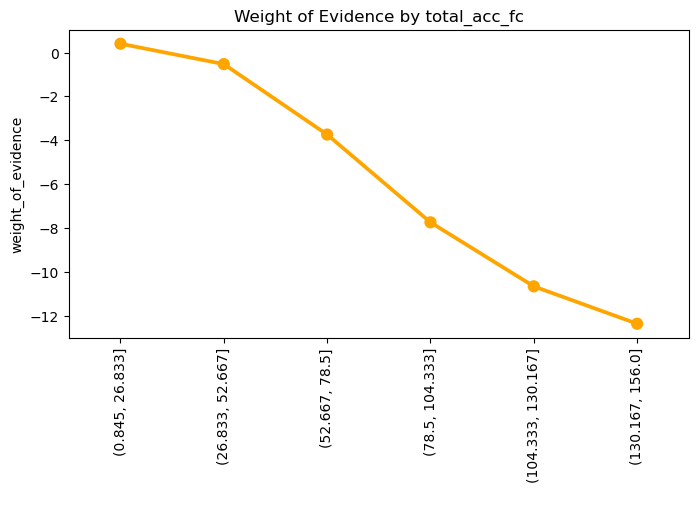

In [351]:
plot_num_woe(woe(data_process,'total_acc_fc'),90)

### WoE : `out_prncp`

number of unique values : 135665
Distribution :
count    466256.000000
mean       4410.336638
std        6355.181225
min           0.000000
25%           0.000000
50%         443.190000
75%        7341.995000
max       32160.380000
Name: out_prncp, dtype: float64


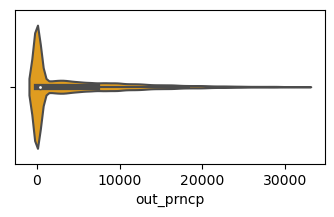

In [352]:
dist('out_prncp')

In [59]:
data_process['out_prncp_fc'] = np.where((data_process['out_prncp']>=0)&(data_process['out_prncp']<=1000),0,
                               np.where((data_process['out_prncp']>1000)&(data_process['out_prncp']<=10000),1,
                               np.where((data_process['out_prncp']>10000)&(data_process['out_prncp']<=17000),2,3)))

data_process['out_prncp_fc'].value_counts()

0    241102
1    142293
2     53928
3     28933
Name: out_prncp_fc, dtype: int64

In [60]:
# show
woe(data_process,'out_prncp_fc')

out_prncp_fc  num_observation  good_loan_prob  grade_proportion  \
0             3            28933        0.948225          0.062054   
1             2            53928        0.956887          0.115662   
2             1           142293        0.965585          0.305182   
3             0           241102        0.811594          0.517102   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0    1795.405290   27137.594710        0.010193       0.093538   
1    6237.408600   47690.591400        0.035413       0.164380   
2   43425.281067   98867.718933        0.246549       0.340778   
3  124674.372885  116427.627115        0.707844       0.401304   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -2.216619                  NaN       NaN           0.587183  
1           -1.535099             0.025220  0.681520           0.587183  
2           -0.323671             0.211136  1.211428           0.587183  
3            0.567506             0.461295  0.891176           0.587183

### WoE : `total_rec_late_fee`

number of unique values : 5806
Distribution :
count    466256.000000
mean          0.649769
std           5.262683
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


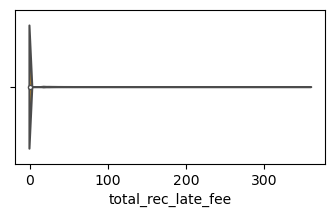

In [359]:
dist('total_rec_late_fee')

In [64]:
data_process['total_rec_late_fee_fc'] = np.where(data_process['total_rec_late_fee']==0,0,1)
data_process['total_rec_late_fee_fc'].value_counts()

0    455582
1     10674
Name: total_rec_late_fee_fc, dtype: int64

In [65]:
# show
woe(data_process,'total_rec_late_fee_fc')

total_rec_late_fee_fc  num_observation  good_loan_prob  grade_proportion  \
0                      1            10674        0.507214          0.022893   
1                      0           455582        0.892698          0.977107   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0     244.359914  10429.640086        0.000549            0.5   
1  445152.359914  10429.640086        0.999451            0.5   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -6.814931                  NaN       NaN           3.749646  
1            0.692598             0.998903   7.50753           3.749646

we will drop `total_rec_late_fee`, its sus

### WoE : `recoveries`

number of unique values : 22770
Distribution :
count    466256.000000
mean         85.337081
std         552.186700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


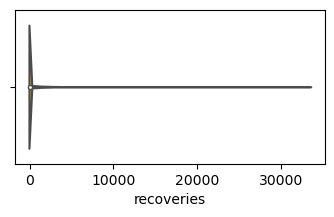

In [365]:
dist('recoveries')

In [68]:
# fine classing = 5 class
data_process['recoveries_fc'] = pd.cut(data_process['recoveries'], 5)

# show
woe(data_process,'recoveries_fc')

recoveries_fc  num_observation  good_loan_prob  grade_proportion  \
0   (26816.216, 33520.27]                5         0.00000          0.000011   
1  (20112.162, 26816.216]               13         0.00000          0.000028   
2  (13408.108, 20112.162]               45         0.00000          0.000097   
3   (6704.054, 13408.108]              315         0.00000          0.000676   
4      (-33.52, 6704.054]           465878         0.88459          0.999189   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000054      4.999946    1.151849e-10       0.006618   
1       0.000362     12.999638    7.786497e-10       0.017207   
2       0.004343     44.995657    9.329974e-09       0.059559   
3       0.212812    314.787188    4.571687e-07       0.416674   
4  465500.306450    377.693550    9.999995e-01       0.499941   

   weight_of_evidence  good_loan_prop_diff   diff_woe  information_value  
0          -17.866562                  NaN        NaN           7.407072  
1          -16.911033         6.634648e-10   0.955529           7.407072  
2          -15.669252         8.551324e-09   1.241782           7.407072  
3          -13.722762         4.478387e-07   1.946489           7.407072  
4            0.693264         9.999991e-01  14.416027           7.407072

we will drop `recoveries`, its sus

### WoE : `last_pymnt_d`

number of unique values : 98
Distribution :
count    466256.000000
mean         13.284404
std          12.796007
min           5.000000
25%           5.000000
50%           6.000000
75%          17.000000
max         102.000000
Name: last_pymnt_d, dtype: float64


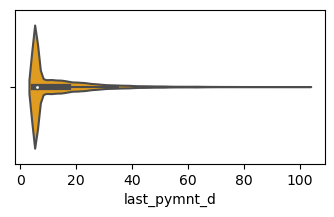

In [371]:
dist('last_pymnt_d')

In [ ]:
13,6,15,30

In [81]:
data_process['last_pymnt_d_fc'] = np.where(data_process['last_pymnt_d']==5,0,
                                  np.where((data_process['last_pymnt_d']>5)&(data_process['last_pymnt_d']<=7),1,
                                  np.where((data_process['last_pymnt_d']>7)&(data_process['last_pymnt_d']<=9),2,
                                  np.where((data_process['last_pymnt_d']>9)&(data_process['last_pymnt_d']<=15),3,4
                                  ))))

data_process['last_pymnt_d_fc'].value_counts()

0    179620
4    132015
1     71693
3     61476
2     21452
Name: last_pymnt_d_fc, dtype: int64

In [82]:
# show
woe(data_process,'last_pymnt_d_fc')

last_pymnt_d_fc  num_observation  good_loan_prob  grade_proportion  \
0                2            21452        0.793259          0.046009   
1                3            61476        0.790487          0.131850   
2                1            71693        0.940454          0.153763   
3                4           132015        0.760012          0.283138   
4                0           179620        0.995106          0.385239   

   num_good_loan   num_bad_loan  good_loan_prop  bad_loan_prop  \
0     986.986342   20465.013658        0.007790       0.060268   
1    8105.629903   53370.370097        0.063979       0.157173   
2   11023.742856   60669.257144        0.087012       0.178668   
3   37378.522153   94636.477847        0.295036       0.278700   
4   69196.631035  110423.368965        0.546182       0.325191   

   weight_of_evidence  good_loan_prop_diff  diff_woe  information_value  
0           -2.045907                  NaN       NaN           0.372593  
1           -0.898788             0.056189  1.147119           0.372593  
2           -0.719477             0.023033  0.179311           0.372593  
3            0.056962             0.208023  0.776439           0.372593  
4            0.518539             0.251146  0.461577           0.372593

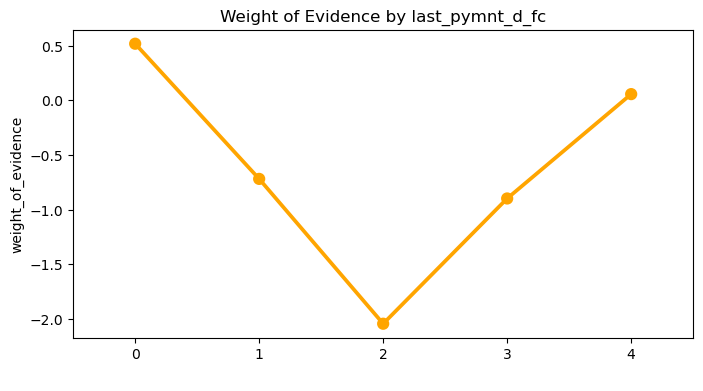

In [83]:
plot_num_woe(woe(data_process,'last_pymnt_d_fc'))

### WoE: `collections_12_mths_ex_med`

number of unique values : 9
Distribution :
count    466256.000000
mean          0.009083
std           0.108635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64


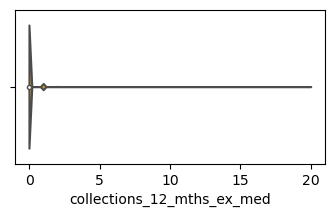

In [380]:
dist('collections_12_mths_ex_med')

In [86]:
# fine classing = 5 class
data_process['collections_12_mths_ex_med_fc'] = pd.cut(df['collections_12_mths_ex_med'], 5)

# show
woe(data_process,'collections_12_mths_ex_med_fc')

collections_12_mths_ex_med_fc  num_observation  good_loan_prob  \
0                  (12.0, 16.0]                1        1.000000   
1                  (16.0, 20.0]                1        1.000000   
2                    (4.0, 8.0]                2        1.000000   
3                  (-0.02, 4.0]           466252        0.883872   
4                   (8.0, 12.0]                0             NaN   

   grade_proportion  num_good_loan  num_bad_loan  good_loan_prop  \
0          0.000002       0.000002      0.999998    4.600008e-12   
1          0.000002       0.000002      0.999998    4.600008e-12   
2          0.000004       0.000009      1.999991    1.840003e-11   
3          0.999991  466248.000034      3.999966    1.000000e+00   
4          0.000000       0.000000      0.000000    0.000000e+00   

   bad_loan_prop  weight_of_evidence  good_loan_prop_diff   diff_woe  \
0       0.125000          -24.025525                  NaN        NaN   
1       0.125000          -24.025525         0.000000e+00   0.000000   
2       0.250000          -23.332376         1.380002e-11   0.693149   
3       0.499999            0.693150         1.000000e+00  24.025526   
4       0.000000                 NaN         1.000000e+00        NaN   

   information_value  
0          12.186083  
1          12.186083  
2          12.186083  
3          12.186083  
4          12.186083

we will drop this `collections_12_mths_ex_med`

### WoE : `acc_now_delinq`

number of unique values : 6
Distribution :
count    466256.000000
mean          0.004002
std           0.068637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64


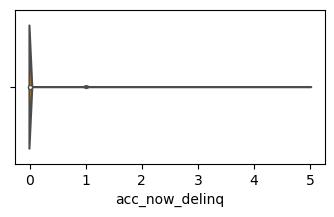

In [384]:
dist('acc_now_delinq')

In [90]:
# fine classing = 5 class
data_process['acc_now_delinq_fc'] = pd.cut(df['acc_now_delinq'], 5)

# show
woe(data_process,'acc_now_delinq_fc')

acc_now_delinq_fc  num_observation  good_loan_prob  grade_proportion  \
0        (4.0, 5.0]                2        0.500000          0.000004   
1        (3.0, 4.0]                4        1.000000          0.000009   
2        (2.0, 3.0]               11        0.818182          0.000024   
3        (1.0, 2.0]               92        0.902174          0.000197   
4     (-0.005, 1.0]           466147        0.883871          0.999766   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000009      1.999991    1.840832e-11       0.009176   
1       0.000034      3.999966    7.363329e-11       0.018352   
2       0.000260     10.999740    5.568517e-10       0.050468   
3       0.018153     91.981847    3.895201e-08       0.422020   
4  466038.025482    108.974518    1.000000e+00       0.499984   

   weight_of_evidence  good_loan_prop_diff   diff_woe  information_value  
0          -20.027068                  NaN        NaN           8.645855  
1          -19.333916         5.522496e-11   0.693151           8.645855  
2          -18.322300         4.832184e-10   1.011616           8.645855  
3          -16.198233         3.839516e-08   2.124067           8.645855  
4            0.693179         9.999999e-01  16.891413           8.645855

we will drop `acc_now_delinq`

### WoE : `tot_coll_amt`

number of unique values : 6321
Distribution :
count    4.662560e+05
mean     1.629995e+02
std      1.348331e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


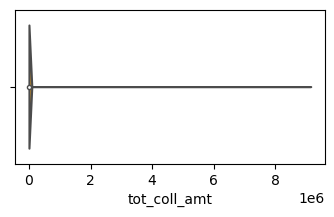

In [388]:
dist('tot_coll_amt')

In [93]:
# fine classing = 5 class
data_process['tot_coll_amt_fc'] = pd.cut(df['tot_coll_amt'], 5)

# show
woe(data_process,'tot_coll_amt_fc')

tot_coll_amt_fc  num_observation  good_loan_prob  grade_proportion  \
0  (7322036.0, 9152545.0]                1        1.000000          0.000002   
1  (-9152.545, 1830509.0]           466255        0.883873          0.999998   
2  (1830509.0, 3661018.0]                0             NaN          0.000000   
3  (3661018.0, 5491527.0]                0             NaN          0.000000   
4  (5491527.0, 7322036.0]                0             NaN          0.000000   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000002      0.999998    4.599949e-12            0.5   
1  466254.000002      0.999998    1.000000e+00            0.5   
2       0.000000      0.000000    0.000000e+00            0.0   
3       0.000000      0.000000    0.000000e+00            0.0   
4       0.000000      0.000000    0.000000e+00            0.0   

   weight_of_evidence  good_loan_prop_diff   diff_woe  information_value  
0          -25.411829                  NaN        NaN          13.052488  
1            0.693147                  1.0  26.104976          13.052488  
2                 NaN                  1.0        NaN          13.052488  
3                 NaN                  0.0        NaN          13.052488  
4                 NaN                  0.0        NaN          13.052488

we will drop `tot_coll_amt`

### WoE : `tot_cur_bal`

In [393]:
# fine classing = 5 class
data_process['tot_cur_bal_fc'] = pd.cut(df['tot_coll_amt'], 5)

# show
woe(data_process,'tot_cur_bal_fc')

tot_cur_bal_fc  num_observation  good_loan_prob  grade_proportion  \
0  (7322036.0, 9152545.0]                1        1.000000          0.000002   
1  (-9152.545, 1830509.0]           466255        0.883873          0.999998   
2  (1830509.0, 3661018.0]                0             NaN          0.000000   
3  (3661018.0, 5491527.0]                0             NaN          0.000000   
4  (5491527.0, 7322036.0]                0             NaN          0.000000   

   num_good_loan  num_bad_loan  good_loan_prop  bad_loan_prop  \
0       0.000002      0.999998    4.599949e-12            0.5   
1  466254.000002      0.999998    1.000000e+00            0.5   
2       0.000000      0.000000    0.000000e+00            0.0   
3       0.000000      0.000000    0.000000e+00            0.0   
4       0.000000      0.000000    0.000000e+00            0.0   

   weight_of_evidence  good_loan_prop_diff   diff_woe  information_value  
0          -25.411829                  NaN        NaN          13.052488  
1            0.693147                  1.0  26.104976          13.052488  
2                 NaN                  1.0        NaN          13.052488  
3                 NaN                  0.0        NaN          13.052488  
4                 NaN                  0.0        NaN          13.052488

we will drop `tot_cur_bal`

## Summary

In [95]:
print(f'for now, dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

for now, dataset contains of 466256 rows and 27 columns


### Drop List

we will drop these features :
* `verification_status`
* `purpose`
* `delinq_2yrs`
* `pub_rec`
* `total_rec_late_fee`
* `recoveries`
* `collections_12_mths_ex_med`
* `acc_now_delinq`
* `tot_coll_amt`
* `tot_cur_bal`

In [22]:
drop_list = ['verification_status', 'purpose', 'delinq_2yrs', 'pub_rec', 
             'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med', 
             'acc_now_delinq','tot_coll_amt','tot_cur_bal']

print('number of features that we will drop :',len(drop_list))

number of features that we will drop : 10


### Binning List

we will bin these features:
* `grade`
* `loan_amnt`
* `annual_inc`
* `dti`

## Feature Encoding

In [23]:
# copy data
data = df.copy()

In [24]:
# drop unused features
data = data.drop(drop_list, axis=1)
print(f'for now, dataset contains of {data.shape[0]} rows and {data.shape[1]} columns')

for now, dataset contains of 466256 rows and 17 columns


### Categorical Feature Encoding

In [25]:
cat = data.select_dtypes(include='object').columns
num = data.select_dtypes(include='number').columns
cat

Index(['grade', 'home_ownership', 'initial_list_status'], dtype='object')

In [26]:
data['home_ownership'] = np.where(data['home_ownership']=='ANY','OTHER',
                         np.where(data['home_ownership']=='NONE','OTHER',data['home_ownership']))

In [27]:
# we will drop_first later manually
cat_dummies = pd.get_dummies(data[cat])
cat_dummies.head()

grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   

   home_ownership_RENT  initial_list_status_f  initial_list_status_w  
0                    1                      1                      0  
1                    1                      1                      0  
2                    1                      1                      0  
3                    1                      1                      0  
4                    1                      1                      0

In [28]:
# binning grade A and grade D
cat_dummies['grade_AD'] = cat_dummies['grade_A'] + cat_dummies['grade_D']

# drop grade A and D, also drop grade G in exchange drop_first method
cat_dummies = cat_dummies.drop(['grade_A','grade_D','grade_G'],axis=1)

# drop one encoded feature each features in exhage drop_first method
cat_dummies = cat_dummies.drop(['home_ownership_OTHER', 'initial_list_status_w'],axis=1)

# show
cat_dummies.head(3)

grade_B  grade_C  grade_E  grade_F  home_ownership_MORTGAGE  \
0        1        0        0        0                        0   
1        0        1        0        0                        0   
2        0        1        0        0                        0   

   home_ownership_OWN  home_ownership_RENT  initial_list_status_f  grade_AD  
0                   0                    1                      1         0  
1                   0                    1                      1         0  
2                   0                    1                      1         0

In [29]:
# shift column 'grade_AD' to first position
first_column = cat_dummies.pop('grade_AD')
  
# insert column using insert(position,column_name,
# first_column) function
cat_dummies.insert(0, 'grade_AD', first_column)

In [30]:
cat_dummies.head(3)

grade_AD  grade_B  grade_C  grade_E  grade_F  home_ownership_MORTGAGE  \
0         0        1        0        0        0                        0   
1         0        0        1        0        0                        0   
2         0        0        1        0        0                        0   

   home_ownership_OWN  home_ownership_RENT  initial_list_status_f  
0                   0                    1                      1  
1                   0                    1                      1  
2                   0                    1                      1

### Numeric Feature Encoding

In [40]:
# num columns
num = data.select_dtypes(include='number').columns

# define list
manual_encoder_list = ['inq_last_6mths', 'revol_bal', 'revol_util', 'out_prncp', 'last_pymnt_d']
function_encoder_list = num.drop(manual_encoder_list)

# define dataframe for manual and auto encoding feature
num_dummies = data[function_encoder_list]
data_process = data[manual_encoder_list]

In [35]:
# make a function
def make_bins(df, feature, cut):
    df[feature] = pd.cut(df[feature],cut)
    return df

In [36]:
# loan amnt
loan_amnt = make_bins(num_dummies, 'loan_amnt',10)
loan_amnt_dum = pd.get_dummies(loan_amnt['loan_amnt'], prefix='loan_amnt')

# int_rate
int_rate = make_bins(num_dummies, 'int_rate',10)
int_rate_dum = pd.get_dummies(int_rate['int_rate'], prefix='int_rate')

# dti
dti = make_bins(num_dummies, 'dti', 10)
dti_dum = pd.get_dummies(dti['dti'], prefix='dti')

# open_acc
open_acc = make_bins(num_dummies,'open_acc',10)
open_acc_dum = pd.get_dummies(open_acc['open_acc'], prefix='open_acc')

# annual_inc
annual_inc = make_bins(num_dummies, 'annual_inc', 4)
annual_inc_dum = pd.get_dummies(annual_inc['annual_inc'], prefix='annual_inc')

# earliest_cr_line
earliest_cr_line = make_bins(num_dummies,'earliest_cr_line',5)
earliest_cr_line_dum = pd.get_dummies(earliest_cr_line['earliest_cr_line'], prefix='earliest_cr_line')

# total_acc
total_acc = make_bins(num_dummies, 'total_acc', 6)
total_acc_dum = pd.get_dummies(total_acc['total_acc'], prefix='total_acc')

### Binning Some Values On : `loan_amnt`, `annual_inc`, `dti`

we will bin these values in `loan_amnt`:
* `(10850.0, 14300.0]__ (14300.0, 17750.0]__ (17750.0, 21200.0]`
* `(21200.0, 24650.0]__ (24650.0, 28100.0]`

we will bin these value in `dti`:
* `(7.998, 11.997]__ (11.997, 15.996]__ (15.996, 19.995]__ (19.995, 23.994]`

In [37]:
# loan_amnt
loan_amnt_dum['loan_amnt_(10850.0, 21200.0]'] = sum([loan_amnt_dum['loan_amnt_(10850.0, 14300.0]'],
                                                     loan_amnt_dum['loan_amnt_(14300.0, 17750.0]'],
                                                     loan_amnt_dum['loan_amnt_(17750.0, 21200.0]']])


loan_amnt_dum['loan_amnt_(21200.0, 28100.0]'] = sum([loan_amnt_dum['loan_amnt_(21200.0, 24650.0]'],
                                                     loan_amnt_dum['loan_amnt_(24650.0, 28100.0]']])

# rename column
loan_amnt_dum.rename(columns={'loan_amnt_(465.5, 3950.0]':'loan_amnt_(500, 3950.0]'}, inplace=True)

# drop original features
loan_amnt_dum = loan_amnt_dum.drop(['loan_amnt_(10850.0, 14300.0]',
                                    'loan_amnt_(14300.0, 17750.0]',
                                    'loan_amnt_(17750.0, 21200.0]'], axis=1)

# dti
dti_dum['dti_(7.998, 23.994]'] = sum([dti_dum['dti_(7.998, 11.997]'],
                                      dti_dum['dti_(11.997, 15.996]'],
                                      dti_dum['dti_(15.996, 19.995]'],
                                      dti_dum['dti_(19.995, 23.994]']])

# rename columns
dti_dum.rename(columns={'dti_(-0.04, 3.999]':'dti_(0, 3.999]'}, inplace=True)

# drop original feature
dti_dum = dti_dum.drop(['dti_(7.998, 11.997]',
                        'dti_(11.997, 15.996]',
                        'dti_(15.996, 19.995]',
                        'dti_(19.995, 23.994]'], axis=1)

In [38]:
# show list
manual_encoder_df = data.copy()
manual_encoder_df = manual_encoder_df[manual_encoder_list]
manual_encoder_df.head(2)

inq_last_6mths  revol_bal  revol_util  out_prncp  last_pymnt_d
0             1.0      13648        83.7        0.0            17
1             5.0       1687         9.4        0.0            38

In [41]:
# inq_last_6mths
manual_encoder_df['inq_last_6mths_(0]'] = np.where(data_process['inq_last_6mths'] == 0,1,0)
manual_encoder_df['inq_last_6mths_(0, 3]'] = np.where((data_process['inq_last_6mths'] > 0)&(data_process['inq_last_6mths'] <=3),1,0)
manual_encoder_df['inq_last_6mths_(3, 6]'] = np.where((data_process['inq_last_6mths']>3)&(data_process['inq_last_6mths']<=6),1,0)
manual_encoder_df['inq_last_6mths_(6, 9]'] = np.where((data_process['inq_last_6mths']>6)&(data_process['inq_last_6mths']<=9),1,0)
manual_encoder_df['inq_last_6mths_(9, 33]'] = np.where(data_process['inq_last_6mths'] > 9,1,0)

# revol_bal
manual_encoder_df['revol_bal_(0, 5000]'] = np.where((data_process['revol_bal']>=0)&(data_process['revol_bal']<=5000),1,0)
manual_encoder_df['revol_bal_(5000, 10000]'] =   np.where((data_process['revol_bal']>5000)&(data_process['revol_bal']<=10000),1,0)
manual_encoder_df['revol_bal_(10000, 15000]'] = np.where((data_process['revol_bal']>10000)&(data_process['revol_bal']<=15000),1,0)
manual_encoder_df['revol_bal_(15000, 250000]'] = np.where(data_process['revol_bal']>15000,1,0)

# revol_util
manual_encoder_df['revol_util_(0, 20]'] = np.where((data_process['revol_util']>=0)&(data_process['revol_util']<=20),1,0)
manual_encoder_df['revol_util_(20, 40]'] = np.where((data_process['revol_util']>20)&(data_process['revol_util']<=40),1,0)
manual_encoder_df['revol_util_(40, 60]'] = np.where((data_process['revol_util']>40)&(data_process['revol_util']<=60),1,0)
manual_encoder_df['revol_util_(60, 80]'] = np.where((data_process['revol_util']>60)&(data_process['revol_util']<=80),1,0)
manual_encoder_df['revol_util_(80, 892]'] = np.where(data_process['revol_util']>80,1,0)

# out_prncp
manual_encoder_df['out_prncp_(0, 1000]'] = np.where((data_process['out_prncp']>=0)&(data_process['out_prncp']<=1000),1,0)
manual_encoder_df['out_prncp_(1000, 10000]'] = np.where((data_process['out_prncp']>=1000)&(data_process['out_prncp']<=10000),1,0)
manual_encoder_df['out_prncp_(10000, 17000]'] = np.where((data_process['out_prncp']>=10000)&(data_process['out_prncp']<=17000),1,0)
manual_encoder_df['out_prncp_(17000, 32160]'] = np.where(data_process['out_prncp']>17000,1,0)

# last_pymnt_d
manual_encoder_df['last_pymnt_d_(5]'] = np.where(data_process['last_pymnt_d']==5,1,0)
manual_encoder_df['last_pymnt_d_(5, 7]'] = np.where((data_process['last_pymnt_d']>5)&(data_process['last_pymnt_d']<=7),1,0)
manual_encoder_df['last_pymnt_d_(7, 9]'] = np.where((data_process['last_pymnt_d']>7)&(data_process['last_pymnt_d']<=9),1,0)
manual_encoder_df['last_pymnt_d_(9, 15]'] = np.where((data_process['last_pymnt_d']>9)&(data_process['last_pymnt_d']<=15),1,0)
manual_encoder_df['last_pymnt_d_(15, 102]'] = np.where(data_process['last_pymnt_d']>15,1,0)

# drop original feature
manual_encoder_df = manual_encoder_df.drop(manual_encoder_list, axis=1)

# show
manual_encoder_df.head()

inq_last_6mths_(0]  inq_last_6mths_(0, 3]  inq_last_6mths_(3, 6]  \
0                   0                      1                      0   
1                   0                      0                      1   
2                   0                      1                      0   
3                   0                      1                      0   
4                   1                      0                      0   

   inq_last_6mths_(6, 9]  inq_last_6mths_(9, 33]  revol_bal_(0, 5000]  \
0                      0                       0                    0   
1                      0                       0                    1   
2                      0                       0                    1   
3                      0                       0                    0   
4                      0                       0                    0   

   revol_bal_(5000, 10000]  revol_bal_(10000, 15000]  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        1                         0   
4                        0                         0   

   revol_bal_(15000, 250000]  revol_util_(0, 20]  revol_util_(20, 40]  \
0                          0                   0                    0   
1                          0                   1                    0   
2                          0                   0                    0   
3                          0                   0                    1   
4                          1                   0                    0   

   revol_util_(40, 60]  revol_util_(60, 80]  revol_util_(80, 892]  \
0                    0                    0                     1   
1                    0                    0                     0   
2                    0                    0                     1   
3                    0                    0                     0   
4                    1                    0                     0   

   out_prncp_(0, 1000]  out_prncp_(1000, 10000]  out_prncp_(10000, 17000]  \
0                    1                        0                         0   
1                    1                        0                         0   
2                    1                        0                         0   
3                    1                        0                         0   
4                    1                        0                         0   

   out_prncp_(17000, 32160]  last_pymnt_d_(5]  last_pymnt_d_(5, 7]  \
0                         0                 0                    0   
1                         0                 0                    0   
2                         0                 0                    0   
3                         0                 0                    0   
4                         0                 1                    0   

   last_pymnt_d_(7, 9]  last_pymnt_d_(9, 15]  last_pymnt_d_(15, 102]  
0                    0                     0                       1  
1                    0                     0                       1  
2                    0                     0                       1  
3                    0                     0                       1  
4                    0                     0                       0

### Concat Numeric and Categorical Encoded Features

In [43]:
encoded = pd.concat([cat_dummies, loan_amnt_dum,int_rate_dum,dti_dum,open_acc_dum,annual_inc_dum,
                     earliest_cr_line_dum,total_acc_dum,manual_encoder_df,num_dummies['term'],
                     num_dummies['loan_status']],axis=1)

# feature engineering on term feature
encoded['term'] = np.where(encoded['term']==36,0,1)

encoded.head(3)

grade_AD  grade_B  grade_C  grade_E  grade_F  home_ownership_MORTGAGE  \
0         0        1        0        0        0                        0   
1         0        0        1        0        0                        0   
2         0        0        1        0        0                        0   

   home_ownership_OWN  home_ownership_RENT  initial_list_status_f  \
0                   0                    1                      1   
1                   0                    1                      1   
2                   0                    1                      1   

   loan_amnt_(500, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                        0                           1   
1                        1                           0   
2                        1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(21200.0, 24650.0]  \
0                            0                             0   
1                            0                             0   
2                            0                             0   

   loan_amnt_(24650.0, 28100.0]  loan_amnt_(28100.0, 31550.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   

   loan_amnt_(31550.0, 35000.0]  loan_amnt_(10850.0, 21200.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   

   loan_amnt_(21200.0, 28100.0]  int_rate_(5.399, 7.484]  \
0                             0                        0   
1                             0                        0   
2                             0                        0   

   int_rate_(7.484, 9.548]  int_rate_(9.548, 11.612]  \
0                        0                         1   
1                        0                         0   
2                        0                         0   

   int_rate_(11.612, 13.676]  int_rate_(13.676, 15.74]  \
0                          0                         0   
1                          0                         1   
2                          0                         0   

   int_rate_(15.74, 17.804]  int_rate_(17.804, 19.868]  \
0                         0                          0   
1                         0                          0   
2                         1                          0   

   int_rate_(19.868, 21.932]  int_rate_(21.932, 23.996]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   

   int_rate_(23.996, 26.06]  dti_(0, 3.999]  dti_(3.999, 7.998]  \
0                         0               0                   0   
1                         0               1                   0   
2                         0               0                   0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   dti_(35.991, 39.99]  dti_(7.998, 23.994]  open_acc_(-0.084, 8.4]  \
0                    0                    0                       1   
1                    0                    0                       1   
2                    0                    1                       1   

   open_acc_(8.4, 16.8]  open_acc_(16.8, 25.2]  open_acc_(25.2, 33.6]  \
0                     0                      0                      0   
1                     0                      0                      0   
2                     0                      0                      0   

   open_acc_(33.6, 42.0]  open_acc_(42.0, 50.4]  open_acc_(50.4, 58.8]  \
0                      0          

In [2]:
#encoded.to_csv('encoded_bf_modeling.csv')
data = pd.read_csv('encoded_bf_modeling.csv', index_col=0)

In [3]:
data.shape

(466256, 85)

# Modeling

In [48]:
print(f'this encoded dataset contains of {data.shape[0]} rows and {data.shape[1]} columns')

this encoded dataset contains of 466256 rows and 85 columns


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data.drop('loan_status', axis=1),
                                                    data['loan_status'],
                                                    test_size=0.3,
                                                    random_state=123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((326379, 84), (139877, 84), (326379,), (139877,))

## Handling Imbalanced Target

In [130]:
data['loan_status'].value_counts()/len(data)*100

1    88.387281
0    11.612719
Name: loan_status, dtype: float64

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

In [51]:
x_smote.shape, x_test.shape, y_smote.shape, y_train.shape

((576820, 84), (139877, 84), (576820,), (326379,))

## Model Training & Evaluation

In [8]:
# train model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(x_smote, y_smote)

LogisticRegression()

In [9]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

# let's get the predictions
y_pred_proba_train = lr.predict_proba(x_train)[:][:,1]
y_pred_proba_test = lr.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_pred_proba_train))
print('AUC Test Proba :', roc_auc_score(y_test, y_pred_proba_test))

AUC Train Proba : 0.8476991959708683
AUC Test Proba : 0.8483077976200086


### Hyperparameter

In [54]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(x_smote,y_smote)

# best hyperparameters
search_lr.best_params_

{'penalty': 'none', 'C': 0.3648648648648649}

In [10]:
best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(x_smote,y_smote)

y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.8478637467292561
AUC Test Proba : 0.8484270007708434


### Find Pvalues Using StatsModel

In [11]:
import statsmodels.api as sm

X2 = sm.add_constant(x_smote)
est = sm.OLS(y_smote, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.311e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:23:11   Log-Likelihood:            -1.1291e+05
No. Observations:              576820   AIC:                         2.260e+05
Df Residuals:                  576736   BIC:                         2.269e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### Feature Selection Using P-Value

`annual_inc` has high p-value, we will drop it

In [12]:
drop_list = ['annual_inc_(-5602.104, 1876422.0]', 'annual_inc_(1876422.0, 3750948.0]',
             'annual_inc_(3750948.0, 5625474.0]', 'annual_inc_(5625474.0, 7500000.0]']

x_smote = x_smote.drop(drop_list ,axis=1)
x_train = x_train.drop(drop_list ,axis=1)
x_test = x_test.drop(drop_list ,axis=1)

### Re train model

In [15]:
param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(x_smote,y_smote)

# best hyperparameters
search_lr.best_params_

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(x_smote,y_smote)

y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.8479647990030726
AUC Test Proba : 0.8486847950009256


In [16]:
X2 = sm.add_constant(x_smote)
est = sm.OLS(y_smote, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:30:06   Log-Likelihood:            -1.1291e+05
No. Observations:              576820   AIC:                         2.260e+05
Df Residuals:                  576739   BIC:                         2.269e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Still there's few feature (binned features) that consist of pvalue > 0.05, but majority all those features have pvalue <0.05

In [71]:
# classification report
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.50      0.28      0.35     16176
           1       0.91      0.96      0.94    123701

    accuracy                           0.88    139877
   macro avg       0.70      0.62      0.65    139877
weighted avg       0.86      0.88      0.87    139877



<AxesSubplot:>

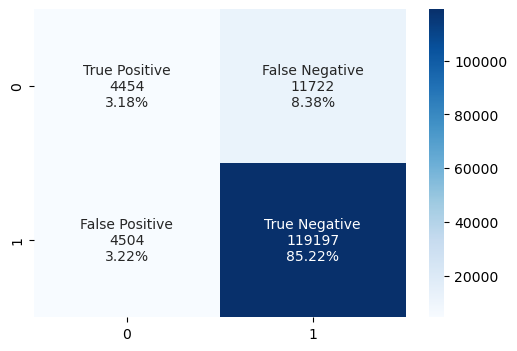

In [149]:
cf_matrix = confusion_matrix(y_test, y_pred_class)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### ROC AUC Plot

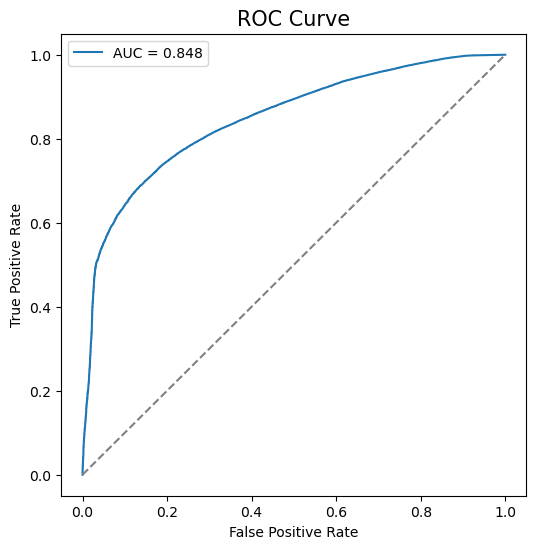

In [150]:
fpr, tpr, tr = roc_curve(y_test, y_pred_proba_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

### Kolmogorov-Smirnov

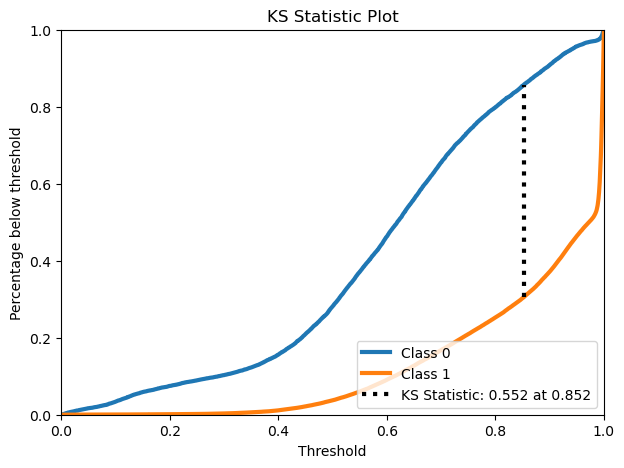

In [151]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(x_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

`KS Statistic: 0.552`

## Feature Importance

### Top 10 Important Features

In [17]:
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])
        
# show top 5 highest odd ratio
df_importance.iloc[1:,:].sort_values(by='odds_ratio', ascending=False).head(5)

coef  std err        t  P>|t|  [0.025  0.975]  \
last_pymnt_d_(5]              0.6713    0.002  282.352    0.0   0.667   0.676   
last_pymnt_d_(5, 7]           0.5615    0.002  239.754    0.0   0.557   0.566   
total_acc_(104.333, 130.167]  0.4971    0.124    4.012    0.0   0.254   0.740   
int_rate_(5.399, 7.484]       0.4693    0.003  167.814    0.0   0.464   0.475   
int_rate_(7.484, 9.548]       0.4224    0.002  190.564    0.0   0.418   0.427   

                              odds_ratio  
last_pymnt_d_(5]                1.956779  
last_pymnt_d_(5, 7]             1.753300  
total_acc_(104.333, 130.167]    1.643947  
int_rate_(5.399, 7.484]         1.598875  
int_rate_(7.484, 9.548]         1.525619

### Insights

* `last_pymnt_d_(5]` : Borrowers who made the last payment in the **past 5 months**, their odds of being good loan borrowers will **increase by 1.9 times**
* `last_pymnt_d_(5, 7]` : Borrowers who made the last payment in the **past 5-7 months**, their odds of being good loan borrowers will **increase by 1.7 times**
* `int_rate_(5.399, 7.484]`: Borrowers with an **interest rate of 5.3%-7.4%**, their odds of being good loan borrowers will **increase by 1.5 times**
* Etc

# Business Insights

In [68]:
bi = pd.read_csv('data_bersih_sebelum_woe.csv', index_col=0)
bi.head()

loan_amnt  term  int_rate grade home_ownership  annual_inc  \
0       5000    36     10.65     B           RENT     24000.0   
1       2500    60     15.27     C           RENT     30000.0   
2       2400    36     15.96     C           RENT     12252.0   
3      10000    36     13.49     C           RENT     49200.0   
4       3000    60     12.69     B           RENT     80000.0   

  verification_status  loan_status         purpose    dti  delinq_2yrs  \
0            Verified            1     credit_card  27.65          0.0   
1     Source Verified            0             car   1.00          0.0   
2        Not Verified            1  small_business   8.72          0.0   
3     Source Verified            1           other  20.00          0.0   
4     Source Verified            1           other  17.94          0.0   

   earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0             377.0             1.0       3.0      0.0      13648        83.7   
1             206.0             5.0       3.0      0.0       1687         9.4   
2             175.0             2.0       2.0      0.0       2956        98.5   
3             244.0             1.0      10.0      0.0       5598        21.0   
4             245.0             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        9.0                   f        0.0                0.00        0.00   
1        4.0                   f        0.0                0.00      117.08   
2       10.0                   f        0.0                0.00        0.00   
3       37.0                   f        0.0               16.97        0.00   
4       38.0                   f      766.9                0.00        0.00   

   last_pymnt_d  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0            17                         0.0             0.0           0.0   
1            38                         0.0             0.0           0.0   
2            24                         0.0             0.0           0.0   
3            17                         0.0             0.0           0.0   
4             5                         0.0             0.0           0.0   

   tot_cur_bal  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [69]:
bi['loan_status_fc'] = np.where(bi['loan_status']==1,'good_loan','bad_loan')
bi['loan_status_fc'].value_counts()

good_loan    412111
bad_loan      54145
Name: loan_status_fc, dtype: int64

## `last_pymnt_d`

In [4]:
bi['last_pymnt_d_fc'] = np.where(bi['last_pymnt_d']==5,'5 Months',
                        np.where((bi['last_pymnt_d']>5)&(bi['last_pymnt_d']<=7),'5-7 Months',
                        np.where((bi['last_pymnt_d']>7)&(bi['last_pymnt_d']<=9),'7-9 Months',
                        np.where((bi['last_pymnt_d']>9)&(bi['last_pymnt_d']<=15),'9-15 Month','>15 Month'
                                  ))))

bi['last_pymnt_d_fc'].value_counts()

5 Months      179620
>15 Month     132015
5-7 Months     71693
9-15 Month     61476
7-9 Months     21452
Name: last_pymnt_d_fc, dtype: int64

In [5]:
abc = bi.groupby(['last_pymnt_d_fc','loan_status_fc']).agg(num_cust=('loan_status','count'))
                                                       
abc['loan_status_prop'] = abc['num_cust']/bi.groupby('last_pymnt_d_fc')['loan_status'].count()
abc = abc.reset_index()
abc['loan_status_prop'] = round(abc['loan_status_prop']*100,2)
abc

last_pymnt_d_fc loan_status_fc  num_cust  loan_status_prop
0        5 Months       bad_loan       879              0.49
1        5 Months      good_loan    178741             99.51
2      5-7 Months       bad_loan      4269              5.95
3      5-7 Months      good_loan     67424             94.05
4      7-9 Months       bad_loan      4435             20.67
5      7-9 Months      good_loan     17017             79.33
6      9-15 Month       bad_loan     12880             20.95
7      9-15 Month      good_loan     48596             79.05
8       >15 Month       bad_loan     31682             24.00
9       >15 Month      good_loan    100333             76.00

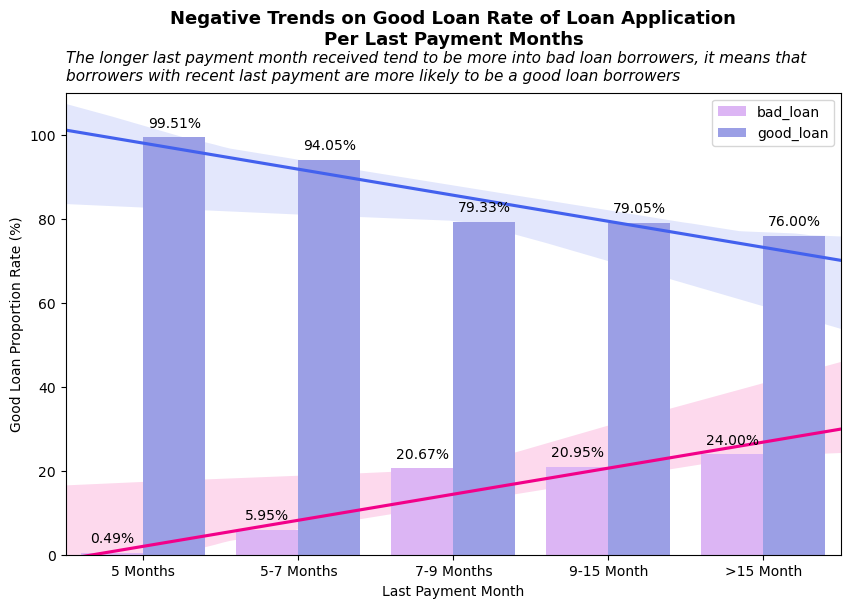

In [44]:
order_list = ['5 Months', '5-7 Months', '7-9 Months', '9-15 Month', '>15 Month']
pal = ['#deaaff', '#8e94f2']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='last_pymnt_d_fc', y='loan_status_prop', hue='loan_status_fc', 
            data=abc, palette=pal, order=order_list)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

sns.regplot(x=np.arange(0, len(abc[abc['loan_status_fc'] == 'bad_loan'])), y='loan_status_prop', color='#4361ee',
            data=abc[abc['loan_status_fc'] == 'good_loan'], scatter=False, truncate=False)

sns.regplot(x=np.arange(0, len(abc[abc['loan_status_fc'] == 'bad_loan'])), y='loan_status_prop', color='#f20089',
            data=abc[abc['loan_status_fc'] == 'bad_loan'], scatter=False, truncate=False)

plt.ylim(0,110)

plt.legend(loc='upper right')
plt.title('Negative Trends on Good Loan Rate of Loan Application\nPer Last Payment Months', pad=35, 
          fontsize=13, weight='extra bold')
plt.text(x=-0.5, y=113, 
         s='The longer last payment month received tend to be more into bad loan borrowers, it means that \nborrowers with recent last payment are more likely to be a good loan borrowers',
         fontstyle='italic', fontsize=11)

plt.ylabel('Good Loan Proportion Rate (%)', fontsize=10)
plt.xlabel('Last Payment Month', fontsize=10)

#plt.savefig('fig/figure11.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

In [7]:
# feature engineer home ownership feature
bi['home_ownership_fc'] = np.where(bi['home_ownership']=='ANY','OTHER',
                          np.where(bi['home_ownership']=='NONE','OTHER',bi['home_ownership']))

bi['home_ownership_fc'].value_counts()

MORTGAGE    235868
RENT        188456
OWN          41703
OTHER          229
Name: home_ownership_fc, dtype: int64

In [8]:
# because 'other' vales is too small compared to other, we will considered it as MORTGAGE (most values)
bi['home_ownership_fc'] = np.where(bi['home_ownership_fc']=='OTHER','MORTGAGE',bi['home_ownership_fc'])
bi['home_ownership_fc'].value_counts()

MORTGAGE    236097
RENT        188456
OWN          41703
Name: home_ownership_fc, dtype: int64

In [14]:
# create new dataset
df_sum = bi.groupby(['home_ownership_fc', 'last_pymnt_d_fc']).agg(num_good_loan=('loan_status','sum'),
                                                                  num_cust=('loan_status','count')).reset_index()

df_sum['good_borrower_prop'] = df_sum['num_good_loan']/df_sum['num_cust']
df_sum['bad_borrower_prop'] = (df_sum['num_cust']-df_sum['num_good_loan'])/df_sum['num_cust']
df_sum['bad_borrower_prop_pctg'] = round(df_sum['bad_borrower_prop']*100,2)
df_sum

home_ownership_fc last_pymnt_d_fc  num_good_loan  num_cust  \
0           MORTGAGE        5 Months          93255     93693   
1           MORTGAGE      5-7 Months          35072     37010   
2           MORTGAGE      7-9 Months           8762     10787   
3           MORTGAGE      9-15 Month          24821     30667   
4           MORTGAGE       >15 Month          49966     63940   
5                OWN        5 Months          16865     16945   
6                OWN      5-7 Months           6359      6785   
7                OWN      7-9 Months           1458      1872   
8                OWN      9-15 Month           4142      5349   
9                OWN       >15 Month           8099     10752   
10              RENT        5 Months          68621     68982   
11              RENT      5-7 Months          25993     27898   
12              RENT      7-9 Months           6797      8793   
13              RENT      9-15 Month          19633     25460   
14              RENT       >15 Month          42268     57323   

    good_borrower_prop  bad_borrower_prop  bad_borrower_prop_pctg  
0             0.995325           0.004675                    0.47  
1             0.947636           0.052364                    5.24  
2             0.812274           0.187726                   18.77  
3             0.809372           0.190628                   19.06  
4             0.781451           0.218549                   21.85  
5             0.995279           0.004721                    0.47  
6             0.937214           0.062786                    6.28  
7             0.778846           0.221154                   22.12  
8             0.774350           0.225650                   22.56  
9             0.753255           0.246745                   24.67  
10            0.994767           0.005233                    0.52  
11            0.931716           0.068284                    6.83  
12            0.773001           0.226999                   22.70  
13            0.771131           0.228869                   22.89  
14            0.737365           0.262635                   26.26

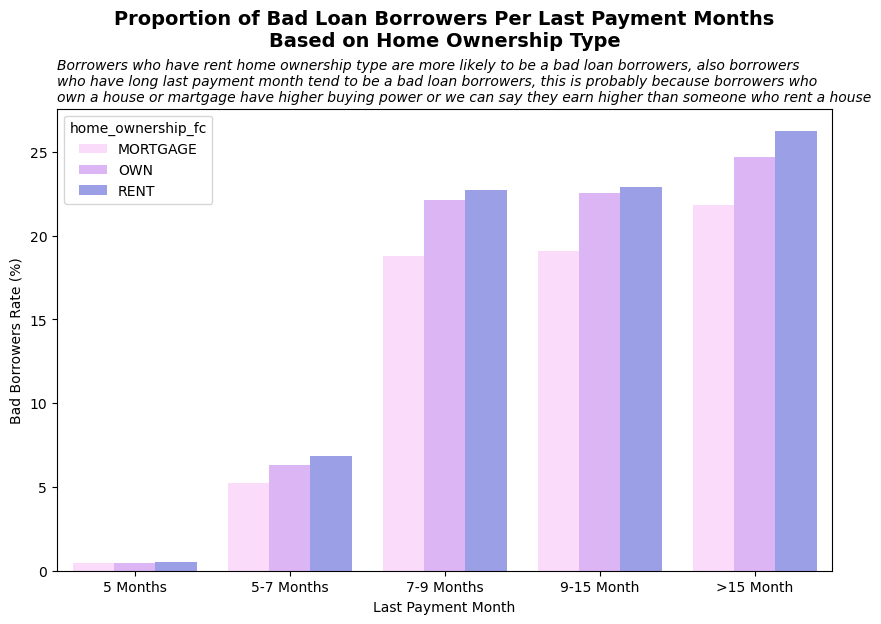

In [46]:
pal = ['#ffd6ff', '#deaaff', '#8e94f2']

plt.figure(figsize=(10,6))
sns.barplot(x='last_pymnt_d_fc', y='bad_borrower_prop_pctg', data=df_sum, 
            hue='home_ownership_fc', palette=pal)

plt.title('Proportion of Bad Loan Borrowers Per Last Payment Months\nBased on Home Ownership Type',
          fontsize=14, weight='extra bold', pad=45)
plt.text(x=-0.5, y=28, s='Borrowers who have rent home ownership type are more likely to be a bad loan borrowers, also borrowers \nwho have long last payment month tend to be a bad loan borrowers, this is probably because borrowers who \nown a house or martgage have higher buying power or we can say they earn higher than someone who rent a house',
         fontstyle='italic', fontsize=10)

plt.ylabel('Bad Borrowers Rate (%)')
plt.xlabel('Last Payment Month')

#plt.savefig('fig/figure22.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `total_acc`

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

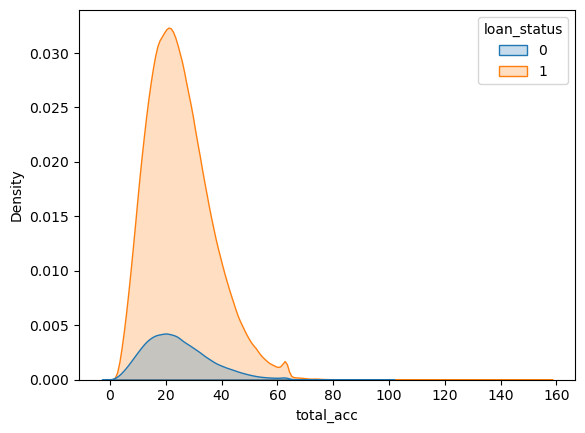

In [187]:
sns.kdeplot(x='total_acc', hue='loan_status', data=bi, shade=True)

In [189]:
bi['total_acc'].describe()

count    466256.000000
mean         25.064430
std          11.600141
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

In [190]:
# fine classing = 6 class
bi['total_acc_fc'] = pd.cut(bi['total_acc'], 6)
bi['total_acc_fc'].value_counts().sort_index()

(0.845, 26.833]       280729
(26.833, 52.667]      174371
(52.667, 78.5]         10939
(78.5, 104.333]          204
(104.333, 130.167]        11
(130.167, 156.0]           2
Name: total_acc_fc, dtype: int64

In [190]:
# rename values
bi['total_acc_fc'] = np.where((bi['total_acc']>=1)&(bi['total_acc']<=26),'1-26',
                     np.where((bi['total_acc']>26)&(bi['total_acc']<=52),'26-52',
                     np.where((bi['total_acc']>52)&(bi['total_acc']<=78),'52-78','78-156')))

bi['total_acc_fc'].value_counts()

1-26      280729
26-52     174371
52-78      10939
78-156       217
Name: total_acc_fc, dtype: int64

In [191]:
acb = bi.groupby(['total_acc_fc','loan_status_fc']).agg(num_cust=('loan_status','count'))
acb['loan_status_prop'] = acb['num_cust']/bi.groupby('total_acc_fc')['loan_status'].count()
acb = acb.reset_index()
acb['loan_status_prop'] = round(acb['loan_status_prop']*100,2)
acb

total_acc_fc loan_status_fc  num_cust  loan_status_prop
0         1-26       bad_loan     34020             12.12
1         1-26      good_loan    246709             87.88
2        26-52       bad_loan     18899             10.84
3        26-52      good_loan    155472             89.16
4        52-78       bad_loan      1205             11.02
5        52-78      good_loan      9734             88.98
6       78-156       bad_loan        21              9.68
7       78-156      good_loan       196             90.32

In [204]:
# create new dataset
df_acc = bi.groupby(['total_acc_fc', 'last_pymnt_d_fc']).agg(num_good_loan=('loan_status','sum'),
                                                                  num_cust=('loan_status','count')).reset_index()

df_acc['good_borrower_prop'] = df_acc['num_good_loan']/df_acc['num_cust']
df_acc['bad_borrower_prop'] = (df_acc['num_cust']-df_acc['num_good_loan'])/df_acc['num_cust']
df_acc['bad_borrower_prop_pctg'] = round(df_acc['bad_borrower_prop']*100,2)
df_acc

total_acc_fc last_pymnt_d_fc  num_good_loan  num_cust  good_borrower_prop  \
0          1-26        5 Months         106242    106732            0.995409   
1          1-26      5-7 Months          39842     42406            0.939537   
2          1-26      7-9 Months          10334     13048            0.791999   
3          1-26      9-15 Month          28584     36247            0.788589   
4          1-26       >15 Month          61707     82296            0.749818   
5         26-52        5 Months          68234     68591            0.994795   
6         26-52      5-7 Months          25918     27488            0.942884   
7         26-52      7-9 Months           6256      7867            0.795221   
8         26-52      9-15 Month          18735     23622            0.793117   
9         26-52       >15 Month          36329     46803            0.776211   
10        52-78        5 Months           4150      4181            0.992586   
11        52-78      5-7 Months           1626      1759            0.924389   
12        52-78      7-9 Months            425       532            0.798872   
13        52-78      9-15 Month           1257      1575            0.798095   
14        52-78       >15 Month           2276      2892            0.786999   
15       78-156        5 Months            115       116            0.991379   
16       78-156      5-7 Months             38        40            0.950000   
17       78-156      7-9 Months              2         5            0.400000   
18       78-156      9-15 Month             20        32            0.625000   
19       78-156       >15 Month             21        24            0.875000   

    bad_borrower_prop  bad_borrower_prop_pctg  
0            0.004591                    0.46  
1            0.060463                    6.05  
2            0.208001                   20.80  
3            0.211411                   21.14  
4            0.250182                   25.02  
5            0.005205                    0.52  
6            0.057116                    5.71  
7            0.204779                   20.48  
8            0.206883                   20.69  
9            0.223789                   22.38  
10           0.007414                    0.74  
11           0.075611                    7.56  
12           0.201128                   20.11  
13           0.201905                   20.19  
14           0.213001                   21.30  
15           0.008621                    0.86  
16           0.050000                    5.00  
17           0.600000                   60.00  
18           0.375000                   37.50  
19           0.125000                   12.50

Text(0.5, 1.0, 'Proportion of Bad Loan Borrowers Per Credit Lines \nBased on Last Payment Month')

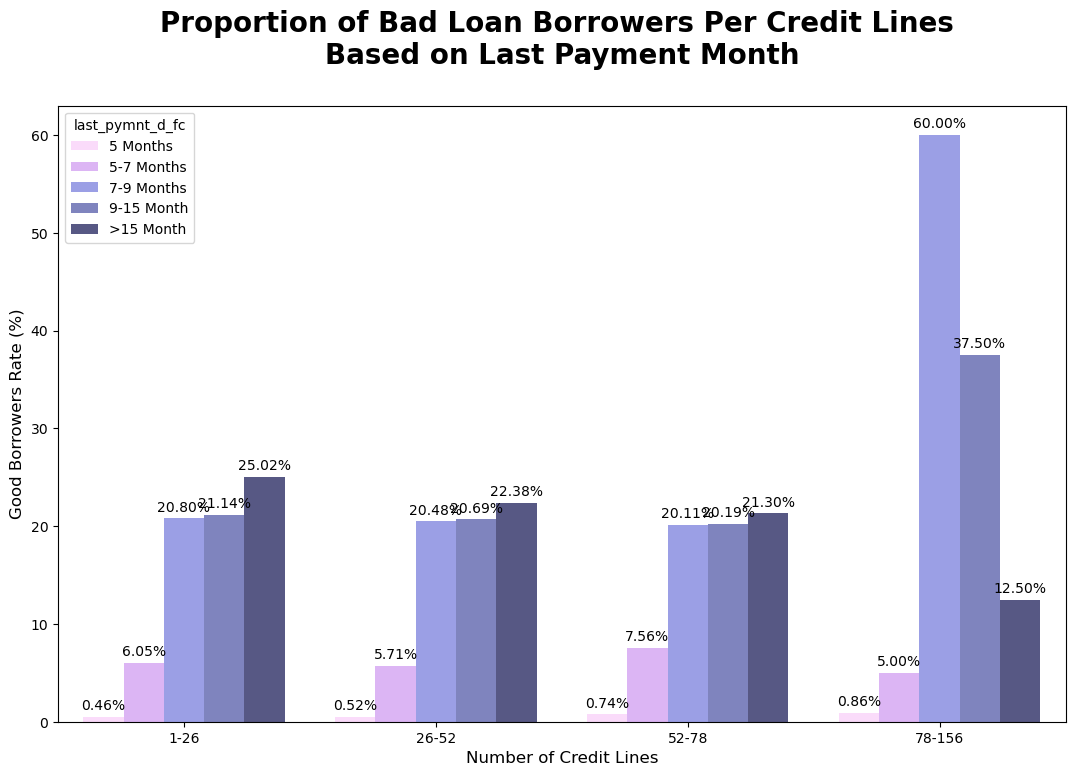

In [205]:
pal = ['#ffd6ff', '#deaaff', '#8e94f2' ,'#757bc8', '#4f518c']

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(x='total_acc_fc', y='bad_borrower_prop_pctg', data=df_acc, 
            hue='last_pymnt_d_fc', palette=pal)

plt.bar_label(ax.containers[0], padding=3, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=3, fmt='%.2f%%')
plt.bar_label(ax.containers[2], padding=3, fmt='%.2f%%')
plt.bar_label(ax.containers[3], padding=3, fmt='%.2f%%')
plt.bar_label(ax.containers[4], padding=3, fmt='%.2f%%')

plt.xlabel('Number of Credit Lines',fontsize=12)
plt.ylabel('Good Borrowers Rate (%)',fontsize=12)

plt.title('Proportion of Bad Loan Borrowers Per Credit Lines \nBased on Last Payment Month',
         fontsize=20, weight='extra bold', pad=30)
#plt.text(x=-0.5, y=28, s='High number of credit lines group has slightly higher on Bad Borrowers Rate', 
        # fontsize=12, fontstyle='italic')

## `int_rate`

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

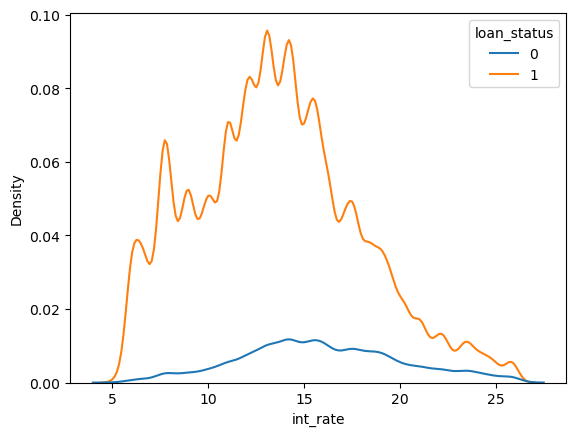

In [204]:
sns.kdeplot(bi['int_rate'], hue=bi['loan_status'])

In [17]:
bi['int_rate'].describe()

count    466256.000000
mean         13.829513
std           4.357561
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [98]:
bi['int_rate_fc'] = pd.cut(bi['int_rate'], 10)
bi['int_rate_fc'].value_counts()

(11.612, 13.676]    94532
(13.676, 15.74]     87614
(15.74, 17.804]     60358
(9.548, 11.612]     58816
(7.484, 9.548]      56398
(17.804, 19.868]    38003
(5.399, 7.484]      27564
(19.868, 21.932]    19782
(21.932, 23.996]    14343
(23.996, 26.06]      8846
Name: int_rate_fc, dtype: int64

In [70]:
bi['int_rate_fc'] = np.where((bi['int_rate']>5.399)&(bi['int_rate']<=7.484),'5.3-7.4',
                    np.where((bi['int_rate']>7.484)&(bi['int_rate']<=9.548),'7.4-9.5',
                    np.where((bi['int_rate']>9.548)&(bi['int_rate']<=11.612),'9.5-11.61',
                    np.where((bi['int_rate']>11.612)&(bi['int_rate']<=13.676),'11.6-13.6',
                    np.where((bi['int_rate']>13.676)&(bi['int_rate']<=15.740),'13.6-15.7',
                    np.where((bi['int_rate']>15.740)&(bi['int_rate']<=17.804),'15.7-17.8',
                    np.where((bi['int_rate']>17.804)&(bi['int_rate']<=19.868),'17.8-19.8',
                    np.where((bi['int_rate']>19.868)&(bi['int_rate']<=21.932),'19.8-21.9',
                    np.where((bi['int_rate']>21.932)&(bi['int_rate']<=23.996),'21.9-23.9','>23.9')))))))))

bi['int_rate_fc'].value_counts()

11.6-13.6    94532
13.6-15.7    87614
15.7-17.8    60358
9.5-11.61    58816
7.4-9.5      56398
17.8-19.8    38003
5.3-7.4      27564
19.8-21.9    19782
21.9-23.9    14343
>23.9         8846
Name: int_rate_fc, dtype: int64

In [ ]:
 4361ee  f20089

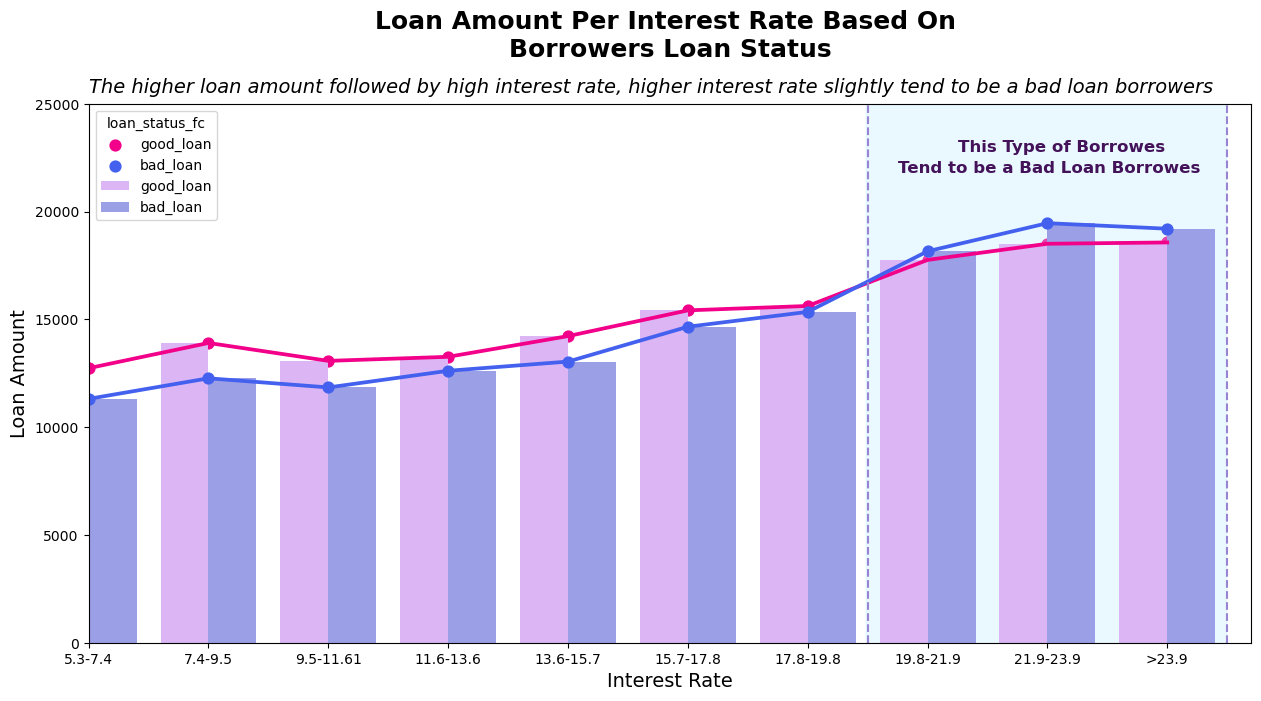

In [75]:
pal = ['#deaaff', '#8e94f2']
pal2 = ['#f20089', '#4361ee']

order_list = ['5.3-7.4', '7.4-9.5','9.5-11.61','11.6-13.6','13.6-15.7','15.7-17.8','17.8-19.8',
             '19.8-21.9','21.9-23.9','>23.9']

plt.figure(figsize=(15,7))
sns.pointplot(x='int_rate_fc',y='loan_amnt',data=bi,palette=pal2, 
              hue='loan_status_fc',ci=None, order=order_list)

sns.barplot(x='int_rate_fc',y='loan_amnt',data=bi,palette=pal, 
              hue='loan_status_fc',ci=None, order=order_list)

plt.axvline(6.5, ls='--', color='#9984d4')
plt.axvline(9.5, ls='--', color='#9984d4')
plt.stackplot(np.arange(6.49,9.51), [[25000]], color='#baebff', alpha=0.3)
plt.text(x=7.25, y=23000, s='This Type of Borrowes', fontsize=12, 
         color='#431259', va='center', weight='extra bold')
plt.text(x=6.75, y=22000, s='Tend to be a Bad Loan Borrowes', fontsize=12, 
         color='#431259', va='center', weight='extra bold')

plt.xlim(0,9.7)
plt.ylim(0,25000)

plt.title('Loan Amount Per Interest Rate Based On \nBorrowers Loan Status', 
          fontsize=18, weight='extra bold', pad=34)
plt.text(x=0, y=25500, s='The higher loan amount followed by high interest rate, higher interest rate slightly tend to be a bad loan borrowers',
         fontstyle='italic', fontsize=14)

plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)

#plt.savefig('fig/figure33.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `loan_amnt`

In [206]:
bi['loan_amnt'].describe()

count    466256.000000
mean      14317.925292
std        8286.339281
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [14]:
bi['loan_amnt_fc'] = pd.cut(bi['loan_amnt'], 10)
bi['loan_amnt_fc'].value_counts()

(7400.0, 10850.0]     91605
(3950.0, 7400.0]      75691
(10850.0, 14300.0]    65080
(14300.0, 17750.0]    60751
(17750.0, 21200.0]    58167
(465.5, 3950.0]       27884
(24650.0, 28100.0]    26705
(21200.0, 24650.0]    25467
(31550.0, 35000.0]    21517
(28100.0, 31550.0]    13389
Name: loan_amnt_fc, dtype: int64

In [176]:
bi['loan_amnt_fc'] = np.where((bi['loan_amnt']>=500)&(bi['loan_amnt']<=3950),'500-3950',
                     np.where((bi['loan_amnt']>3950)&(bi['loan_amnt']<=7400),'3950-7400',
                     np.where((bi['loan_amnt']>7400)&(bi['loan_amnt']<=10800),'7400-10800',
                     np.where((bi['loan_amnt']>10800)&(bi['loan_amnt']<=14300),'10800-14300',
                     np.where((bi['loan_amnt']>14300)&(bi['loan_amnt']<=17750),'14300-17750',
                     np.where((bi['loan_amnt']>17750)&(bi['loan_amnt']<=21200),'17750-21200',
                     np.where((bi['loan_amnt']>21200)&(bi['loan_amnt']<=24650),'21200-246500',
                     np.where((bi['loan_amnt']>24650)&(bi['loan_amnt']<=28100),'24650-28100',
                     np.where((bi['loan_amnt']>28100)&(bi['loan_amnt']<=31550),'28100-31550','31550-35000')))))))))

bi['loan_amnt_fc'].value_counts()

7400-10800      91384
3950-7400       75691
10800-14300     65301
14300-17750     60751
17750-21200     58167
500-3950        27884
24650-28100     26705
21200-246500    25467
31550-35000     21517
28100-31550     13389
Name: loan_amnt_fc, dtype: int64

In [177]:
# create new dataset
df_loan = bi.groupby(['loan_amnt_fc', 'total_acc_fc']).agg(num_good_loan=('loan_status','sum'),
                                                           num_cust=('loan_status','count')).reset_index()

df_loan['good_borrower_prop'] = df_loan['num_good_loan']/df_loan['num_cust']
df_loan['bad_borrower_prop'] = (df_loan['num_cust']-df_loan['num_good_loan'])/df_loan['num_cust']
df_loan

loan_amnt_fc total_acc_fc  num_good_loan  num_cust  good_borrower_prop  \
0    10800-14300         1-26          35746     40494            0.882748   
1    10800-14300        26-52          21050     23371            0.900689   
2    10800-14300          >52           1279      1436            0.890669   
3    14300-17750         1-26          30921     35201            0.878413   
4    14300-17750        26-52          21402     24101            0.888013   
5    14300-17750          >52           1301      1449            0.897861   
6    17750-21200         1-26          27216     30940            0.879638   
7    17750-21200        26-52          22721     25549            0.889311   
8    17750-21200          >52           1498      1678            0.892729   
9   21200-246500         1-26          11265     12839            0.877405   
10  21200-246500        26-52          10501     11833            0.887433   
11  21200-246500          >52            716       795            0.900629   
12   24650-28100         1-26          10627     12087            0.879209   
13   24650-28100        26-52          12064     13627            0.885301   
14   24650-28100          >52            869       991            0.876892   
15   28100-31550         1-26           5134      5911            0.868550   
16   28100-31550        26-52           6068      6939            0.874478   
17   28100-31550          >52            461       539            0.855288   
18   31550-35000         1-26           7393      8451            0.874808   
19   31550-35000        26-52          10601     12027            0.881433   
20   31550-35000          >52            916      1039            0.881617   
21     3950-7400         1-26          46964     53318            0.880828   
22     3950-7400        26-52          19052     21147            0.900932   
23     3950-7400          >52           1102      1226            0.898858   
24      500-3950         1-26          17622     20295            0.868293   
25      500-3950        26-52           6497      7183            0.904497   
26      500-3950          >52            358       406            0.881773   
27    7400-10800         1-26          53821     61193            0.879529   
28    7400-10800        26-52          25516     28594            0.892355   
29    7400-10800          >52           1430      1597            0.895429   

    bad_borrower_prop  
0            0.117252  
1            0.099311  
2            0.109331  
3            0.121587  
4            0.111987  
5            0.102139  
6            0.120362  
7            0.110689  
8            0.107271  
9            0.122595  
10           0.112567  
11           0.099371  
12           0.120791  
13           0.114699  
14           0.123108  
15           0.131450  
16           0.125522  
17           0.144712  
18           0.125192  
19           0.118567  
20           0.118383  
21           0.119172  
22           0.099068  
23           0.101142  
24           0.131707  
25           0.095503  
26           0.118227  
27           0.120471  
28           0.107645  
29           0.104571

(0.0, 0.17)

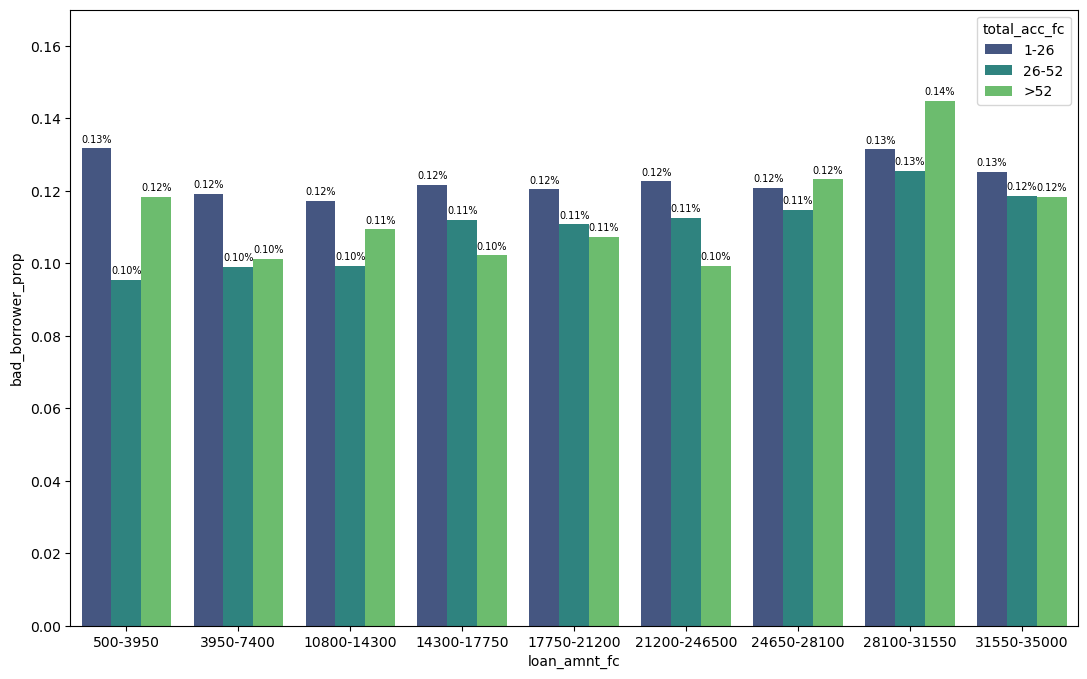

In [184]:
order_list = ['500-3950','3950-7400','10800-14300','14300-17750','17750-21200',
              '21200-246500','24650-28100','28100-31550','31550-35000']

fig, ax = plt.subplots(figsize=(13, 8))

sns.barplot(x='loan_amnt_fc', y='bad_borrower_prop', data=df_loan, 
            hue='total_acc_fc', palette='viridis', order=order_list)

plt.bar_label(ax.containers[0], padding=3, fmt='%.2f%%', fontsize=7)
plt.bar_label(ax.containers[1], padding=3, fmt='%.2f%%', fontsize=7)
plt.bar_label(ax.containers[2], padding=3, fmt='%.2f%%', fontsize=7)

plt.ylim(0,0.17)


In [54]:
# create new dataset
df_loan2 = bi.groupby(['loan_amnt_fc', 'home_ownership_fc']).agg(num_good_loan=('loan_status','sum'),
                                                                 num_cust=('loan_status','count')).reset_index()

df_loan2['good_borrower_prop'] = df_loan2['num_good_loan']/df_loan2['num_cust']
df_loan2['bad_borrower_prop'] = (df_loan2['num_cust']-df_loan2['num_good_loan'])/df_loan2['num_cust']
df_loan2

loan_amnt_fc home_ownership_fc  num_good_loan  num_cust  \
0    10800-14300          MORTGAGE          28810     31934   
1    10800-14300               OWN           5007      5603   
2    10800-14300              RENT          24258     27764   
3    14300-17750          MORTGAGE          29128     32504   
4    14300-17750               OWN           4615      5252   
5    14300-17750              RENT          19881     22995   
6    17750-21200          MORTGAGE          30594     34154   
7    17750-21200               OWN           4184      4723   
8    17750-21200              RENT          16657     19290   
9   21200-246500          MORTGAGE          14245     15933   
10  21200-246500               OWN           1760      1988   
11  21200-246500              RENT           6477      7546   
12   24650-28100          MORTGAGE          15957     17871   
13   24650-28100               OWN           1805      2054   
14   24650-28100              RENT           5798      6780   
15   28100-31550          MORTGAGE           8013      9073   
16   28100-31550               OWN            850       987   
17   28100-31550              RENT           2800      3329   
18   31550-35000          MORTGAGE          13563     15278   
19   31550-35000               OWN           1485      1652   
20   31550-35000              RENT           3862      4587   
21     3950-7400          MORTGAGE          26871     29670   
22     3950-7400               OWN           6722      7599   
23     3950-7400              RENT          33525     38422   
24      500-3950          MORTGAGE           9235     10262   
25      500-3950               OWN           2613      2969   
26      500-3950              RENT          12629     14653   
27    7400-10800          MORTGAGE          35460     39418   
28    7400-10800               OWN           7882      8876   
29    7400-10800              RENT          37425     43090   

    good_borrower_prop  bad_borrower_prop  
0             0.902173           0.097827  
1             0.893628           0.106372  
2             0.873721           0.126279  
3             0.896136           0.103864  
4             0.878713           0.121287  
5             0.864579           0.135421  
6             0.895766           0.104234  
7             0.885878           0.114122  
8             0.863504           0.136496  
9             0.894056           0.105944  
10            0.885312           0.114688  
11            0.858336           0.141664  
12            0.892899           0.107101  
13            0.878773           0.121227  
14            0.855162           0.144838  
15            0.883170           0.116830  
16            0.861196           0.138804  
17            0.841093           0.158907  
18            0.887747           0.112253  
19            0.898910           0.101090  
20            0.841945           0.158055  
21            0.905662           0.094338  
22            0.884590           0.115410  
23            0.872547           0.127453  
24            0.899922           0.100078  
25            0.880094           0.119906  
26            0.861871           0.138129  
27            0.899589           0.100411  
28            0.888013           0.111987  
29            0.868531           0.131469

(0.0, 0.25)

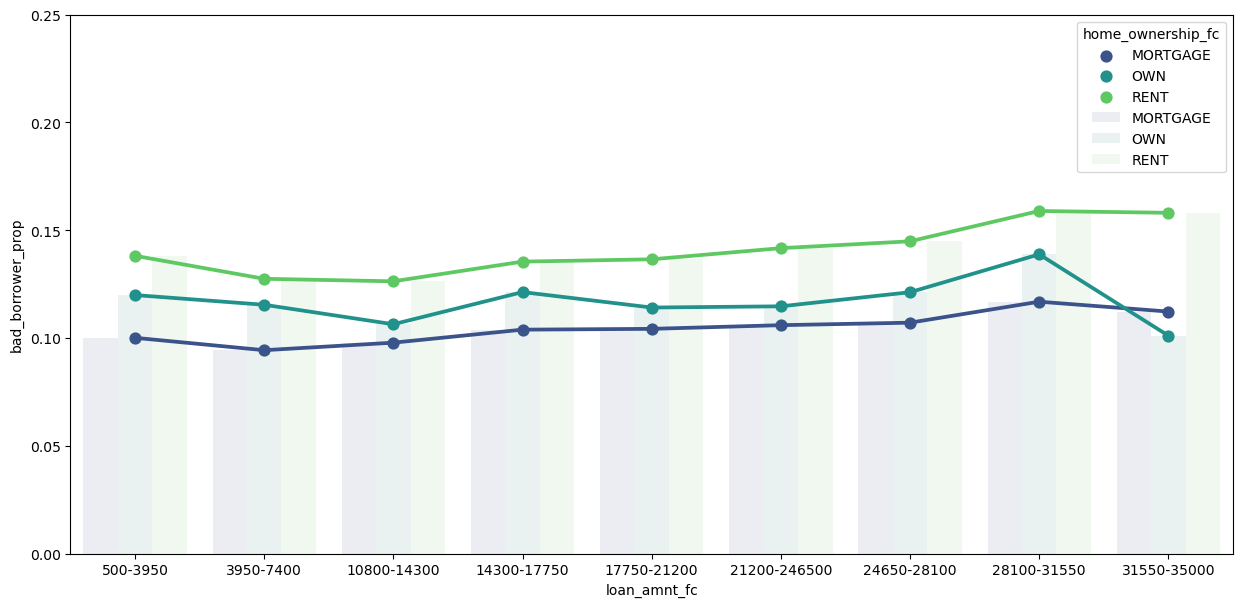

In [64]:
order_list = ['500-3950','3950-7400','10800-14300','14300-17750','17750-21200',
              '21200-246500','24650-28100','28100-31550','31550-35000']

plt.figure(figsize=(15,7))
sns.barplot(x='loan_amnt_fc', y='bad_borrower_prop', data=df_loan2, alpha=0.1,
            hue='home_ownership_fc', palette='viridis', order=order_list)

sns.pointplot(x='loan_amnt_fc', y='bad_borrower_prop', data=df_loan2, 
            hue='home_ownership_fc', palette='viridis', order=order_list)

plt.ylim(0,0.25)

## `Top 5 Feature Importance`

In [185]:
# initialise data of lists.
data_dict = {'Feature':['Last Payment: 5 Month', 'Last Payment: 5-7 Month', 'Total Credit Line: 104-130', 
                        'Interest Rate: 5.3-7.4', 'Interest Rate: 7.4-95'], 
             'Odds Ratio':[1.95, 1.75, 1.64, 1.59, 1.52]}
 
# Create DataFrame
df_important = pd.DataFrame(data_dict)
df_important

Feature  Odds Ratio
0       Last Payment: 5 Month        1.95
1     Last Payment: 5-7 Month        1.75
2  Total Credit Line: 104-130        1.64
3      Interest Rate: 5.3-7.4        1.59
4       Interest Rate: 7.4-95        1.52

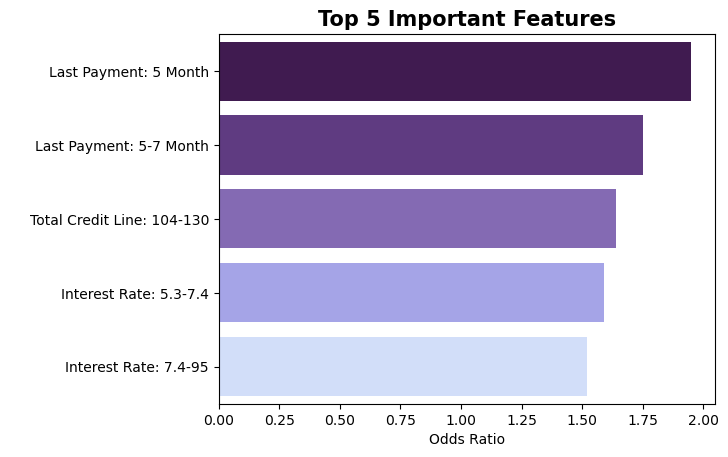

In [207]:
pal = ['#431259', '#60308c', '#805ebf', '#9a99f2', '#ccdcff']
sns.barplot(x='Odds Ratio', y='Feature', data=df_important, palette=pal)
plt.ylabel(' ')
plt.title('Top 5 Important Features', fontsize=15, weight='extra bold')
#plt.savefig('fig/featureimportance2.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=False)

# Creating Score Card

In [18]:
# set new index
df_importance = df_importance.reset_index()

# rename columns
df_importance = df_importance.rename(columns = {'index' : 'feature'})

# creat new columns feature_name (stand for original feature name)
df_importance['feature_name'] = df_importance['feature'].str.split('_').str[:-1]
df_importance['feature_name'] = df_importance['feature_name'].str.join('_')
df_importance.at[0,'feature_name']='intercept'
df_importance.at[80,'feature_name']='term'

df_importance

feature    coef  std err        t  P>|t|  [0.025  \
0                              const -3.0664    0.006 -519.904  0.000  -3.078   
1                           grade_AD  0.2237    0.002  104.517  0.000   0.219   
2                            grade_B  0.2299    0.002   93.854  0.000   0.225   
3                            grade_C  0.2149    0.002   98.086  0.000   0.211   
4                            grade_E  0.2219    0.003   88.061  0.000   0.217   
5                            grade_F  0.1868    0.003   61.147  0.000   0.181   
6            home_ownership_MORTGAGE  0.3057    0.002  165.231  0.000   0.302   
7                 home_ownership_OWN  0.3514    0.002  153.153  0.000   0.347   
8                home_ownership_RENT  0.2816    0.002  152.121  0.000   0.278   
9              initial_list_status_f  0.0377    0.001   44.428  0.000   0.036   
10           loan_amnt_(500, 3950.0]  0.3821    0.002  166.486  0.000   0.378   
11        loan_amnt_(3950.0, 7400.0]  0.3516    0.002  195.851  0.000   0.348   
12       loan_amnt_(7400.0, 10850.0]  0.3379    0.002  195.811  0.000   0.335   
13      loan_amnt_(21200.0, 24650.0]  0.2643    0.007   40.067  0.000   0.251   
14      loan_amnt_(24650.0, 28100.0]  0.2624    0.007   39.856  0.000   0.250   
15      loan_amnt_(28100.0, 31550.0]  0.3705    0.003  121.064  0.000   0.365   
16      loan_amnt_(31550.0, 35000.0]  0.3615    0.003  138.972  0.000   0.356   
17      loan_amnt_(10850.0, 21200.0]  0.3100    0.002  195.107  0.000   0.307   
18      loan_amnt_(21200.0, 28100.0]  0.1068    0.007   16.374  0.000   0.094   
19           int_rate_(5.399, 7.484]  0.4693    0.003  167.814  0.000   0.464   
20           int_rate_(7.484, 9.548]  0.4224    0.002  190.564  0.000   0.418   
21          int_rate_(9.548, 11.612]  0.3657    0.002  151.030  0.000   0.361   
22         int_rate_(11.612, 13.676]  0.3393    0.002  162.697  0.000   0.335   
23          int_rate_(13.676, 15.74]  0.3037    0.002  155.759  0.000   0.300   
24          int_rate_(15.74, 17.804]  0.2841    0.002  149.236  0.000   0.280   
25         int_rate_(17.804, 19.868]  0.2693    0.002  130.036  0.000   0.265   
26         int_rate_(19.868, 21.932]  0.2757    0.003  100.777  0.000   0.270   
27         int_rate_(21.932, 23.996]  0.2851    0.003   97.236  0.000   0.279   
28          int_rate_(23.996, 26.06]  0.3766    0.003  108.448  0.000   0.370   
29                    dti_(0, 3.999]  0.3354    0.003  119.709  0.000   0.330   
30                dti_(3.999, 7.998]  0.3477    0.002  167.994  0.000   0.344   
31              dti_(23.994, 27.993]  0.2905    0.002  153.319  0.000   0.287   
32              dti_(27.993, 31.992]  0.2979    0.002  135.383  0.000   0.294   
33              dti_(31.992, 35.991]  0.3084    0.003  101.971  0.000   0.302   
34               dti_(35.991, 39.99]  0.2802    0.007   42.563  0.000   0.267   
35               dti_(7.998, 23.994]  0.2539    0.001  171.157  0.000   0.251   
36            open_acc_(-0.084, 8.4]  0.2807    0.002  133.454  0.000   0.277   
37              open_acc_(8.4, 16.8]  0.2644    0.002  132.513  0.000   0.260   
38             open_acc_(16.8, 25.2]  0.2870    0.002  124.116  0.000   0.282   
39             open_acc_(25.2, 33.6]  0.2884    0.005   55.379  0.000   0.278   
40             open_acc_(33.6, 42.0]  0.2520    0.012   20.276  0.000   0.228   
41             open_acc_(42.0, 50.4]  0.2678    0.040    6.769  0.000   0.190   
42             open_acc_(50.4, 58.8]  0.3293    0.076    4.313  0.000   0.180   
43             open_acc_(58.8, 67.2]  0.1997    0.295    0.676  0.499  -0.379   
44             open_acc_(67.2, 75.6]  0.2327    0.295    0.788  0.431  -0.346   
45             open_acc_(75.6, 84.0] -0.1742    0.176   -0.991  0.322  -0.519   
46  earliest_cr_line_(54.186, 217.8]  0.2734    0.002  141.359  0.000   0.270   
47   earliest_cr_line_(217.8, 380.6]  0.3014    0.002  152.510  0.000   0.298   
48   earliest_cr_line_(380.6, 543.4]  0.3386    0.003  122.7

## Scoring Each Features

we are using FICO scale to make credit score card. Read more about the scale : [link](https://www.badcredit.org/how-to/credit-score-range/)
* min_score = 300
* max_score = 850

In [19]:
# copy dataset
df_scorecard = df_importance.copy()

# define max and min score
min_score = 300
max_score = 850

In [20]:
# aggregate min and sum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

# aggregate max and sum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

# define credit score
df_scorecard['Score - Calculation'] = df_scorecard['coef'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# adjust intercept values
df_scorecard['Score - Calculation'][0] = ((df_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)

# round credit score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

In [21]:
# check min score, it shoud be = 300
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Preliminary'].min().sum()
# check max score, it should be = 850
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Preliminary'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 300.0
max score 851.0


this error due to round(), we will adjust the values

In [22]:
# check difference
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']

In [23]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][55] = 112 # change value from 113 to 112

# check min score, it shoud be = 300
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Final'].min().sum()
# check max score, it should be = 850
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score - Final'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 300.0
max score 850.0


## Score Card FICO Scale (300-850)

In [24]:
# define data
data_fico = data[x_smote.columns]

# copy
df = data_fico.copy()
df.head()

grade_AD  grade_B  grade_C  grade_E  grade_F  home_ownership_MORTGAGE  \
0         0        1        0        0        0                        0   
1         0        0        1        0        0                        0   
2         0        0        1        0        0                        0   
3         0        0        1        0        0                        0   
4         0        1        0        0        0                        0   

   home_ownership_OWN  home_ownership_RENT  initial_list_status_f  \
0                   0                    1                      1   
1                   0                    1                      1   
2                   0                    1                      1   
3                   0                    1                      1   
4                   0                    1                      1   

   loan_amnt_(500, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                        0                           1   
1                        1                           0   
2                        1                           0   
3                        0                           0   
4                        1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(21200.0, 24650.0]  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   

   loan_amnt_(24650.0, 28100.0]  loan_amnt_(28100.0, 31550.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(31550.0, 35000.0]  loan_amnt_(10850.0, 21200.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(21200.0, 28100.0]  int_rate_(5.399, 7.484]  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   int_rate_(7.484, 9.548]  int_rate_(9.548, 11.612]  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   int_rate_(11.612, 13.676]  int_rate_(13.676, 15.74]  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          1                         0   
4                          1                         0   

   int_rate_(15.74, 17.804]  int_rate_(17.804, 19.868]  \
0                         0                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         0                          0   

   int_rate_(19.868, 21.932]  int_rate_(21.932, 23.996]  \
0                          0                          0   
1                          0                          0   
2                          0              

In [25]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
df.insert(0, 'Intercept', 1)

In [26]:
# define score card
scorecard_scores = df_scorecard['Score - Final']

# reshape
scorecard_scores = scorecard_scores.values.reshape(81, 1)

In [27]:
# multiply the values of each row of the dataframe by the values of each column of the variable using dot
y_scores = df.dot(scorecard_scores)

In [28]:
# concat
score_card_df = pd.concat([df, y_scores], axis=1)

# rename
score_card_df.rename(columns={0:'Credit Score'}, inplace=True)

# show
score_card_df.head(5)

Intercept  grade_AD  grade_B  grade_C  grade_E  grade_F  \
0          1         0        1        0        0        0   
1          1         0        0        1        0        0   
2          1         0        0        1        0        0   
3          1         0        0        1        0        0   
4          1         0        1        0        0        0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   0                    1   
1                        0                   0                    1   
2                        0                   0                    1   
3                        0                   0                    1   
4                        0                   0                    1   

   initial_list_status_f  loan_amnt_(500, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                      1                        0                           1   
1                      1                        1                           0   
2                      1                        1                           0   
3                      1                        0                           0   
4                      1                        1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(21200.0, 24650.0]  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   

   loan_amnt_(24650.0, 28100.0]  loan_amnt_(28100.0, 31550.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(31550.0, 35000.0]  loan_amnt_(10850.0, 21200.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(21200.0, 28100.0]  int_rate_(5.399, 7.484]  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   int_rate_(7.484, 9.548]  int_rate_(9.548, 11.612]  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   int_rate_(11.612, 13.676]  int_rate_(13.676, 15.74]  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          1                         0   
4                          1                         0   

   int_rate_(15.74, 17.804]  int_rate_(17.804, 19.868]  \
0                         0                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         0                          0   

   int_rate_(19.868, 21.932]  int_rate_(21.932, 23.996]  \
0                          0                          0   
1                          0       

In [30]:
# join id based on index
# df = pd.read_csv('loan_data_2007_2014.csv', index_col=0)
df = df[['id','member_id']]

In [35]:
df.shape, score_card_df.shape

((466285, 2), (466256, 82))

In [36]:
credit_score_w_id = pd.merge(df, score_card_df, left_index = True, right_index = True)
credit_score_w_id = credit_score_w_id[['id','member_id','Credit Score']]
credit_score_w_id.head()

id  member_id  Credit Score
0  1077501    1296599         578.0
1  1077430    1314167         583.0
2  1077175    1313524         545.0
3  1076863    1277178         565.0
4  1075358    1311748         693.0

In [37]:
credit_score_w_id.sample(5)

id  member_id  Credit Score
14736     762003     962497         618.0
84762    7342864    9004729         684.0
437156  12385411   14397553         606.0
405236  14469885   16532193         632.0
153196   3927757    5020953         682.0

In [56]:
credit_score_w_id.shape

(466256, 3)

In [65]:
# export to csv
# credit_score_w_id.to_csv('credit_score_w_id.csv')

## Score Card 0-100 Scale

In [62]:
# converting FICO scale to 100% scale
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

credit_score_pctg_scale = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

# concat
score_card_df_pctg = pd.merge(df, credit_score_pctg_scale, left_index = True, right_index = True)

# rename
score_card_df_pctg.rename(columns={0:'Credit Score'}, inplace=True)
score_card_df_pctg.head()

id  member_id  Credit Score
0  1077501    1296599      0.651619
1  1077430    1314167      0.656584
2  1077175    1313524      0.618066
3  1076863    1277178      0.638559
4  1075358    1311748      0.755991

In [63]:
score_card_df_pctg.shape

(466256, 3)

In [66]:
# export to csv
# score_card_df_pctg.to_csv('credit_score_pctg_w_id.csv')

In [67]:
score_card_df_pctg.sample(5)

id  member_id  Credit Score
396128  15510351   17602771      0.704230
28067     544737     702661      0.666410
204401   1457416    1711938      0.648625
100312   6806825    8428911      0.649624
265917  33290364   35933595      0.722178

## Setting Cut-Off

In [130]:
df_proba = pd.concat([score_card_df_pctg, data['loan_status']], axis=1)
df_proba.head()

Intercept  grade_AD  grade_B  grade_C  grade_E  grade_F  \
0          1         0        1        0        0        0   
1          1         0        0        1        0        0   
2          1         0        0        1        0        0   
3          1         0        0        1        0        0   
4          1         0        1        0        0        0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   0                    1   
1                        0                   0                    1   
2                        0                   0                    1   
3                        0                   0                    1   
4                        0                   0                    1   

   initial_list_status_f  loan_amnt_(500, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                      1                        0                           1   
1                      1                        1                           0   
2                      1                        1                           0   
3                      1                        0                           0   
4                      1                        1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(21200.0, 24650.0]  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   

   loan_amnt_(24650.0, 28100.0]  loan_amnt_(28100.0, 31550.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(31550.0, 35000.0]  loan_amnt_(10850.0, 21200.0]  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   loan_amnt_(21200.0, 28100.0]  int_rate_(5.399, 7.484]  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   int_rate_(7.484, 9.548]  int_rate_(9.548, 11.612]  \
0                        0                         1   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   int_rate_(11.612, 13.676]  int_rate_(13.676, 15.74]  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          1                         0   
4                          1                         0   

   int_rate_(15.74, 17.804]  int_rate_(17.804, 19.868]  \
0                         0                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         0                          0   

   int_rate_(19.868, 21.932]  int_rate_(21.932, 23.996]  \
0                          0                          0   
1                          0       

In [131]:
df_proba.shape

(466256, 83)

In [132]:
fpr, tpr, thresholds = roc_curve(df_proba['loan_status'], df_proba['Credit Score'])

In [133]:
# We concatenate 3 dataframes along the columns.
df_cutoff = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

# rename columns 
df_cutoff.columns = ['thresholds', 'fpr', 'tpr']

# Let the first threshold (the value of the thresholds column with index 0)
# be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
df_cutoff['thresholds'][0] = 1 - 1 / np.power(10, 16)

# calculate score, The score corresponsing to each threshold
df_cutoff['Score'] = ((np.log(df_cutoff['thresholds'] / (1 - df_cutoff['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

# show
df_cutoff.sample(10)

thresholds       fpr       tpr  Score
215    0.612874  0.889076  0.975135  540.0
103    0.721297  0.022200  0.339457  652.0
289    0.532524  0.999483  0.999998  465.0
10     0.796313  0.000000  0.000090  746.0
133    0.694078  0.081817  0.586762  622.0
58     0.759215  0.000720  0.028480  697.0
119    0.706965  0.047594  0.497815  636.0
288    0.533616  0.999464  0.999995  466.0
276    0.546696  0.998910  0.999961  478.0
281    0.541253  0.999206  0.999973  473.0

In [136]:
def n_approved(p):
    return np.where(df_proba['Credit Score'] >= p, 1, 0).sum()

In [145]:
# calculate number of approved loan
df_cutoff['N Approved'] = df_cutoff['thresholds'].apply(n_approved)

# calculate number of rejected loan
df_cutoff['N Rejected'] = df_proba['Credit Score'].shape[0] - df_cutoff['N Approved']

# calculate approoval rate
df_cutoff['Approval Rate'] = df_cutoff['N Approved'] / df_proba.shape[0]

# # calculate rejection rate
df_cutoff['Rejection Rate'] = 1 - df_cutoff['Approval Rate']

# set max for first rows
df_cutoff['Score'][0] = max_score

# show
df_cutoff.head(20)

thresholds  fpr       tpr  Score  N Approved  N Rejected  Approval Rate  \
0     1.000000  0.0  0.000000  850.0           0      466256       0.000000   
1     0.809504  0.0  0.000005  765.0           2      466254       0.000004   
2     0.806782  0.0  0.000015  761.0           6      466250       0.000013   
3     0.805410  0.0  0.000022  759.0           9      466247       0.000019   
4     0.803339  0.0  0.000027  756.0          11      466245       0.000024   
5     0.801948  0.0  0.000032  754.0          13      466243       0.000028   
6     0.799849  0.0  0.000041  751.0          17      466239       0.000036   
7     0.799146  0.0  0.000044  750.0          18      466238       0.000039   
8     0.798440  0.0  0.000056  749.0          23      466233       0.000049   
9     0.797024  0.0  0.000085  747.0          35      466221       0.000075   
10    0.796313  0.0  0.000090  746.0          37      466219       0.000079   
11    0.795601  0.0  0.000107  745.0          44      466212       0.000094   
12    0.794886  0.0  0.000119  744.0          49      466207       0.000105   
13    0.794170  0.0  0.000141  743.0          58      466198       0.000124   
14    0.793451  0.0  0.000177  742.0          73      466183       0.000157   
15    0.792731  0.0  0.000206  741.0          85      466171       0.000182   
16    0.792009  0.0  0.000248  740.0         102      466154       0.000219   
17    0.791286  0.0  0.000274  739.0         113      466143       0.000242   
18    0.789832  0.0  0.000396  737.0         163      466093       0.000350   
19    0.789103  0.0  0.000444  736.0         183      466073       0.000392   

    Rejection Rate  
0         1.000000  
1         0.999996  
2         0.999987  
3         0.999981  
4         0.999976  
5         0.999972  
6         0.999964  
7         0.999961  
8         0.999951  
9         0.999925  
10        0.999921  
11        0.999906  
12        0.999895  
13        0.999876  
14        0.999843  
15        0.999818  
16        0.999781  
17        0.999758  
18        0.999650  
19        0.999608

In [147]:
df_cutoff.iloc[150:200,]

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
150    0.678012  0.137243  0.658616  605.0      278854      187402   
151    0.677053  0.141398  0.662630  604.0      280733      185523   
152    0.676093  0.146126  0.666580  603.0      282617      183639   
153    0.675131  0.150540  0.670538  602.0      284487      181769   
154    0.674168  0.154936  0.674813  601.0      286487      179769   
155    0.673203  0.159885  0.678781  600.0      288390      177866   
156    0.672237  0.165759  0.682901  599.0      290406      175850   
157    0.671269  0.171466  0.686805  598.0      292324      173932   
158    0.670300  0.177782  0.690986  597.0      294389      171867   
159    0.669330  0.184412  0.695136  596.0      296458      169798   
160    0.668358  0.190470  0.699234  595.0      298475      167781   
161    0.667384  0.197931  0.703599  594.0      300678      165578   
162    0.666410  0.204931  0.707836  593.0      302803      163453   
163    0.665433  0.212836  0.712119  592.0      304996      161260   
164    0.664456  0.219503  0.716538  591.0      307178      159078   
165    0.663477  0.228091  0.721509  590.0      309692      156564   
166    0.662496  0.235737  0.726069  589.0      311985      154271   
167    0.661514  0.244252  0.730810  588.0      314400      151856   
168    0.660531  0.253301  0.735646  587.0      316883      149373   
169    0.659546  0.263311  0.740614  586.0      319472      146784   
170    0.658560  0.272306  0.745651  585.0      322035      144221   
171    0.657573  0.282371  0.750599  584.0      324619      141637   
172    0.656584  0.293268  0.756156  583.0      327499      138757   
173    0.655594  0.303481  0.761052  582.0      330070      136186   
174    0.654602  0.313842  0.766461  581.0      332860      133396   
175    0.653609  0.324296  0.771739  580.0      335601      130655   
176    0.652615  0.336430  0.777594  579.0      338671      127585   
177    0.651619  0.348823  0.783112  578.0      341616      124640   
178    0.650623  0.362490  0.788802  577.0      344701      121555   
179    0.649624  0.375399  0.794143  576.0      347601      118655   
180    0.648625  0.389011  0.799930  575.0      350723      115533   
181    0.647624  0.401773  0.805790  574.0      353829      112427   
182    0.646622  0.415699  0.811558  573.0      356960      109296   
183    0.645619  0.430086  0.817277  572.0      360096      106160   
184    0.644614  0.444602  0.823111  571.0      363286      102970   
185    0.643608  0.458676  0.828993  570.0      366472       99784   
186    0.642601  0.472897  0.834649  569.0      369573       96683   
187    0.641592  0.488743  0.840710  568.0      372929       93327   
188    0.640582  0.502392  0.846257  567.0      375954       90302   
189    0.639571  0.518072  0.852071  566.0      379199       87057   
190    0.638559  0.533364  0.857992  565.0      382467       83789   
191    0.637546  0.548619  0.863724  564.0      385655       80601   
192    0.636531  0.563967  0.869399  563.0      388825       77431   
193    0.635515  0.580811  0.875429  562.0      392222       74034   
194    0.634498  0.596269  0.881326  561.0      395489       70767   
195    0.633480  0.612319  0.886773  560.0      398603       67653   
196    0.632460  0.628885  0.892391  559.0      401815       64441   
197    0.631440  0.644843  0.898304  558.0      405116       61140   
198    0.630418  0.660375  0.903371  557.0      408045       58211   
199    0.629395  0.676683  0.909381  556.0      411405       54851   

     Approval Rate  Rejection Rate  
150       0.598071        0.401929  
151       0.602101        0.397899  
152       0.606141        0.393859  
153       0.610152        0.389848  
154       0.614441        0.385559  
155       0.618523        0.381477  
156       0.622847        0.377153  
157       0.626960        0.373040  
158       0.631389        0.368611  
159       0.635827        0.364173  
160       0.640153        0

In [148]:
#df_cutoff.to_csv('df_cutoff.csv')